In [1]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

### **Seed Dataset**

In [2]:
# Dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Define column names for the dataset
column_names = ["Area", "Perimeter", "Compactness", "Length of Kernel", "Width of Kernel", "Asymmetry Coefficient", "Length of Kernel Groove", "Class"]

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

df_seed = df.copy()
df_seed.head()

Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Groove  Class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1

### **Breast Cancer Wisconsin (Diagnostic) DataSet**

In [3]:
# URL of the dataset on UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names for the dataset
column_names = [
    "ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
    "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
    "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity",
    "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
    "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
    "Worst Symmetry", "Worst Fractal Dimension"
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# remove the ID feature that is irrelevent
df = df.drop('ID', axis = 1)

# lets convert the class feature into numeric form
df['Diagnosis'] = df['Diagnosis'].map({'B':0, 'M':1})

df_wdbc = df.copy()
df_wdbc.head()

Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Mean Symmetry  Mean Fractal Dimension  SE Radius  SE Texture  SE Perimeter  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   SE Area  SE Smoothness  SE Compactness  SE Concavity  SE Concave Points  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   SE Symmetry  SE Fractal Dimension  Worst Radius  Worst Texture  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   Worst Perimeter  Worst Area  Worst Smoothness  Worst Compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   Worst Concavity  Worst Concave Points  Worst Symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   Worst Fractal Dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [4]:
def check_dataset_shape(df, dataset_name):
  print(f'Total Rows in ({dataset_name}): ', df.shape[0])
  print(f'Total Columns in ({dataset_name}): ', df.shape[1])
  print()

In [5]:
check_dataset_shape(df_seed, "Seeds Dataset")
check_dataset_shape(df_wdbc, "Breast Cancer Wisconsin DataSet")

Total Rows in (Seeds Dataset):  210
Total Columns in (Seeds Dataset):  8

Total Rows in (Breast Cancer Wisconsin DataSet):  569
Total Columns in (Breast Cancer Wisconsin DataSet):  31



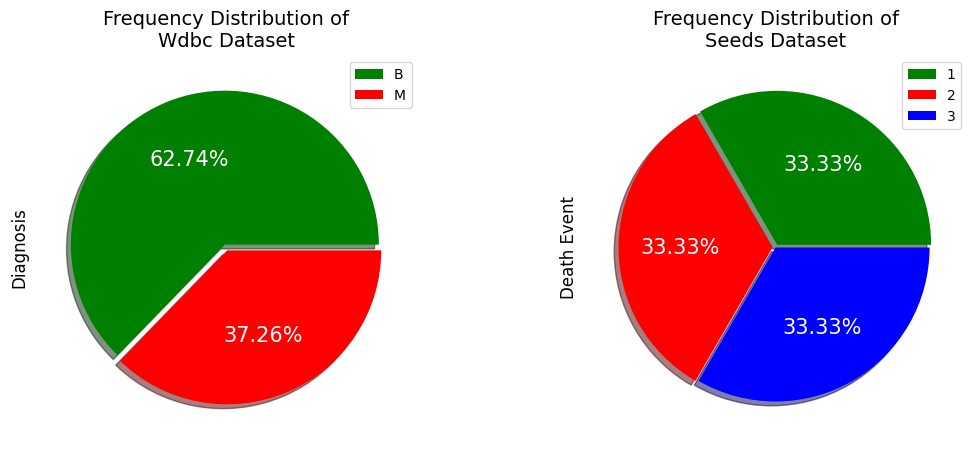

In [6]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)

df_wdbc['Diagnosis'].map({0:'B', 1:'M'}).value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = ['green', 'red'],
                                    textprops={'fontsize':15, 'color':'white'})

plt.ylabel('Diagnosis', fontsize=12)
plt.title(f'Frequency Distribution of\nWdbc Dataset', fontsize=14)
plt.legend()

plt.subplot(1,2,2)
# df_heart['Class'].map({0:'Died', 1:'Alive'}).value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = ['green', 'red'],
#                                     textprops={'fontsize':15, 'color':'white'})
df_seed['Class'].value_counts().plot.pie(explode=[0.02,0.02, 0.0],autopct='%1.2f%%',shadow=True, colors = ['green', 'red', 'blue'],
                                    textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Death Event', fontsize=12)
plt.title('Frequency Distribution of\nSeeds Dataset', fontsize=14)
plt.legend()
plt.show()

# **Clustering**

## **KMeans Clustering**

In [7]:
# !pip install yellowbrick
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

In [8]:
# METABRIC Dataset
X_seed = df_seed.drop('Class', axis = 1)
y_seed = df_seed['Class']

# WDBC Dataset
X_wdbc = df_wdbc.drop('Diagnosis', axis = 1)
y_wdbc = df_wdbc['Diagnosis']

In [9]:
# Normalize the dataset
std = StandardScaler()
X_wdbc_std = std.fit_transform(X_wdbc)
df_wdbc_std = pd.DataFrame(X_wdbc_std, columns=X_wdbc.columns)
df_wdbc_std_org = df_wdbc_std.copy()

std1 = StandardScaler()
X_seed_std = std1.fit_transform(X_seed)
df_seed_std= pd.DataFrame(X_seed_std, columns=X_seed.columns)
df_seed_std_org = df_seed_std.copy()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mutual_info_score, davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, adjusted_mutual_info_score
import time

In [11]:
def runKMeans(data, y, dataset_name):
    dataframe = []
    wcss_list = []  # Initializing the list for the values of WCSS
    SC = []
    DBS = []
    ARS = []
    AMIS = []
    time__ = []
    c = range(2, 10)  # iterate on each cluster

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Two plots in each row

    for i in c:
        start = time.time()
        kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
        kmeans.fit(data)
        end = time.time() - start
        time__.append(end)
        wcss_list.append(kmeans.inertia_)
        sc__ = silhouette_score(data, kmeans.labels_, metric='euclidean')
        SC.append(sc__)
        dbs__ = davies_bouldin_score(data, kmeans.labels_)
        DBS.append(dbs__)
        ars__ = adjusted_rand_score(y, kmeans.labels_)
        amis__ = adjusted_mutual_info_score(y, kmeans.labels_)
        AMIS.append(amis__)
        ARS.append(ars__)
        dataframe.append({
            'Clustering': 'KMeans',
            'Dataset': dataset_name,
            'Clusters': i,
            'Elbow (WSSE)': kmeans.inertia_,
            'Silhouette Coefficient': sc__,
            'Davies-Bouldin Score': dbs__,
            'Adjusted Rand Score': ars__,
            'Adjusted Mutual Info Score': amis__,
            'Time Taken': end
        })

    # Elbow plot
    ax1 = axes[0]
    ax1.plot(c, wcss_list, marker='o')
    ax1.set_title(f'KMeans - Elbow Method ({dataset_name} Dataset)', fontsize=14)
    ax1.set_xlabel('Number of clusters (k)', fontsize=14)
    ax1.set_ylabel('Sum of Squared Error (SSE)', fontsize=14)
    ax1.grid(False)  # Remove grid lines

    # Evaluation metrics bar plot
    ax2 = axes[1]
    metric_scores = [SC, DBS, ARS, AMIS, time__]
    metric_names = ['Silhouette Coefficient', 'Davies-Bouldin Score', 'Adj Rand Score', 'Adj Mutual Info Score',
                    'Time']
    clusters = np.arange(len(c))
    width = 0.15  # Adjust the width between each cluster's bar plot

    for i in range(len(metric_scores)):
        bars = ax2.bar(clusters + i * width, metric_scores[i], width)
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{metric_scores[i][j]:.2f}', ha='center', va='bottom')

    ax2.set_xlabel('Clusters', fontsize=14)
    ax2.set_ylabel('Score', fontsize=14)
    ax2.set_title(f'KMeans - Evaluation Metrics by Cluster\n({dataset_name} Dataset)', fontsize=14)
    ax2.set_xticks(clusters)
    ax2.set_xticklabels(c)
    ax2.legend(metric_names)
    ax2.grid(False)  # Remove grid lines

    plt.tight_layout()
    plt.show()
    return pd.DataFrame(dataframe)

In [12]:
def plot_silhouette(X, dataset_name):
  # Range of cluster numbers to try
  range_clusters = range(2, 6)

  # Create subplots for silhouette plots
  fig, axs = plt.subplots(1, 3, figsize=(16, 5))
  axs = axs.flatten()

  for n_clusters, ax in zip(range_clusters, axs):
      # Create KMeans instance
      clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
      cluster_labels = clusterer.fit_predict(X)
      silhouette_avg__ = silhouette_score(X, cluster_labels)

      # Compute the silhouette score for each sample
      silhouette_avg = silhouette_samples(X, cluster_labels)

      ax.set_xlim([-0.2, 1])
      ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to the cluster
          ith_cluster_silhouette_values = silhouette_avg[cluster_labels == i]
          ith_cluster_silhouette_values.sort()
          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = plt.cm.nipy_spectral(float(i) / n_clusters)
          ax.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers
          ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
          y_lower = y_upper + 10
          # The vertical line for average silhouette score of all the values
          ax.axvline(x=silhouette_avg__, color="red", linestyle="--")

      # ax.set_title("Silhouette plot for {} clusters".format(n_clusters))
      ax.set_title(f'Silhouette Plot (k={n_clusters})\nSilhouette Score: {silhouette_avg__:.2f}\n({dataset_name} Dataset)')
      ax.set_xlabel("Silhouette coefficient values")
      ax.set_ylabel("Cluster label")
      ax.grid(False)  # Remove grid lines

  # Show the plot
  plt.tight_layout()
  plt.show()

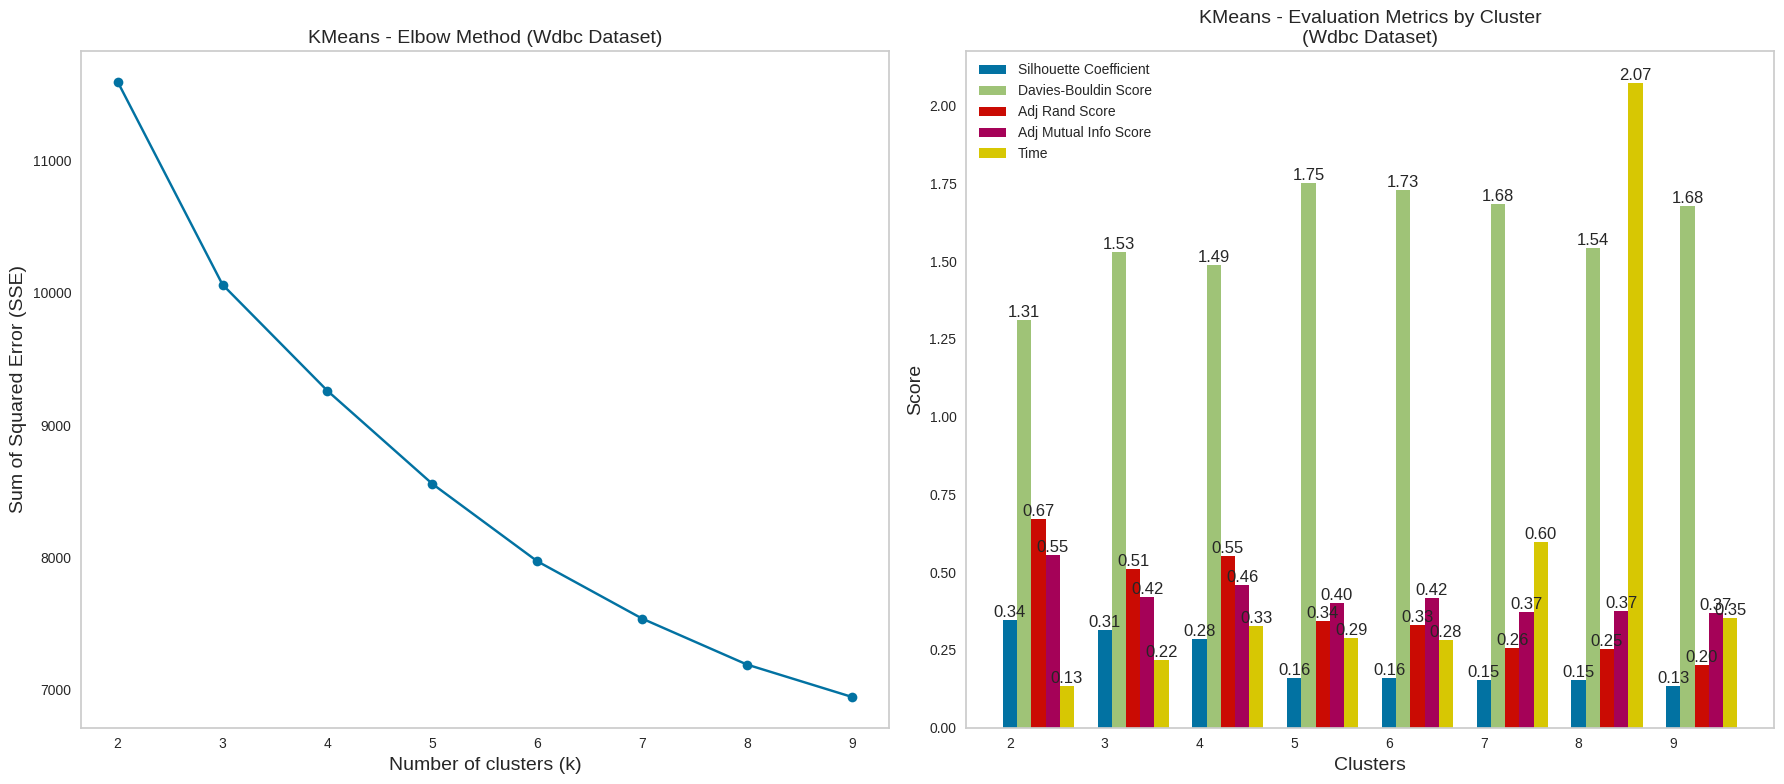

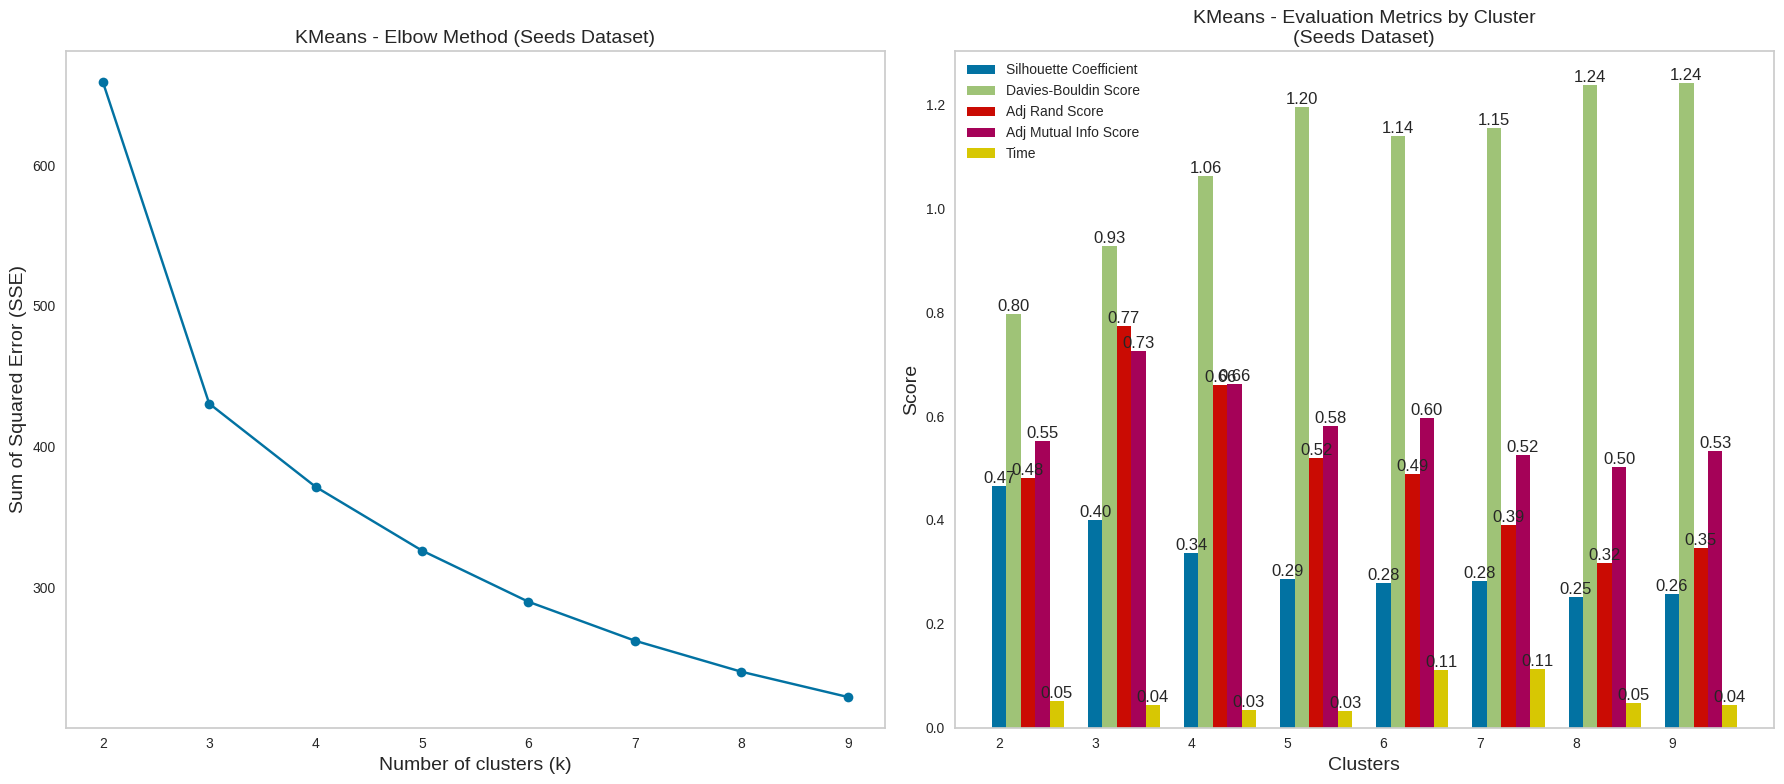

In [13]:
res_wdbc_kmeans_org = runKMeans(df_wdbc_std,y_wdbc, 'Wdbc')
res_wdbc_kmeans_org['Technique'] = 'KMeans'
res_seeds_kmeans_org  = runKMeans(df_seed_std,y_seed, 'Seeds')
res_seeds_kmeans_org['Technique'] = 'KMeans'

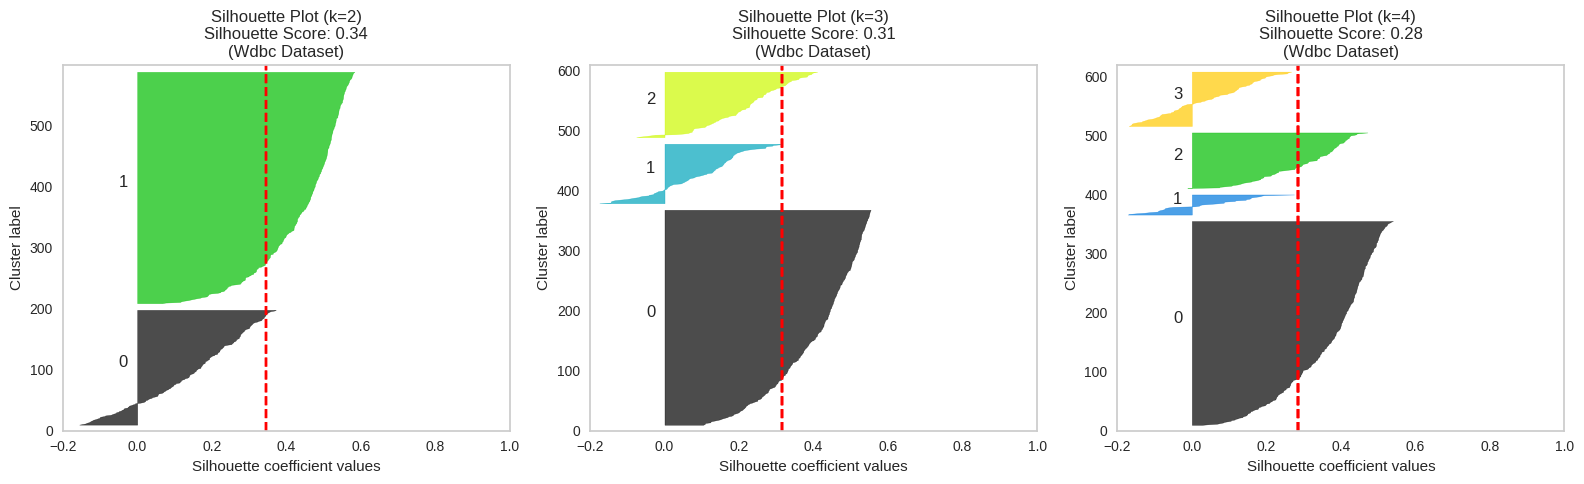

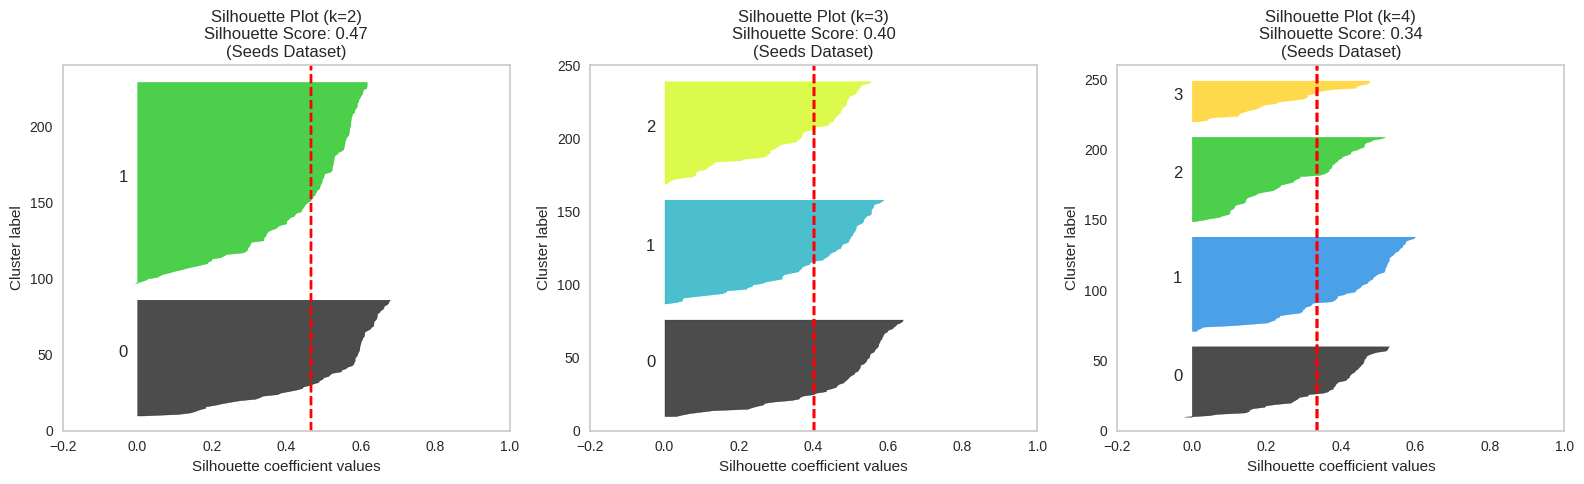

In [14]:
plot_silhouette(df_wdbc_std, 'Wdbc')
plot_silhouette(df_seed_std, 'Seeds')

***The elbow method can be a useful technique for finding the optimal number of clusters, it does have some limitations. For example, in some cases, the plot of WCSS as a function of k may not have a well-defined elbow point, which can make it difficult to determine the optimal number of clusters. Thus we will check other different metrics to find the optimal clusters as well.***


* **Silhouette Coefficient:** Silhouette Coefficient is better when it is closer to 1, indicating that data points are well matched to their own clusters and poorly matched to neighboring clusters.

* **Davies-Bouldin Score:** Davies-Bouldin Score is better when it is lower, signifying a tighter and more well-defined clustering structure with minimal overlap.

* **Adjusted Rand Score:** Adjusted Rand Score is better when it is closer to 1, implying a high agreement between true and predicted clusters while considering chance.

* **Adjusted Mutual Information Score:** Adjusted Mutual Information Score is better when it is closer to 1, indicating a high amount of mutual information shared between true and predicted cluster assignments.

### **Wisconsin Dataset Analysis**
For the Wisconsin Breast Cancer Dataset, it is evident that having 2 clusters is the optimal choice. This conclusion is drawn from the fact that the clustering results exhibit the following characteristics:

* **Adjusted Rand Score:**The Adjusted Rand Score is significantly closer to 1, indicating a high level of agreement between the true data labels and the predicted clusters. This suggests that a 2-cluster solution aligns well with the underlying structure of the data.

* **Silhouette Score:** The Silhouette Score is notably higher, signifying that data points are well-matched to their respective clusters and less matched to neighboring clusters. This indicates that a 2-cluster configuration provides a clear and well-separated clustering structure.

* **Adjusted Mutual Information Score:** The Adjusted Mutual Information Score is substantially closer to 1, implying a substantial amount of mutual information shared between the true class labels and the predicted clusters. This reinforces the effectiveness of a 2-cluster solution.

* **Davies-Bouldin Score:** The Davies-Bouldin Score is notably lower, indicating minimal overlap and tighter clustering. This further supports the choice of 2 clusters as it results in well-separated and distinct clusters.

* The **silhouette sample plot** is a valuable tool for assessing the quality and cohesion of clusters. In this case, it reaffirms the selection of 2 clusters as the optimal choice, as it results in a well-distributed clustering configuration. This not only aligns with the performance metrics discussed earlier but also provides a visual representation of the quality of the clustering solution.

**In summary, the optimal clustering solution for the Wisconsin Breast Cancer Dataset appears to be 2 clusters, as it aligns with the data's inherent structure and exhibits superior performance across multiple evaluation metrics.**

### **Seeds Dataset Analysis**

On the Seeds dataset, which contains three distinct ground truth labels, a KMeans clustering analysis was performed for different cluster configurations (ranging from 2 to 9 clusters). The following observations can be made based on the clustering results and evaluation metrics:

**Elbow (WSSE):**The WSSE (Within-Cluster Sum of Squares Error) was used to assess the variance within the clusters. It typically decreases as the number of clusters increases. In this case, the plot of WSSE shows an "elbow" point at around 3 or 4 clusters. Beyond this point, the reduction in WSSE is less significant. This suggests that 3 or 4 clusters might be a suitable choice, with 3 being the most favored choice as it aligns with the true number of classes.

**Silhouette Coefficient:**The Silhouette Coefficient measures how similar an object is to its cluster compared to other clusters. Higher values indicate better cluster quality. In this analysis, the Silhouette Coefficient is highest when using 2 clusters, indicating well-separated clusters. However, 3 clusters also show a respectable Silhouette score, suggesting reasonable separation.

**Davies-Bouldin Score:**The Davies-Bouldin Score evaluates the average similarity between each cluster with the one that is most similar to it. Lower values indicate better separation between clusters. The Davies-Bouldin Score is lowest for 4 clusters, implying the most distinct clusters. However, 3 clusters also achieve a low score.

**Adjusted Rand Score:**The Adjusted Rand Score assesses the similarity between true labels and cluster assignments. It is close to 1 when the two are in perfect agreement. In this case, the best agreement with the true labels is seen with 3 clusters, as it has the highest Adjusted Rand Score.

**Adjusted Mutual Info Score:**The Adjusted Mutual Info Score is another measure of the agreement between true labels and clustering results. Like the Adjusted Rand Score, the highest score is also observed when using 3 clusters.

**In summary, considering all these metrics and that the true number of classes in the Seeds dataset is 3, the choice of either 3 or 4 clusters seems appropriate. The KMeans analysis with 3 clusters is particularly promising, as it aligns with the true number of classes and achieves high Silhouette, Davies-Bouldin, Adjusted Rand, and Adjusted Mutual Info scores.**

In [15]:
kmeans1 = KMeans(n_clusters=2, random_state=42, init='k-means++')
kmeans1.fit(df_wdbc_std)
df_wdbc['KMeans_Clusters'] = kmeans1.labels_

In [16]:
kmeans2 = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans2.fit(df_seed_std)
df_seed['KMeans_Clusters'] = kmeans2.labels_

In [17]:
def plot_clusters_distribution(df, cols='KMeans_Clusters'):
  fig, axes = plt.subplots(1, 2, figsize=(9, 5))
  df_wdbc, df_seed = df
  # Plot for the WDBC dataset
  sns.countplot(data=df_wdbc, x=cols,  ax=axes[0])
  axes[0].set_title('Cluster Distribution (WDBC)', fontsize=16)
  axes[0].set_xlabel('Cluster', fontsize=16)
  axes[0].set_ylabel('Count', fontsize=16)

  # Plot for the Seeds dataset
  sns.countplot(data=df_seed, x=cols, ax=axes[1])
  axes[1].set_title('Cluster Distribution (Seeds)', fontsize=16)
  axes[1].set_xlabel('Cluster', fontsize=16)
  axes[1].set_ylabel('Count', fontsize=16)
  for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
  axes[0].grid(False)  # Remove grid lines
  axes[1].grid(False)  # Remove grid lines

  plt.tight_layout()
  plt.show()

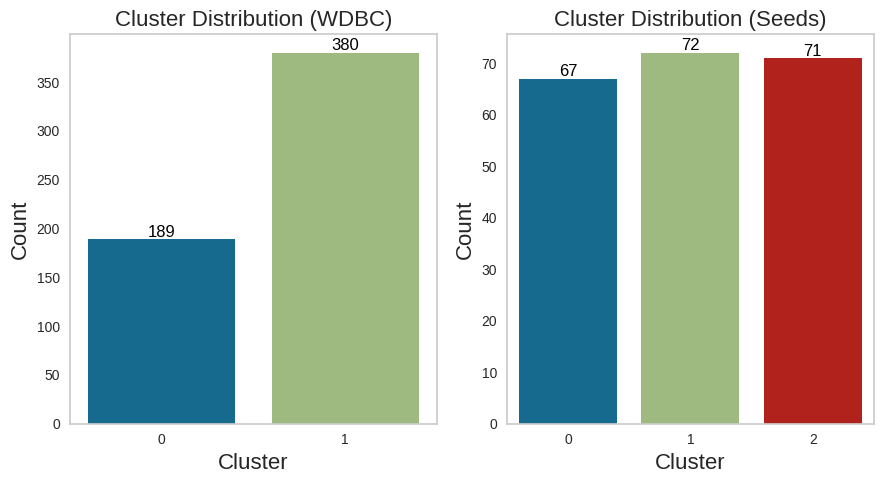

In [18]:
plot_clusters_distribution([df_wdbc, df_seed], 'KMeans_Clusters')

## **Expectation Maximization Clustering**


In [19]:
from sklearn.mixture import GaussianMixture

In [20]:
def runGMM(data, y, dataset_name):
    dataframe = []
    bic = []
    aic = []
    SC = []
    DBS = []
    ARS = []
    AMIS = []
    time__ = []
    c = range(2, 10)  # iterate on each cluster

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Two plots in each row

    for i in c:
        start = time.time()
        gmm = GaussianMixture(n_components=i, random_state=42)
        gmm.fit(data)
        end = time.time() - start

        y_pred = gmm.predict(data)

        time__.append(end)
        bic__ = gmm.bic(data)
        bic.append(bic__)
        aic__ = gmm.aic(data)
        aic.append(aic__)
        sc__ = silhouette_score(data, y_pred, metric='euclidean')
        SC.append(sc__)
        dbs__ = davies_bouldin_score(data, y_pred)
        DBS.append(dbs__)
        ars__ = adjusted_rand_score(y, y_pred)
        amis__ = adjusted_mutual_info_score(y,y_pred)
        AMIS.append(amis__)
        ARS.append(ars__)
        dataframe.append({
            'Clustering': 'EM',
            'Dataset': dataset_name,
            'Clusters': i,
            'BIC': bic__,
            'AIC': aic__,
            'Silhouette Coefficient': sc__,
            'Davies-Bouldin Score': dbs__,
            'Adjusted Rand Score': ars__,
            'Adjusted Mutual Info Score': amis__,
            'Time Taken': end
        })

    # Elbow plot
    ax1 = axes[0]
    ax1.plot(c, bic, marker='o', label='BIC')
    ax1.plot(c, aic, marker='o', label='AIC')
    ax1.set_title(f'EM - BIC and AIC ({dataset_name} Dataset)', fontsize=14)
    ax1.set_xlabel('Number of components', fontsize=14)
    ax1.set_ylabel('Score', fontsize=14)
    ax1.legend()
    ax1.grid(False)  # Remove grid lines

    # Evaluation metrics bar plot
    ax2 = axes[1]
    metric_scores = [SC, DBS, ARS, AMIS, time__]
    metric_names = ['Silhouette Coefficient', 'Davies-Bouldin Score', 'Adj Rand Score', 'Adj Mutual Info Score',
                    'Time']
    clusters = np.arange(len(c))
    width = 0.15  # Adjust the width between each cluster's bar plot

    for i in range(len(metric_scores)):
        bars = ax2.bar(clusters + i * width, metric_scores[i], width)
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{metric_scores[i][j]:.2f}', ha='center', va='bottom')

    ax2.set_xlabel('Clusters', fontsize=14)
    ax2.set_ylabel('Score', fontsize=14)
    ax2.set_title(f'EM - Evaluation Metrics by Cluster\n({dataset_name} Dataset)', fontsize=14)
    ax2.set_xticks(clusters)
    ax2.set_xticklabels(c)
    ax2.legend(metric_names)
    ax2.grid(False)  # Remove grid lines

    plt.tight_layout()
    plt.show()
    return pd.DataFrame(dataframe)

In [21]:
def plot_silhouette_GMM(X, dataset_name):
  # Range of cluster numbers to try
  range_clusters = range(2, 6)

  # Create subplots for silhouette plots
  fig, axs = plt.subplots(1, 3, figsize=(16, 5))
  axs = axs.flatten()

  for n_clusters, ax in zip(range_clusters, axs):
      # Create KMeans instance
      clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
      cluster_labels = clusterer.fit_predict(X)
      silhouette_avg__ = silhouette_score(X, cluster_labels)

      # Compute the silhouette score for each sample
      silhouette_avg = silhouette_samples(X, cluster_labels)

      ax.set_xlim([-0.2, 1])
      ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to the cluster
          ith_cluster_silhouette_values = silhouette_avg[cluster_labels == i]
          ith_cluster_silhouette_values.sort()
          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = plt.cm.nipy_spectral(float(i) / n_clusters)
          ax.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers
          ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
          y_lower = y_upper + 10
          # The vertical line for average silhouette score of all the values
          ax.axvline(x=silhouette_avg__, color="red", linestyle="--")

      # ax.set_title("Silhouette plot for {} clusters".format(n_clusters))
      ax.set_title(f'Silhouette Plot (k={n_clusters})\nSilhouette Score: {silhouette_avg__:.2f}\n({dataset_name} Dataset)')
      ax.set_xlabel("Silhouette coefficient values")
      ax.set_ylabel("Cluster label")
      ax.grid(False)  # Remove grid lines

  # Show the plot
  plt.tight_layout()
  plt.show()

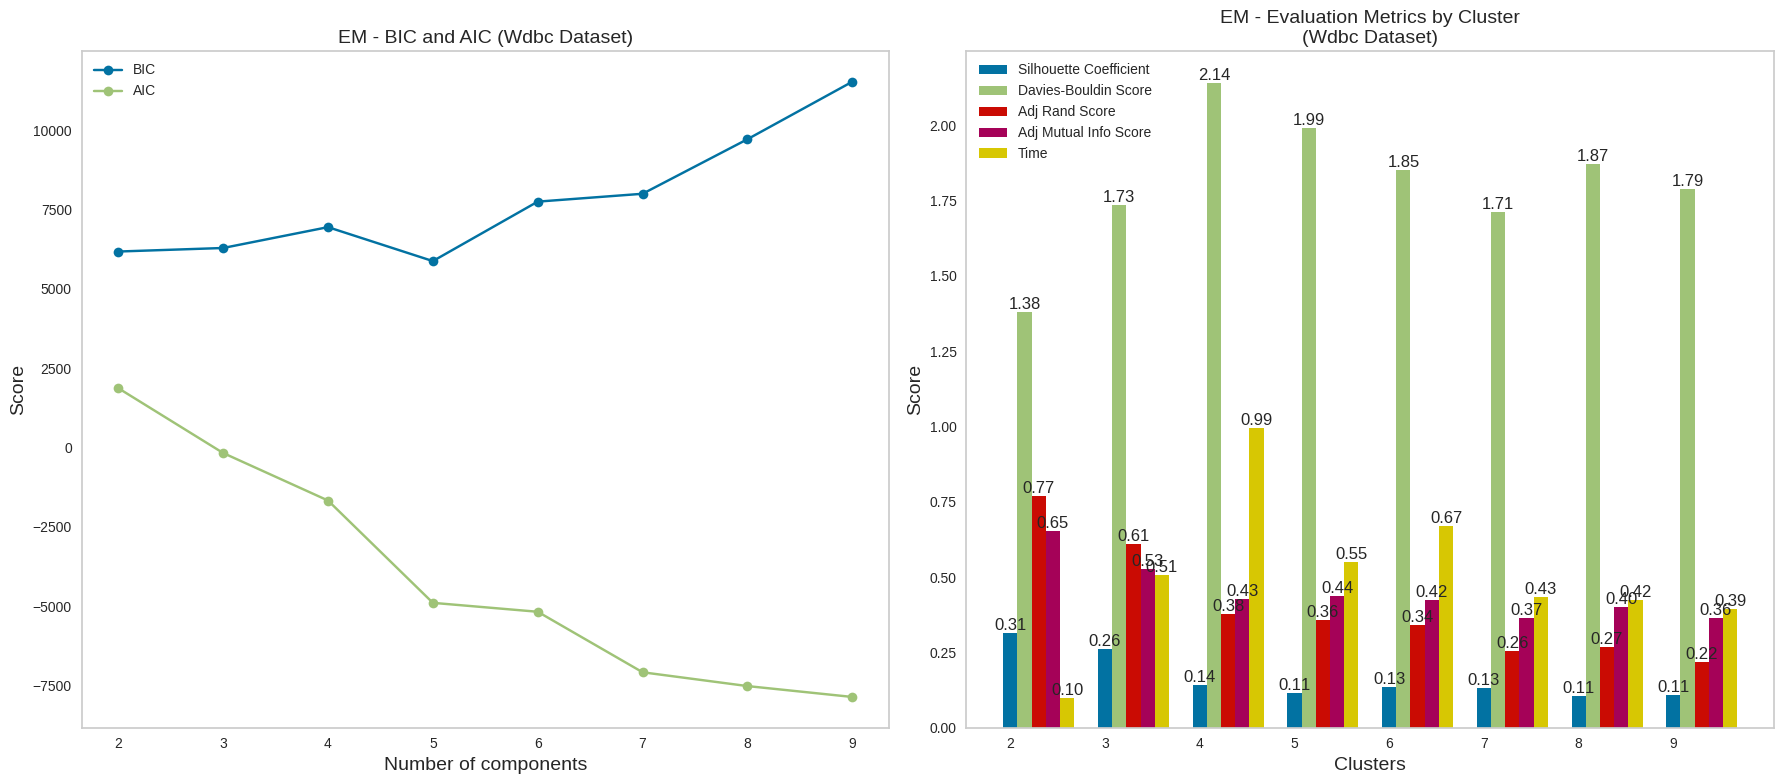

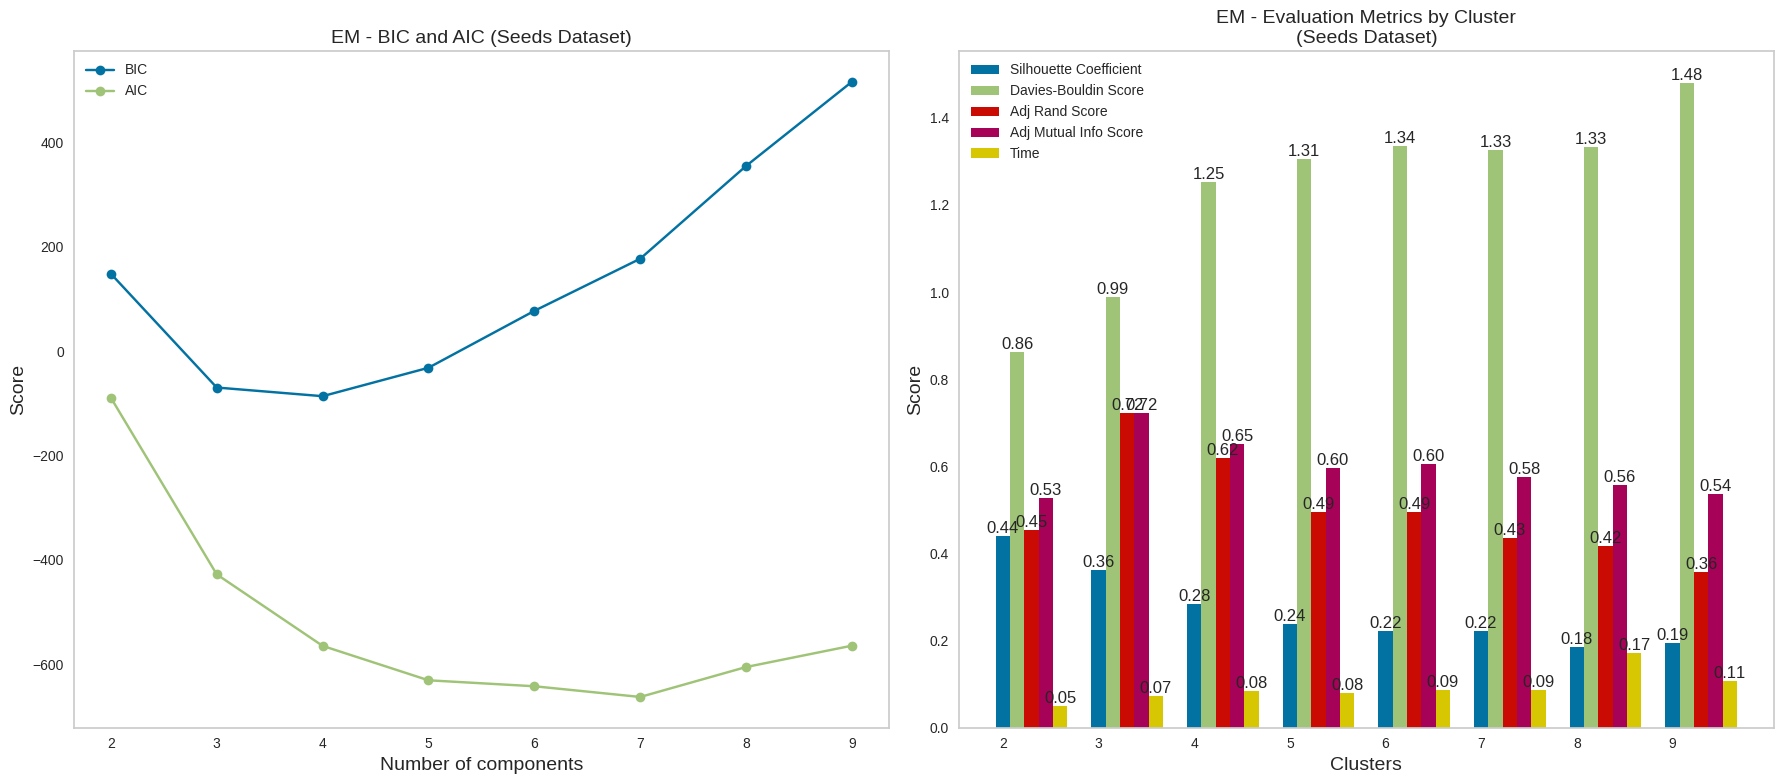

In [22]:
res_wdbc_gmm_org  = runGMM(df_wdbc_std,y_wdbc, 'Wdbc')
res_wdbc_gmm_org['Technique'] = 'EM'
res_seeds_gmm_org  = runGMM(df_seed_std,y_seed, 'Seeds')
res_seeds_gmm_org['Technique'] = 'EM'

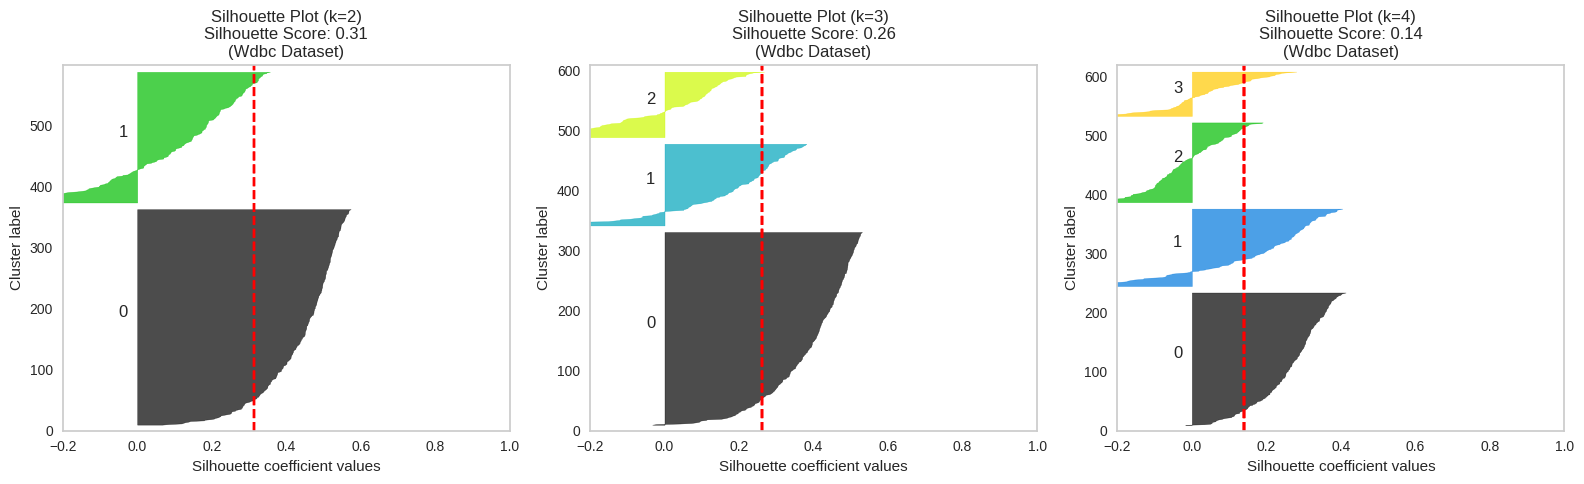

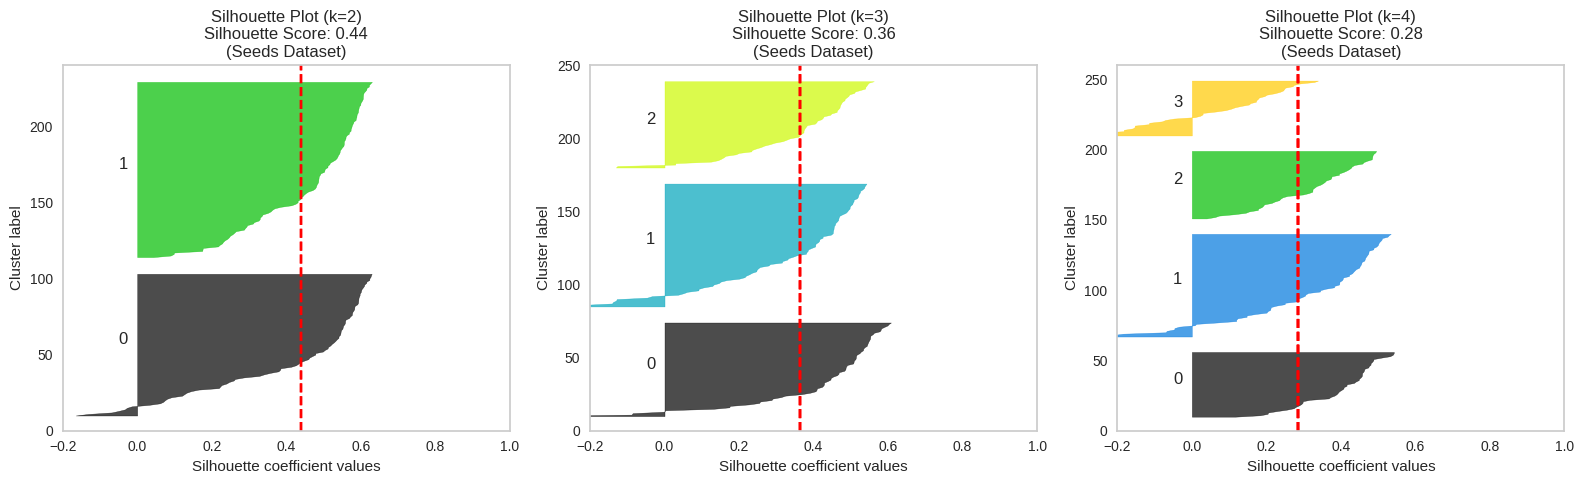

In [23]:
plot_silhouette_GMM(df_wdbc_std, 'Wdbc')
plot_silhouette_GMM(df_seed_std, 'Seeds')

* BIC and AIC are meant to be minimized so pick the low spot in the chart.
* We will pick the number of components with the lowest BIC score.
* I would pick 2 for wisconsin dataset and 3 for seeds dataset as the most appropriate cluster number for the data as the chart really levels off after that also other eveluatin matrics confirmation the 2 optimal clusters for Wisconsin Datset and 3 for Seeds Dataser.
* For the seeds dataset, we can see how the BIC graph is inverted, because we have well defined 3 labels.
* This choice is reinforced by other evaluation metrics, such as the Silhouette Coefficient, Davies-Bouldin Score, Adjusted Rand Score, and Adjusted Mutual Information Score, which also indicate that 2 clusters for the Wisconsin dataset and 3 clusters for the Seeds dataset are optimal. These metrics collectively suggest that these cluster numbers provide the best balance between data clustering and model complexity.

In [24]:
gmm1 = GaussianMixture(n_components=2, random_state=42)
label1 = gmm1.fit_predict(df_wdbc_std)
df_wdbc['GMM_Clusters'] = label1

In [25]:
gmm2 = GaussianMixture(n_components=3, random_state=42)
label2 = gmm2.fit_predict(df_seed_std)
df_seed['GMM_Clusters'] = label2

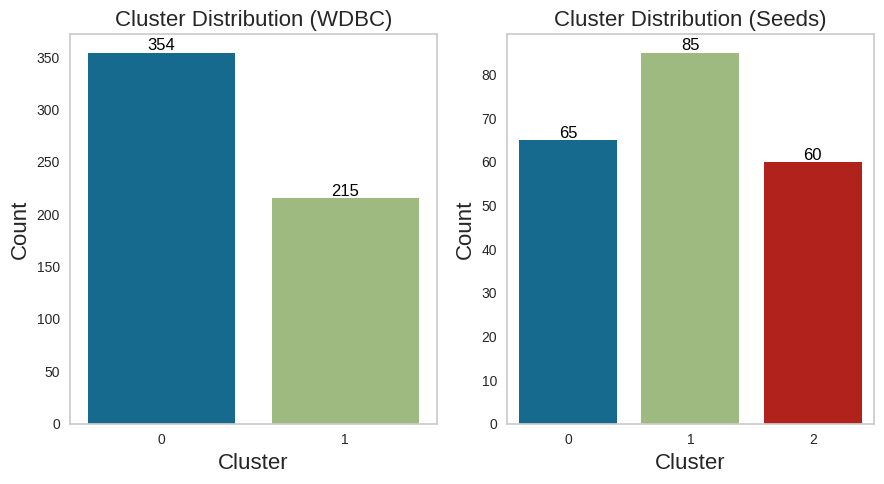

In [26]:
plot_clusters_distribution([df_wdbc, df_seed], 'GMM_Clusters')

# **DIMENSIONALITY REDUCTION**

## **1-Priciple Component Analysis (PCA)**

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Dimensionaly Reduction through PCA Wdbc
pca = PCA()
wdbc_pca_reduced = pca.fit_transform(df_wdbc_std)

# Dimensionaly Reduction through PCA Seed dataset
pca1 = PCA()
seed_pca_reduced = pca1.fit_transform(df_seed_std)

In [29]:
def plot_cumm_var(pca, dataset_name, threshold=None):
    pc_list = ["PC"+str(i) for i in list(range(1, len(pca.explained_variance_ratio_.tolist())+1))]
    pca_variance = np.cumsum(pca.explained_variance_ratio_.tolist())
    pca_df = pd.DataFrame({'pca_feature':pc_list,'cummulative variance':pca_variance})
    pca_df = pca_df[pca_df['cummulative variance']<=threshold]
    pca_df['cummulative variance'] = round(pca_df['cummulative variance']*100,2)
    # print(tabulate(pca_df, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(15,5))
    plt.plot(pc_list,pca_variance,c='red',marker='X', linewidth=2,markersize=9)
    if threshold:
        # Draw line set threshold
        value99 = pca_variance[-1]*threshold
        plt.hlines(y = value99, xmin=0, xmax=len(pca.explained_variance_ratio_.tolist()), color = 'r', linestyles = 'dashed')
    plt.title(f"PCA Variance Graph ({dataset_name} Dataset) - Total Best Feature {len(pca_df)}", fontsize=18)
    plt.xlabel("PCs",fontsize=18)
    plt.ylabel("Cummulative Variance",fontsize=18)
    plt.xticks(rotation=90)
    plt.grid(False)  # Remove grid lines
    plt.show()

    # print("Final Total Feature We will use for PCA is {}".format(len(pca_df)))

In [30]:
def plot_clusters(df, pca, clustering, clustering_name, dataset_name):
  # set image size
  plt.figure(figsize=(8, 5))
  # set a title
  plt.title(f"{clustering_name} Clustering ({dataset_name} Dataset) ", fontdict={"fontsize": 16})
  # set axes names
  plt.xlabel("X0", fontdict={"fontsize": 16})
  plt.ylabel("X1", fontdict={"fontsize": 16})
  # create scatter plot with seaborn, where hue is the class used to group the data
  sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")

  centroids = clustering.cluster_centers_
  centroids = pca.transform(centroids)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200,
                  c='r', label='centroid')

  plt.xlabel("Component 1", fontsize=15)
  plt.ylabel("Component 2",  fontsize=15)
  plt.legend(bbox_to_anchor=(1, 1))
  plt.grid(False)  # Remove grid lines
  plt.show()

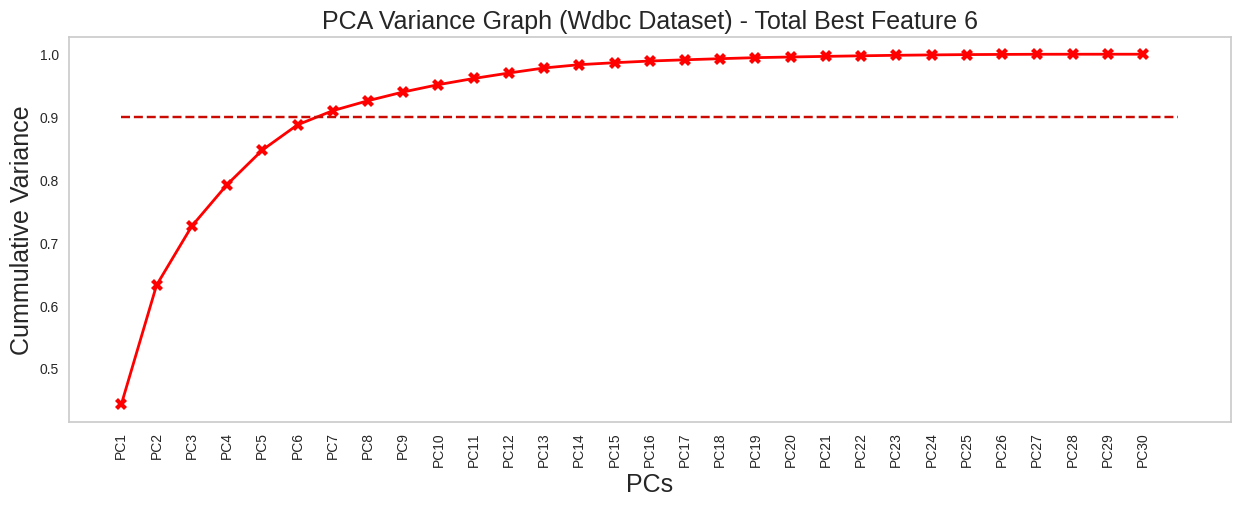

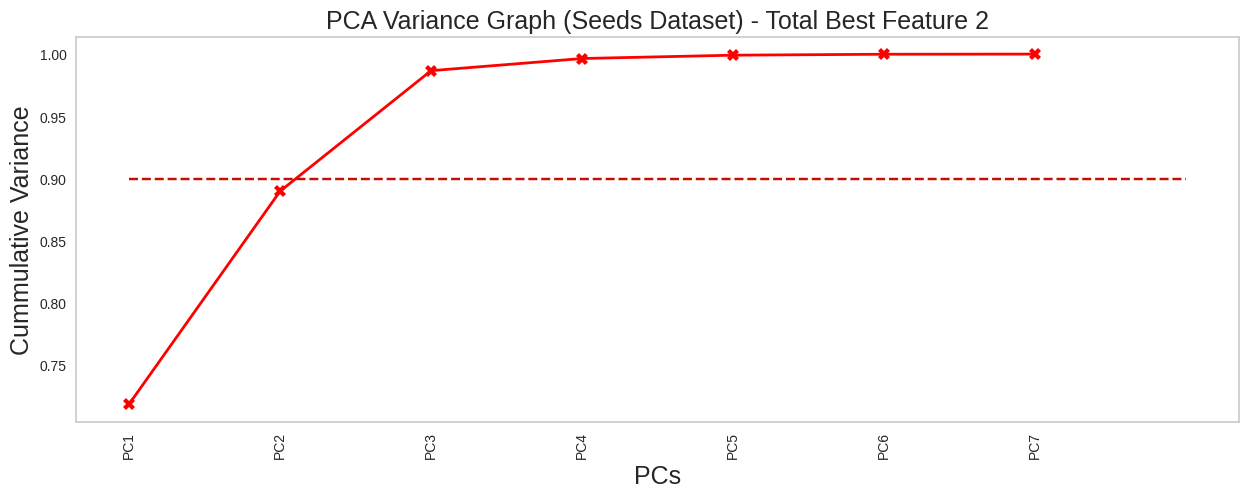

In [31]:
# lets Draw a horizontal line on the above plot to highlight the threshold of 95%.
plot_cumm_var(pca, 'Wdbc', threshold=0.9)
plot_cumm_var(pca1, 'Seeds', threshold=0.9)

**For the Wisconsin Dataset:**In the case of the Wisconsin dataset, it was found that a reduction to just 6 principal components (features) allows us to capture 90% of the variance in the data. This indicates that a substantial dimensionality reduction can be achieved while retaining most of the dataset's information.

**For the Seeds Dataset:**Conversely, when applied to the Seeds dataset, a mere 2 principal components (features) are sufficient to capture 90% of the dataset's variance.

### **PCA With KMeans**

In [32]:
pca = PCA(n_components=6)
# pass our X to the pca and store the reduced vectors into pca_vecs
data_pca = pca.fit_transform(df_wdbc_std)

# save our two dimensions into x0 and x1
x0 = data_pca[:, 0]
x1 = data_pca[:, 1]

# assign clusters and pca vectors to our dataframe
df_wdbc_std['cluster'] = kmeans1.labels_
df_wdbc_std['cluster_gmm'] = label1

# X_std_df['cluster'] = X_std_df['cluster'].map({0:'cluster_0', 1:'cluster_1'})

df_wdbc_std['x0'] = x0
df_wdbc_std['x1'] = x1

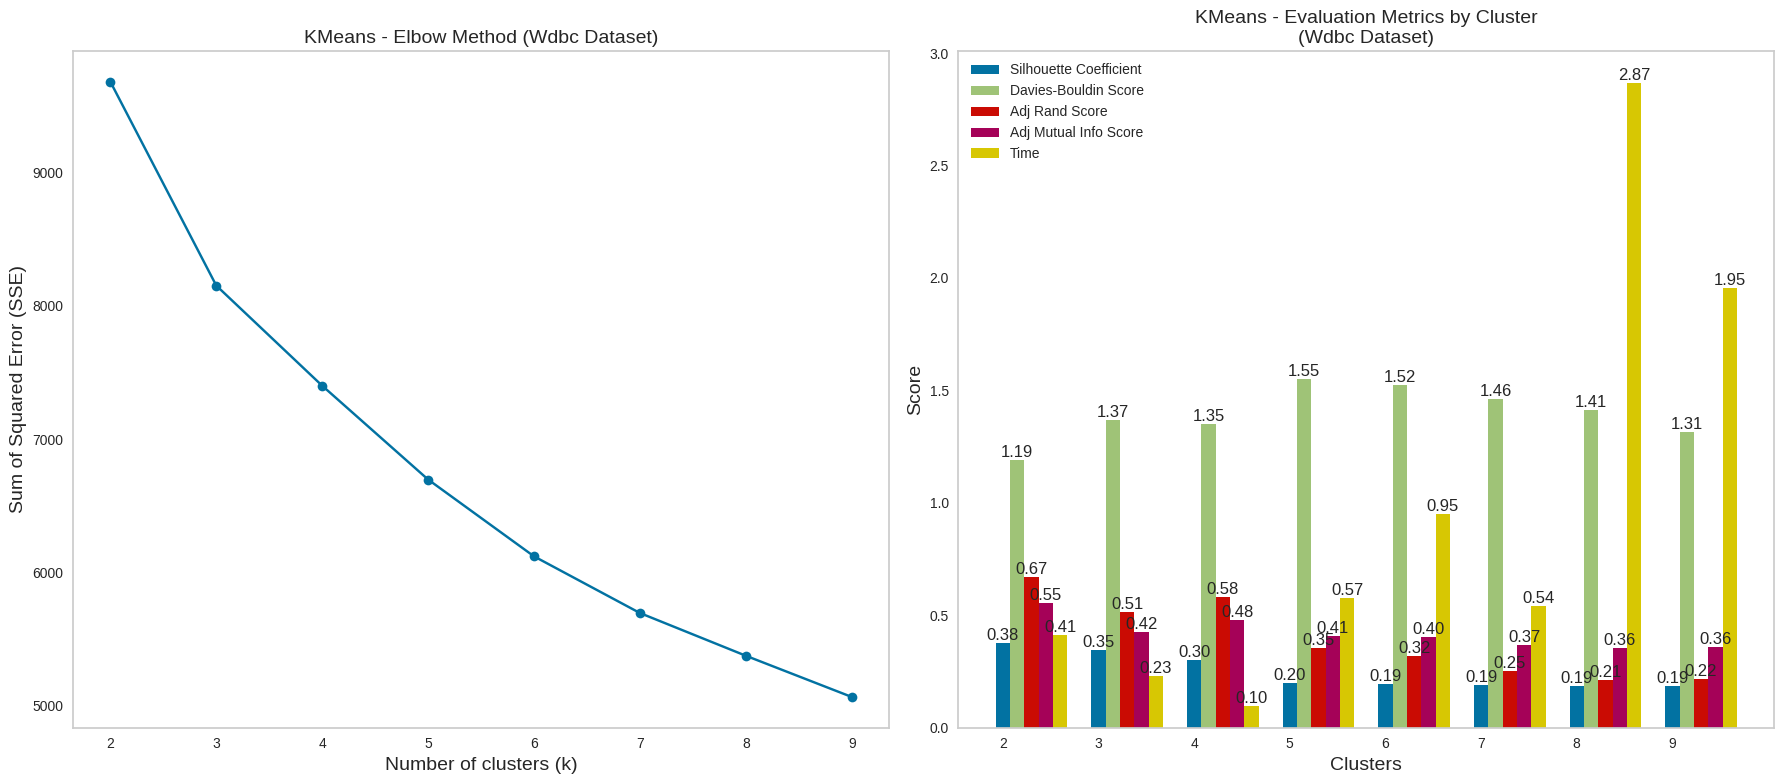

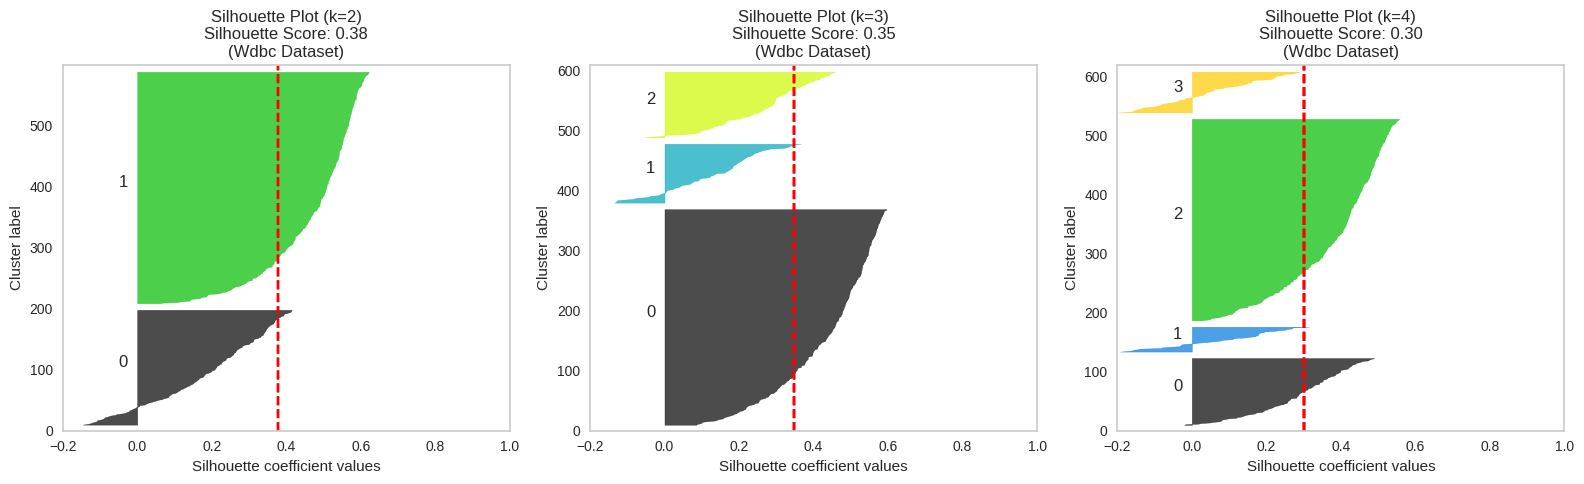

In [33]:
res_wdbc_kmeans_pca = runKMeans(data_pca,y_wdbc, 'Wdbc')
res_wdbc_kmeans_pca['Technique'] = 'PCA'
plot_silhouette(data_pca, 'Wdbc')

In [34]:
# Dimensionaly Reduction through PCA Seed dataset
pca1 = PCA(n_components=2)
data_pca2 = pca1.fit_transform(df_seed_std)

# save our two dimensions into x0 and x1
x0 = data_pca2[:, 0]
x1 = data_pca2[:, 1]

# assign clusters and pca vectors to our dataframe
df_seed_std['cluster'] = kmeans2.labels_
df_seed_std['cluster_gmm'] = label2

df_seed_std['x0'] = x0
df_seed_std['x1'] = x1

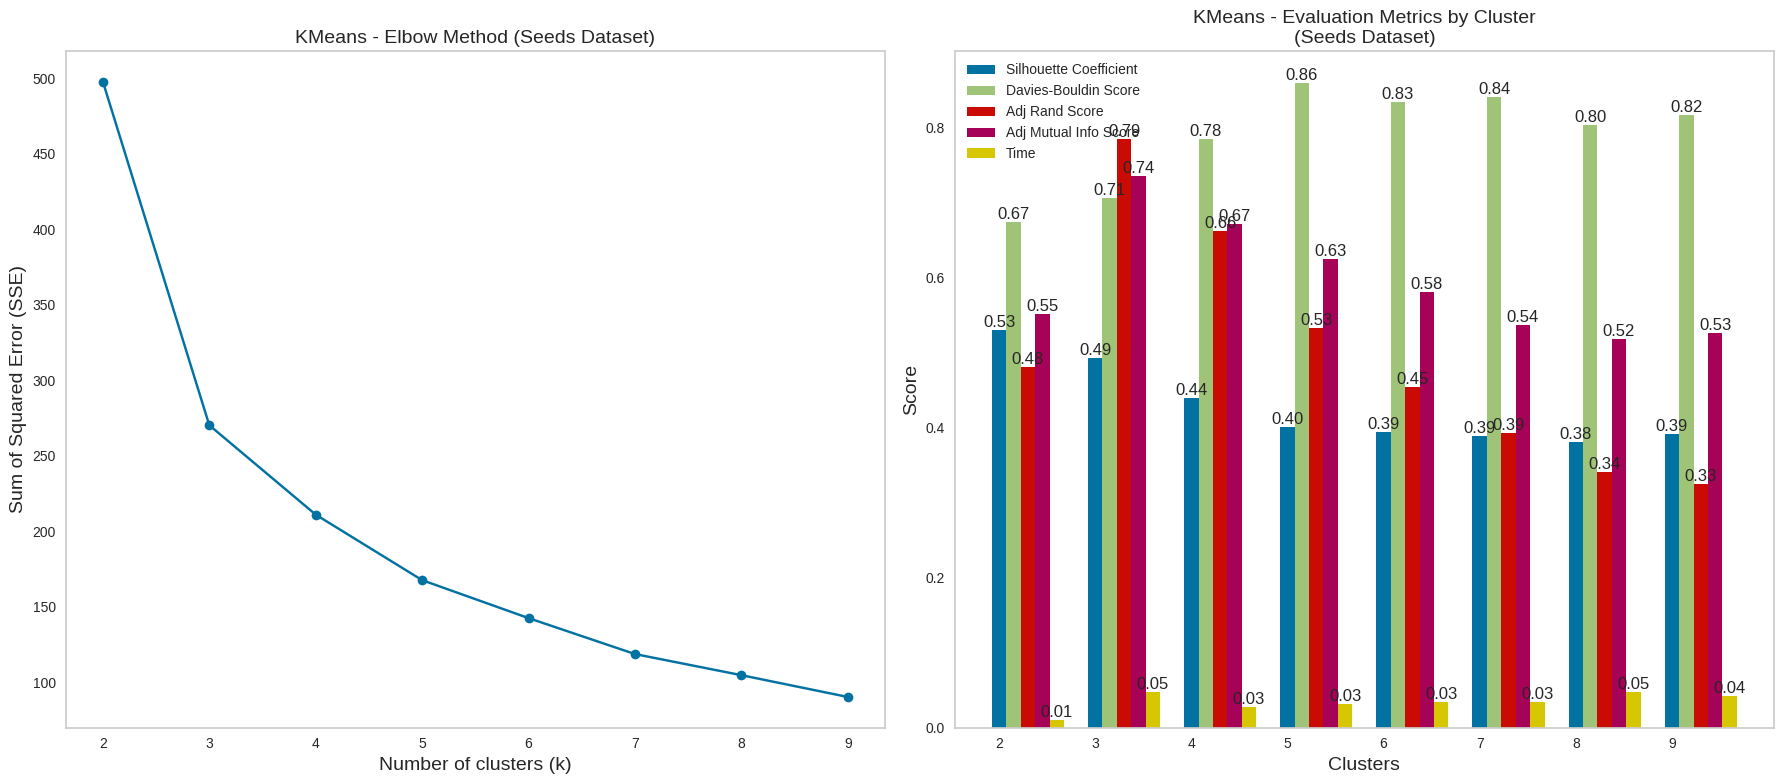

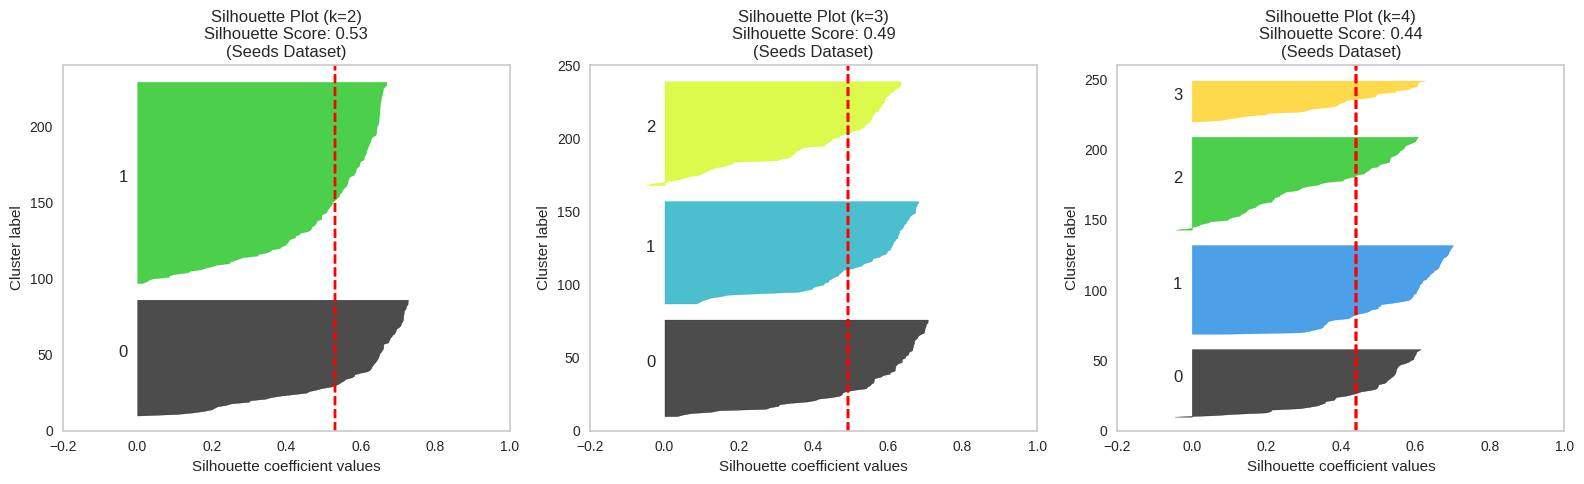

In [35]:
res_seeds_kmeans_pca = runKMeans(data_pca2,y_seed, 'Seeds')
res_seeds_kmeans_pca['Technique'] = 'PCA'
plot_silhouette(data_pca2, 'Seeds')

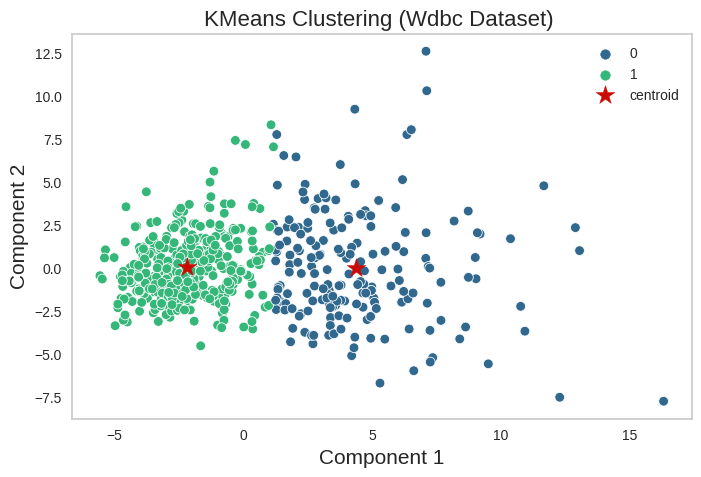

In [36]:
plot_clusters(df_wdbc_std,pca, kmeans1, 'KMeans', 'Wdbc')

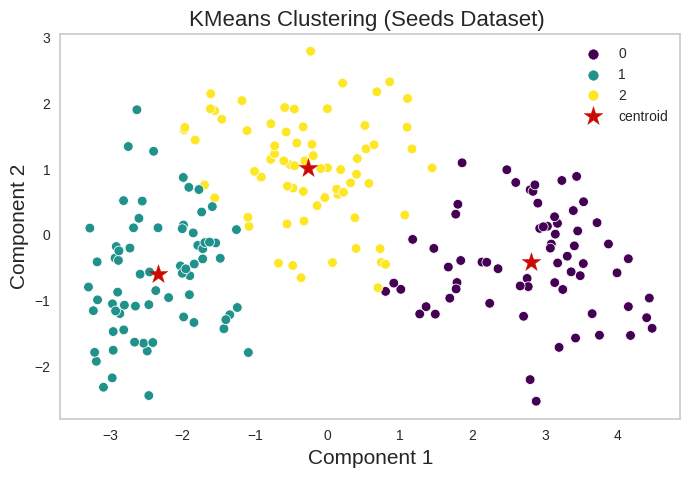

In [37]:
plot_clusters(df_seed_std,pca1, kmeans2, 'KMeans', 'Seeds')

### **PCA With EM**

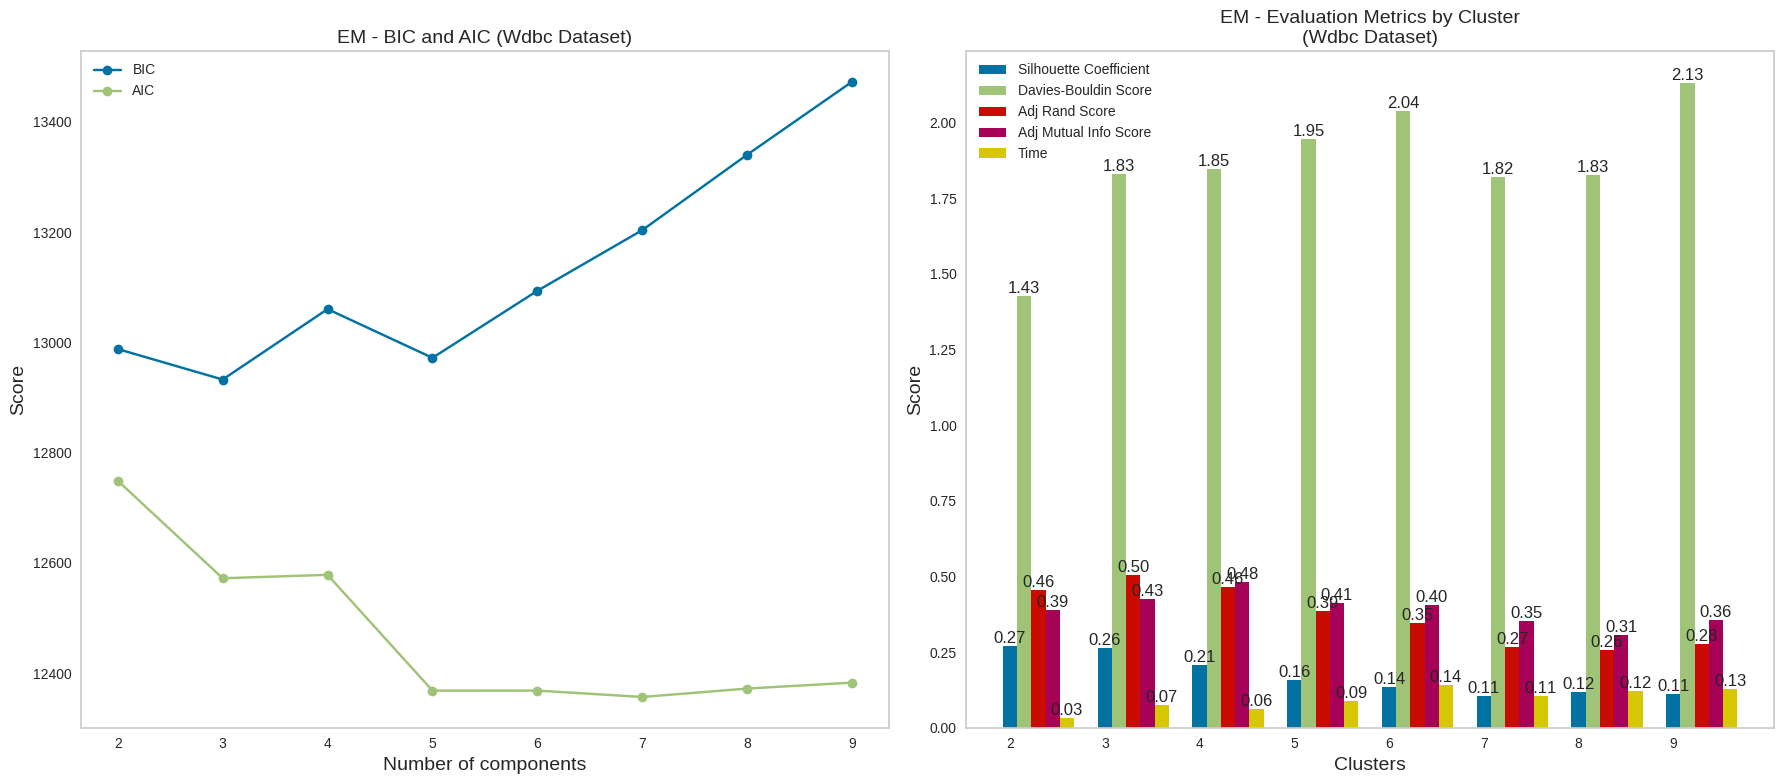

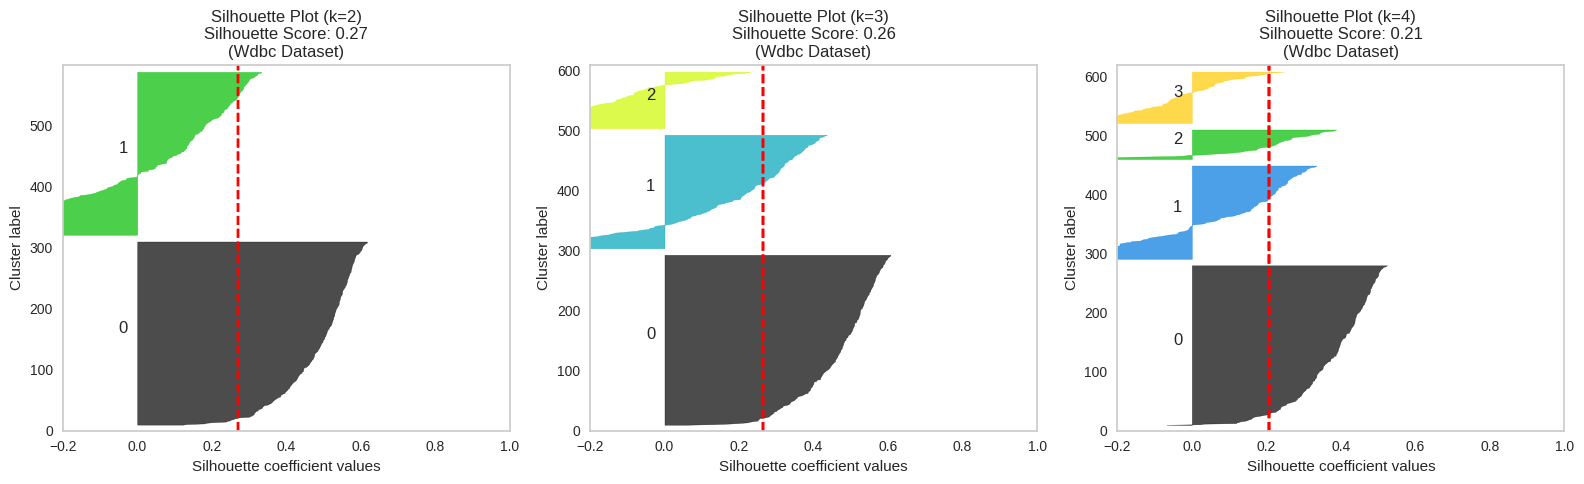

In [38]:
res_wdbc_gmm_pca = runGMM(data_pca,y_wdbc, 'Wdbc')
res_wdbc_gmm_pca['Technique'] = 'PCA'
plot_silhouette_GMM(data_pca, 'Wdbc')

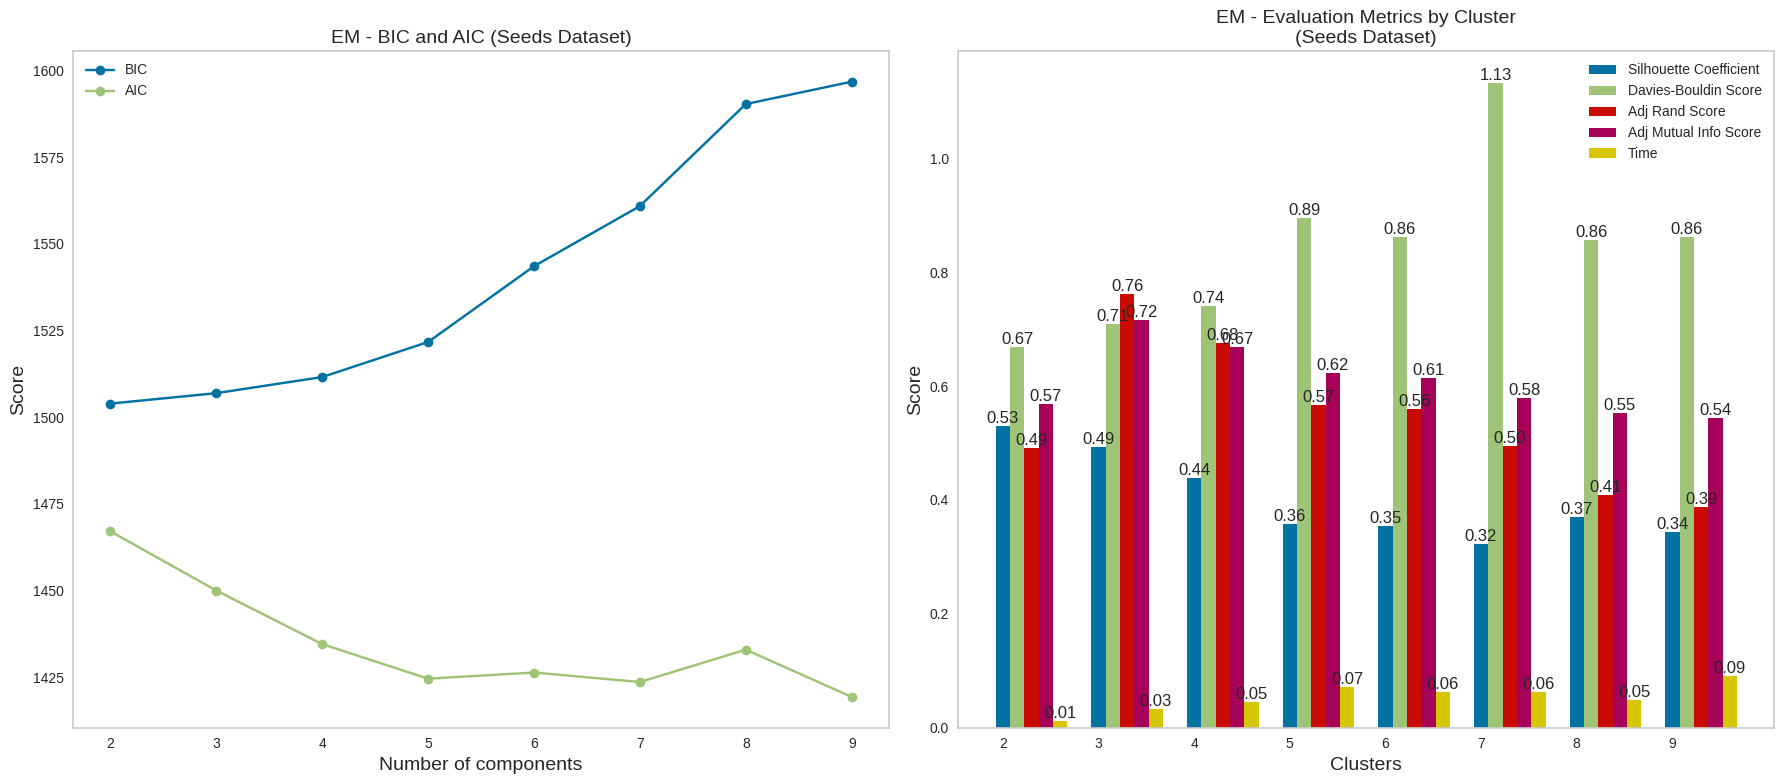

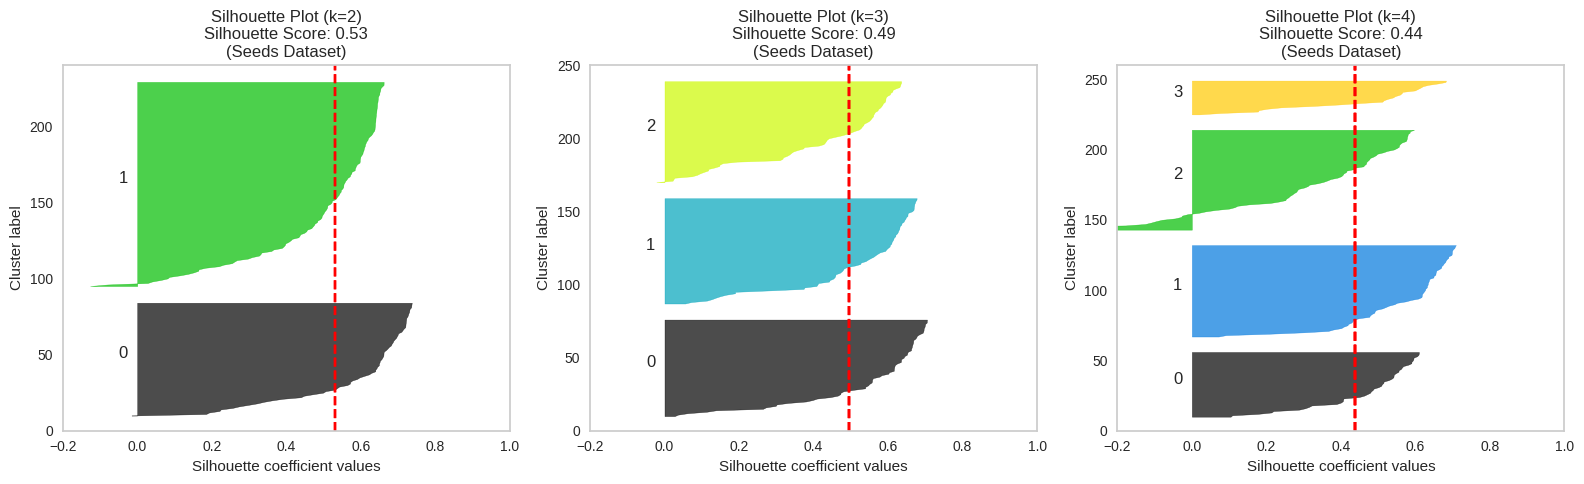

In [39]:
res_seeds_gmm_pca = runGMM(data_pca2,y_seed, 'Seeds')
res_seeds_gmm_pca['Technique'] = 'PCA'
plot_silhouette_GMM(data_pca2, 'Seeds')

In [40]:
def plot_clusters_GMM(df, pca, clustering_name, dataset_name):
  # set image size
  plt.figure(figsize=(8, 5))
  # set a title
  plt.title(f"{clustering_name} Clustering ({dataset_name} Dataset) ", fontdict={"fontsize": 16})
  # set axes names
  plt.xlabel("X0", fontdict={"fontsize": 16})
  plt.ylabel("X1", fontdict={"fontsize": 16})
  sns.scatterplot(data=df, x='x0', y='x1', hue='cluster_gmm', palette="viridis")

  plt.xlabel("Component 1", fontsize=15)
  plt.ylabel("Component 2",  fontsize=15)
  plt.legend(bbox_to_anchor=(1, 1))
  plt.grid(False)  # Remove grid lines
  plt.show()

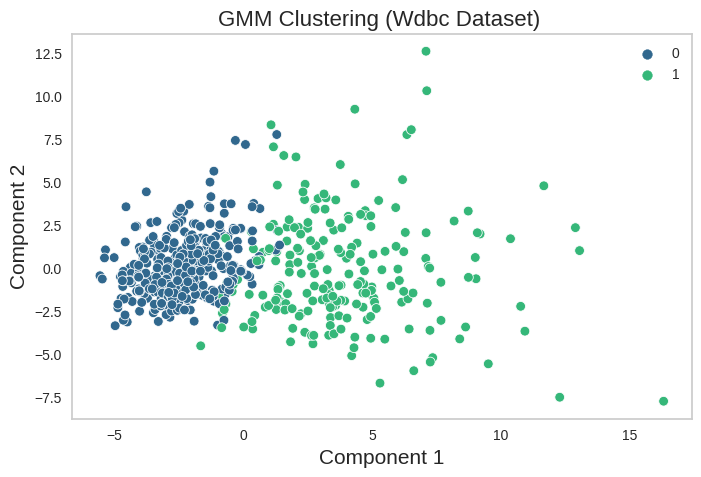

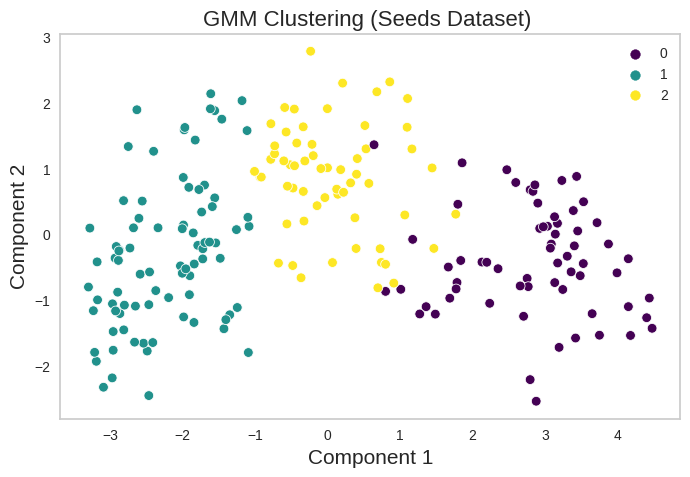

In [41]:
plot_clusters_GMM(df_wdbc_std, pca, 'GMM', 'Wdbc')
plot_clusters_GMM(df_seed_std, pca1, 'GMM', 'Seeds')

**For the Wisconsin Dataset:**

* After applying Principal Component Analysis (PCA) to the Wisconsin dataset and reducing its dimensionality, it was observed that even with a reduced set of 6 principal components, the optimal number of clusters remained at 2. This suggests that PCA successfully captured the essential variation in the data, allowing for effective cluster separation with just 2 clusters, indicating the usefulness of PCA in simplifying the data while preserving its inherent structure.

**For the Seeds Dataset**:

* Similarly, when PCA was employed on the Seeds dataset, it revealed that, with dimensionality reduction to 2 principal components, the optimal number of clusters was found to be 3. This outcome indicates that PCA played a valuable role in simplifying the dataset's features, while retaining the necessary information for effective clustering, thereby suggesting its effectiveness in the context of the Seeds dataset.

**In both cases, the alignment between the number of principal components and the optimal number of clusters suggests that PCA has successfully reduced the data's dimensionality while preserving the underlying structure, facilitating more interpretable and effective clustering results.**







## **2-Independent Component Analysis (ICA)**

In [42]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

ica = FastICA(random_state=42)
S_ = ica.fit_transform(df_wdbc_std)

ica1 = FastICA(random_state=42)
S__ = ica1.fit_transform(df_seed_std)

In [43]:
def plot_ICA_check_Components(df,ica_data, dataset_name):
  # Compute kurtosis for each component
  kurtosis_values = kurtosis(ica_data)
  # Sort the kurtosis values in descending order
  sorted_kurtosis = np.sort(kurtosis_values)[::-1]

  # Calculate the cumulative variance explained by each component
  cumulative_kurtosis = np.cumsum(sorted_kurtosis) / np.sum(sorted_kurtosis)

  # Scree plot
  explained_variance_ratio = np.var(ica_data, axis=0) / np.var(df.values, axis=0)
  cumulative_explained_variance = np.cumsum(explained_variance_ratio)

  # Information criteria (AIC and BIC)
  n_components = np.arange(1, len(kurtosis_values) + 1)
  aic = []
  bic = []
  for n in n_components:
      aic_value = 2 * n - 2 * np.sum(np.log(np.abs(kurtosis_values[:n])))
      bic_value = n * np.log(df.shape[1]) - 2 * np.sum(np.log(np.abs(kurtosis_values[:n])))
      aic.append(aic_value)
      bic.append(bic_value)


  # Plotting
  plt.figure(figsize=(12, 5))

  # Scree plot
  plt.subplot(1, 3, 1)
  plt.plot(n_components, cumulative_explained_variance, marker='o')
  plt.xlabel("Number of Components")
  plt.ylabel("Cumulative Explained Variance")
  plt.title(f"Scree Plot\n{dataset_name} Dataset")
  plt.grid(False)  # Remove grid lines

  # Kurtosis
  plt.subplot(1, 3, 2)
  plt.plot(range(1, len(sorted_kurtosis) + 1), cumulative_kurtosis, marker='o')
  plt.xlabel("Number of Components")
  plt.ylabel("Cumulative Kurtosis")
  plt.title(f"Cumulative Kurtosis\n{dataset_name} Dataset")
  plt.grid(False)  # Remove grid lines

  # AIC and BIC
  plt.subplot(1, 3, 3)
  plt.plot(n_components, aic, marker='o', label='AIC')
  plt.plot(n_components, bic, marker='o', label='BIC')
  plt.xlabel("Number of Components")
  plt.ylabel("Information Criteria Value")
  plt.title(f"Information Criteria (AIC and BIC)\n{dataset_name} Dataset")
  plt.grid(False)  # Remove grid lines
  plt.legend()

  plt.tight_layout()
  plt.show()

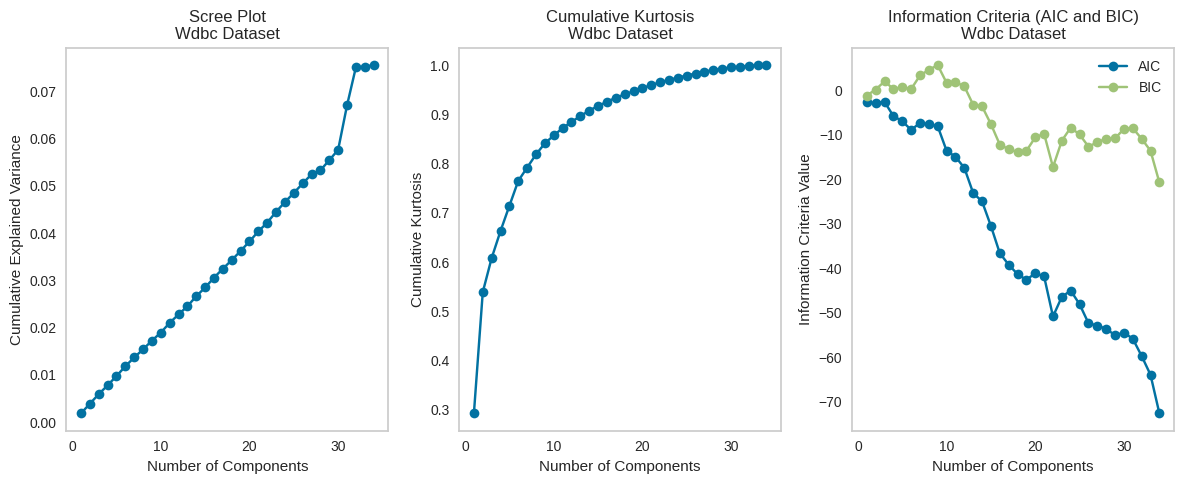

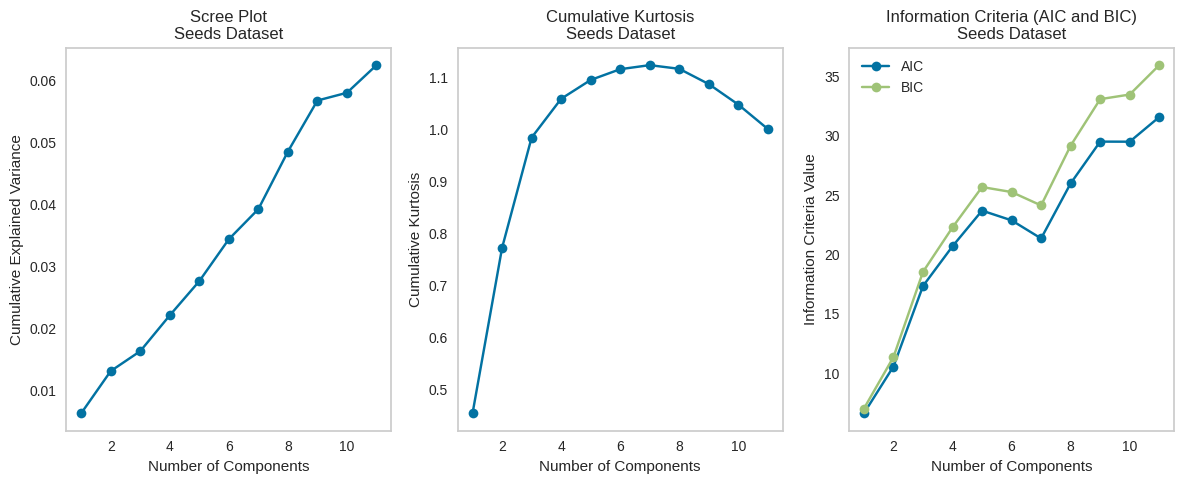

In [44]:
plot_ICA_check_Components(df_wdbc_std, S_, 'Wdbc')
plot_ICA_check_Components(df_seed_std, S__, 'Seeds')

**Based on kurtosis analysis/Scree Plot/BIC:**

* For the **Wisconsin dataset**, it is recommended to choose 10 components using kurtosis analysis. This number appears to capture the most non-Gaussian and independent features in the dataset, making it suitable for dimensionality reduction or further analysis.

* For the **Seeds dataset**, the optimal number of components, as determined by kurtosis analysis, is 4. These 4 components are likely to capture the essential non-Gaussian and independent characteristics of the data, allowing for effective feature reduction or analysis.

In [45]:
ica = FastICA(n_components=10, random_state=42)
W_ = ica.fit_transform(df_wdbc_std)

ica1 = FastICA(n_components=4,random_state=42)
S_ = ica1.fit_transform(df_seed_std)

In [46]:
data_pca.shape

(569, 6)

### **ICA With KMeans**

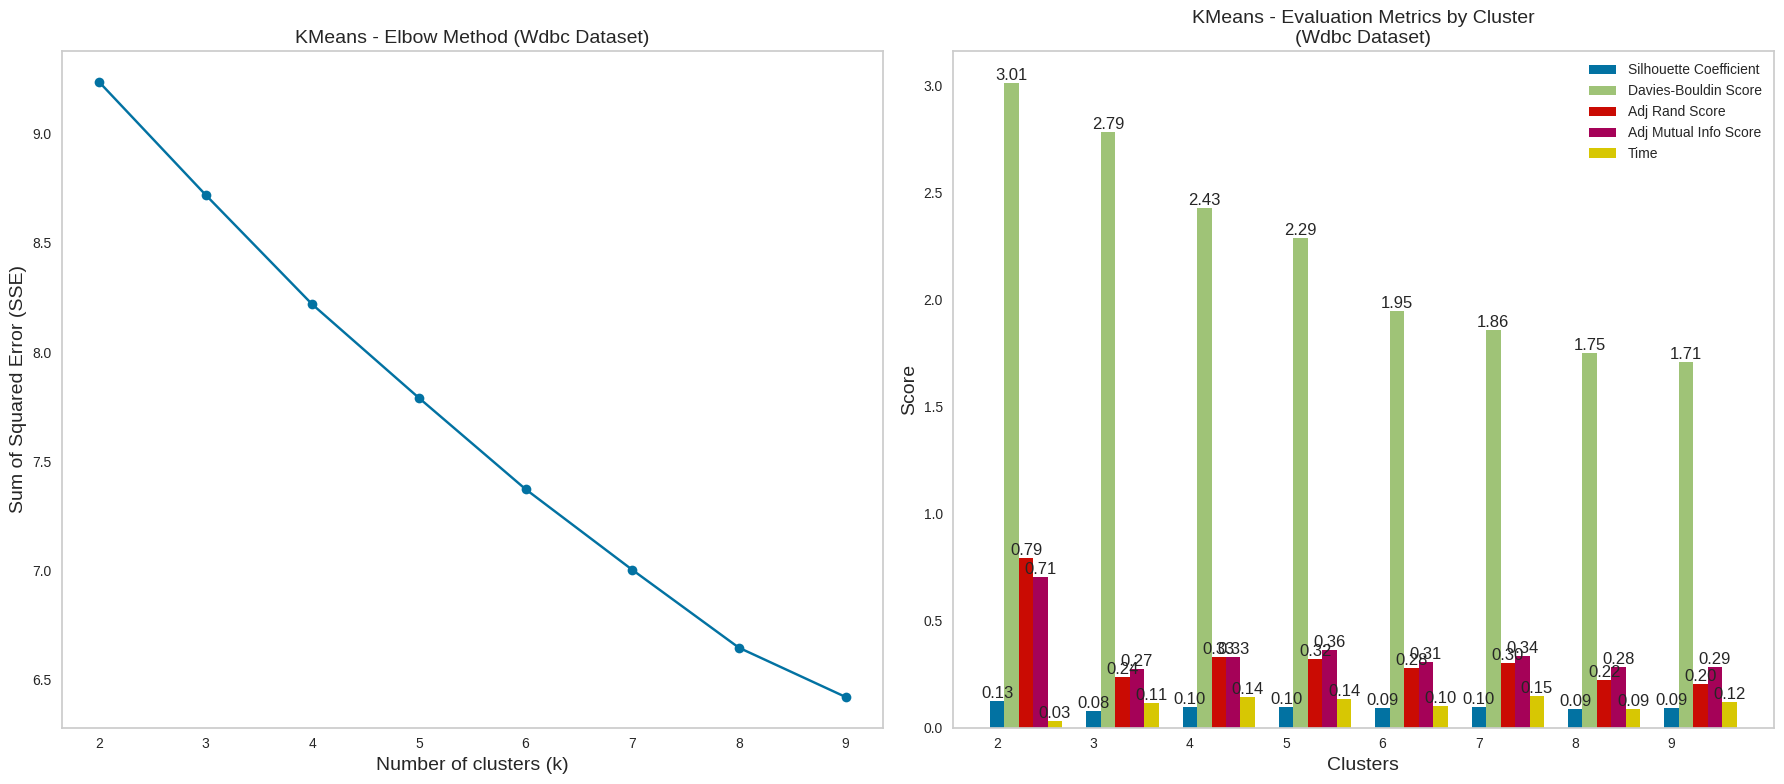

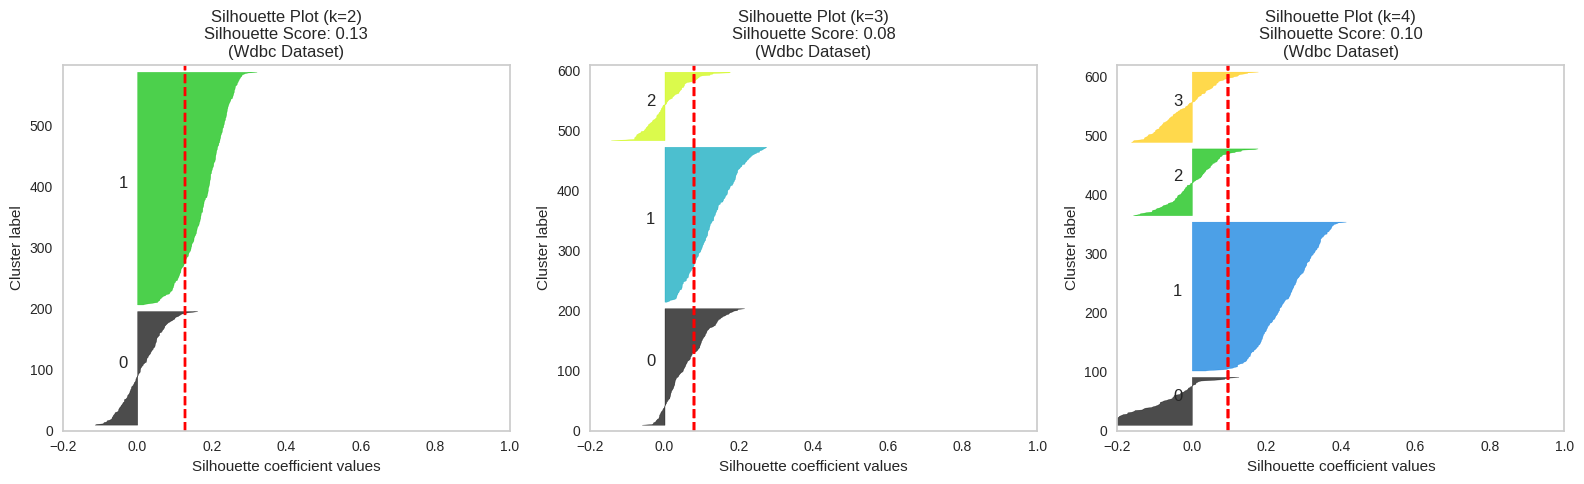

In [47]:
res_wdbc_kmeans_ica = runKMeans(W_,y_wdbc, 'Wdbc')
res_wdbc_kmeans_ica['Technique'] = 'ICA'
plot_silhouette(W_, 'Wdbc')

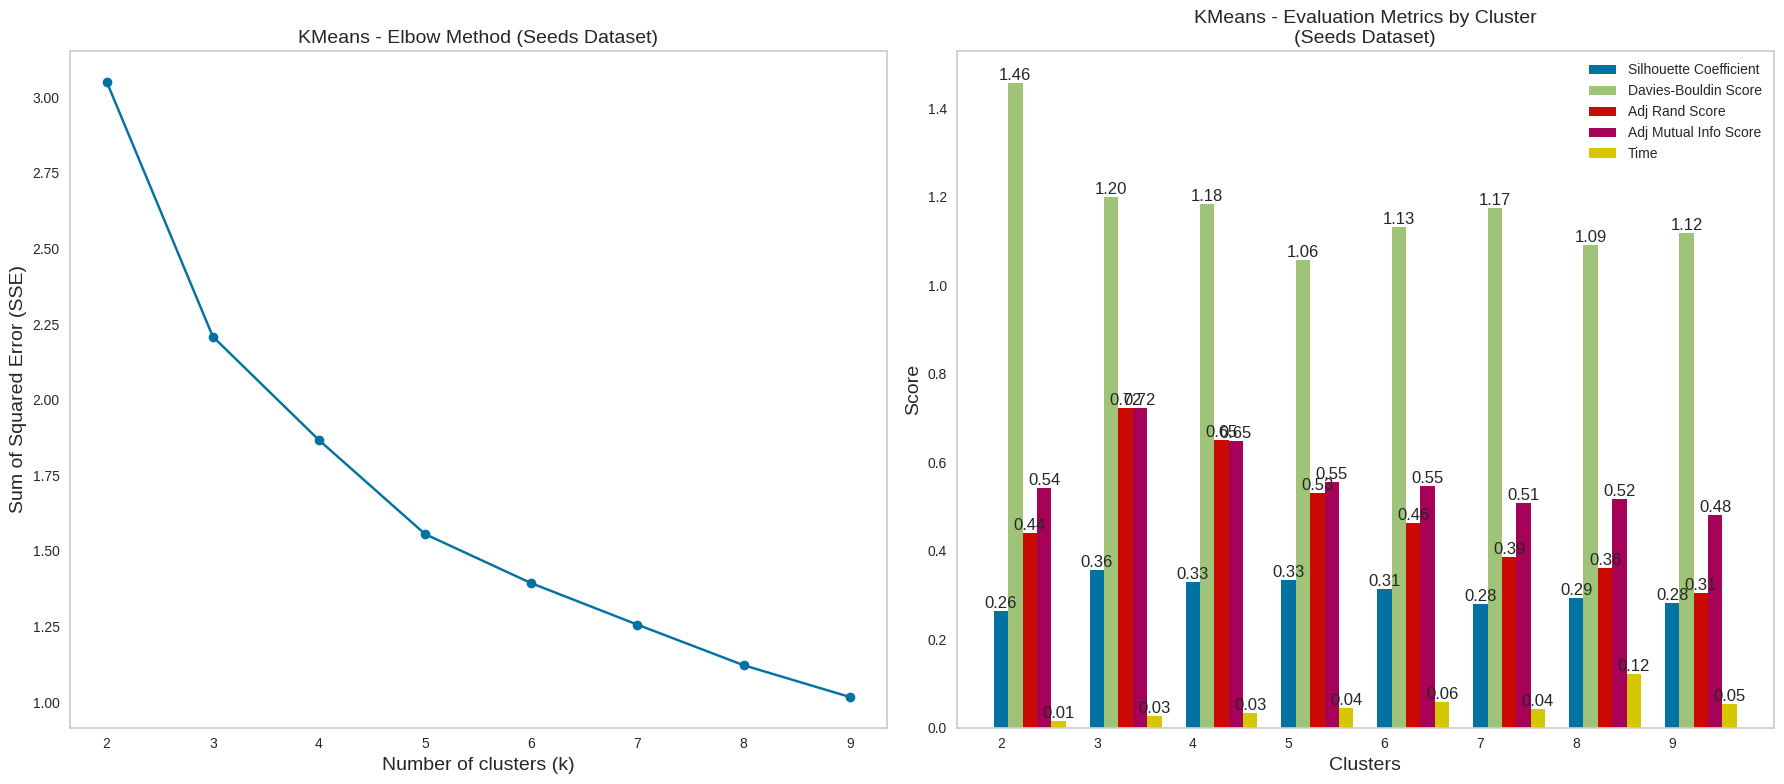

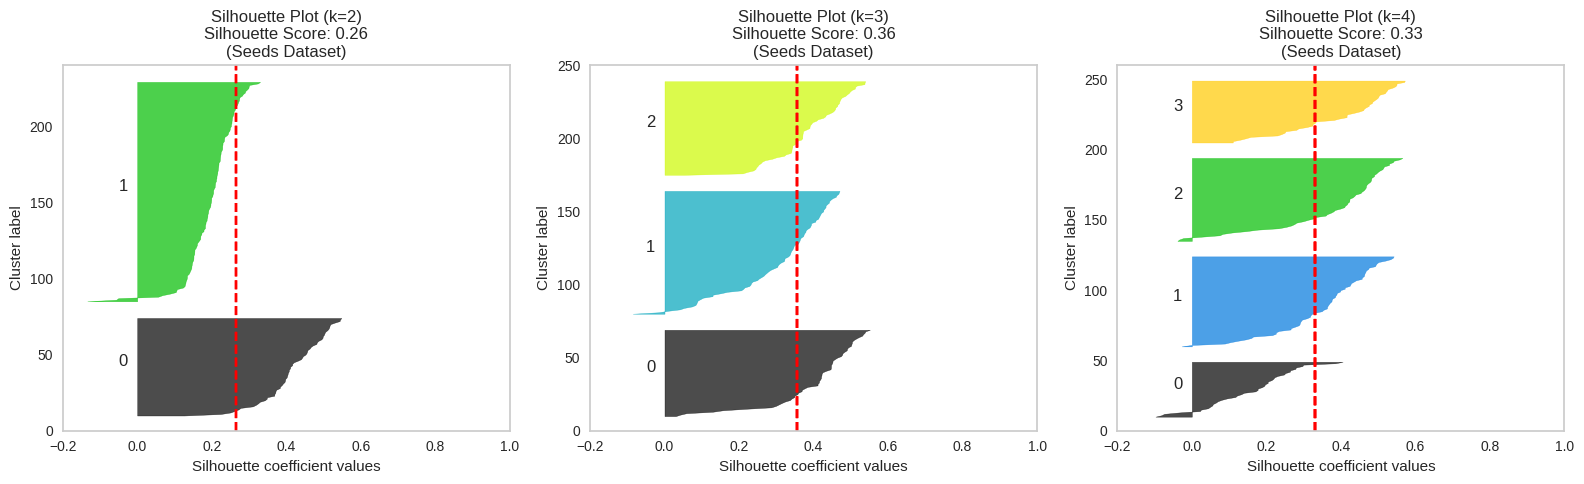

In [48]:
res_seed_kmeans_ica = runKMeans(S_,y_seed, 'Seeds')
res_seed_kmeans_ica['Technique'] = 'ICA'
plot_silhouette(S_, 'Seeds')

### **ICA With EM**

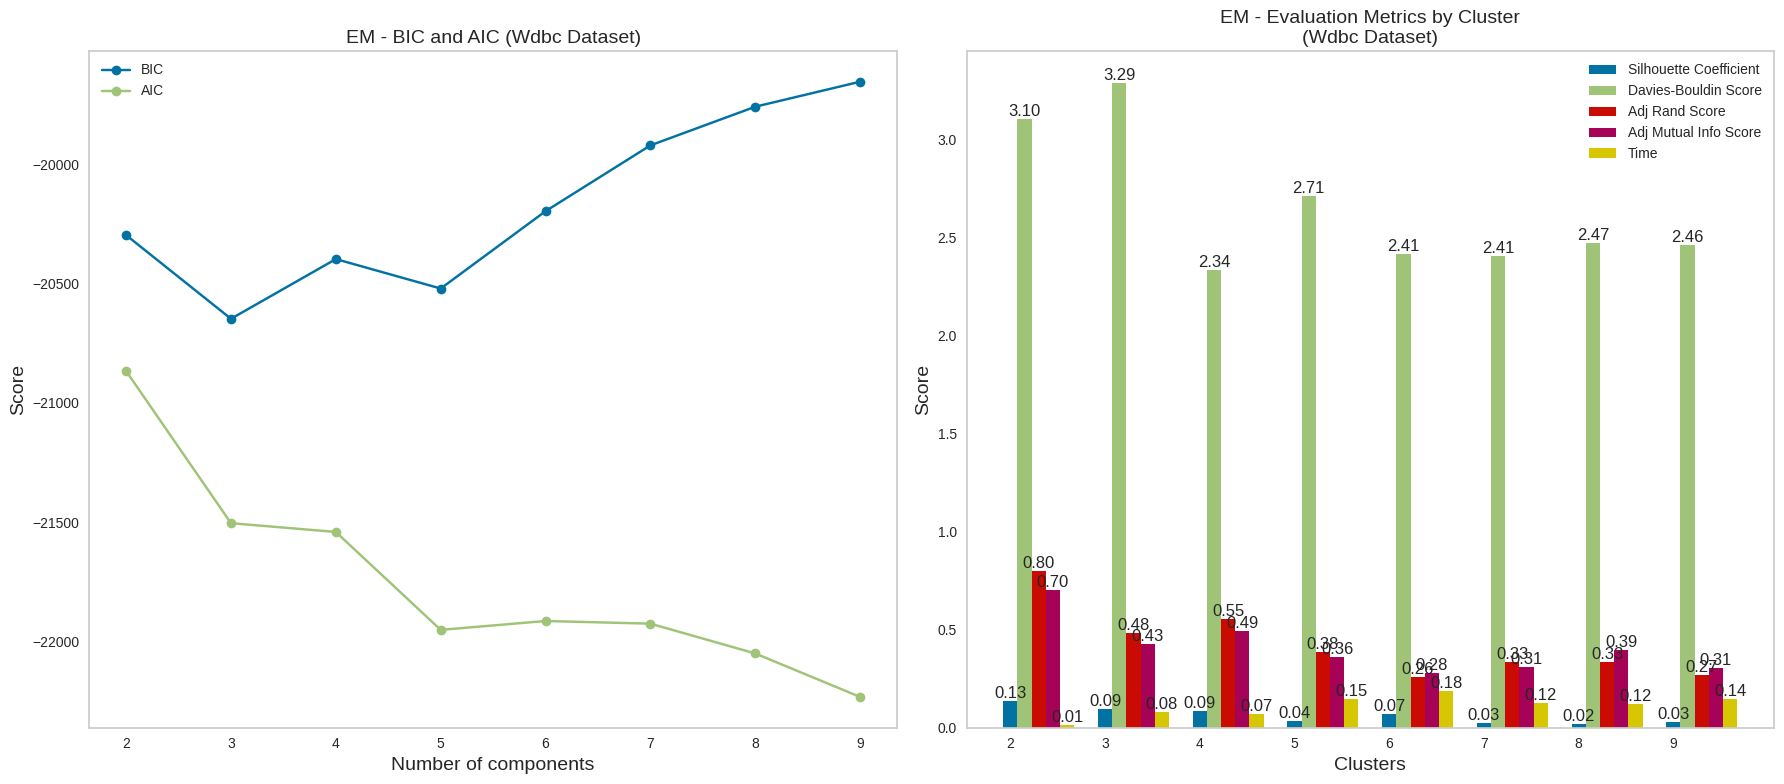

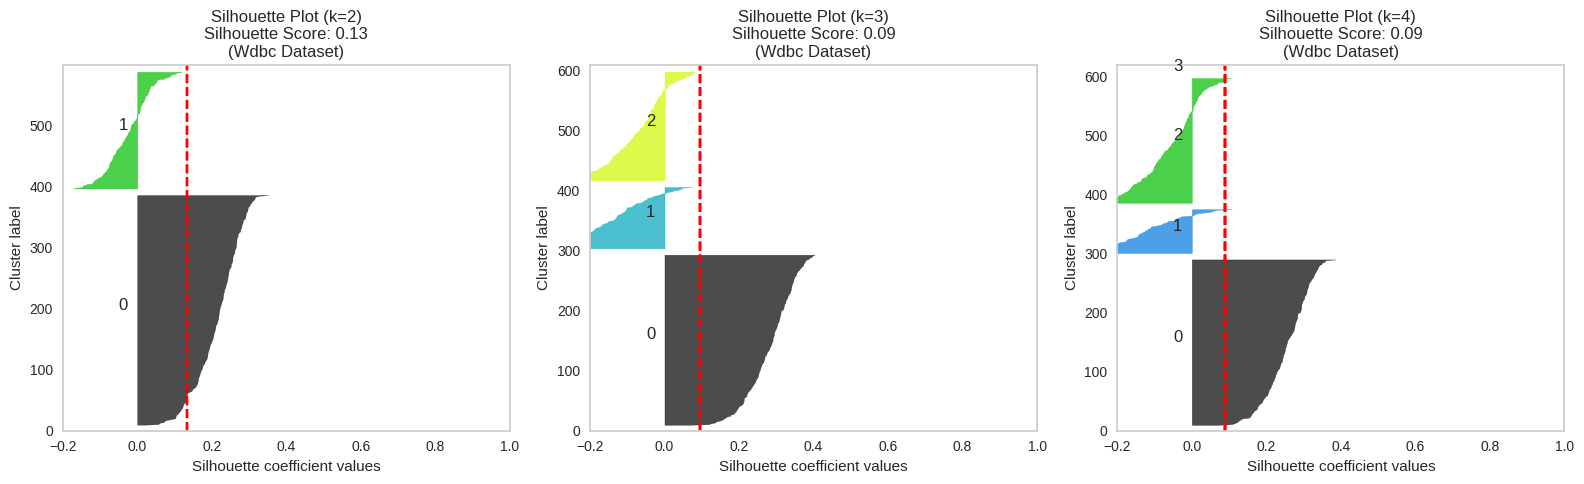

In [49]:
res_wdbc_gmm_ica = runGMM(W_,y_wdbc, 'Wdbc')
res_wdbc_gmm_ica['Technique'] = "ICA"
plot_silhouette_GMM(W_, 'Wdbc')

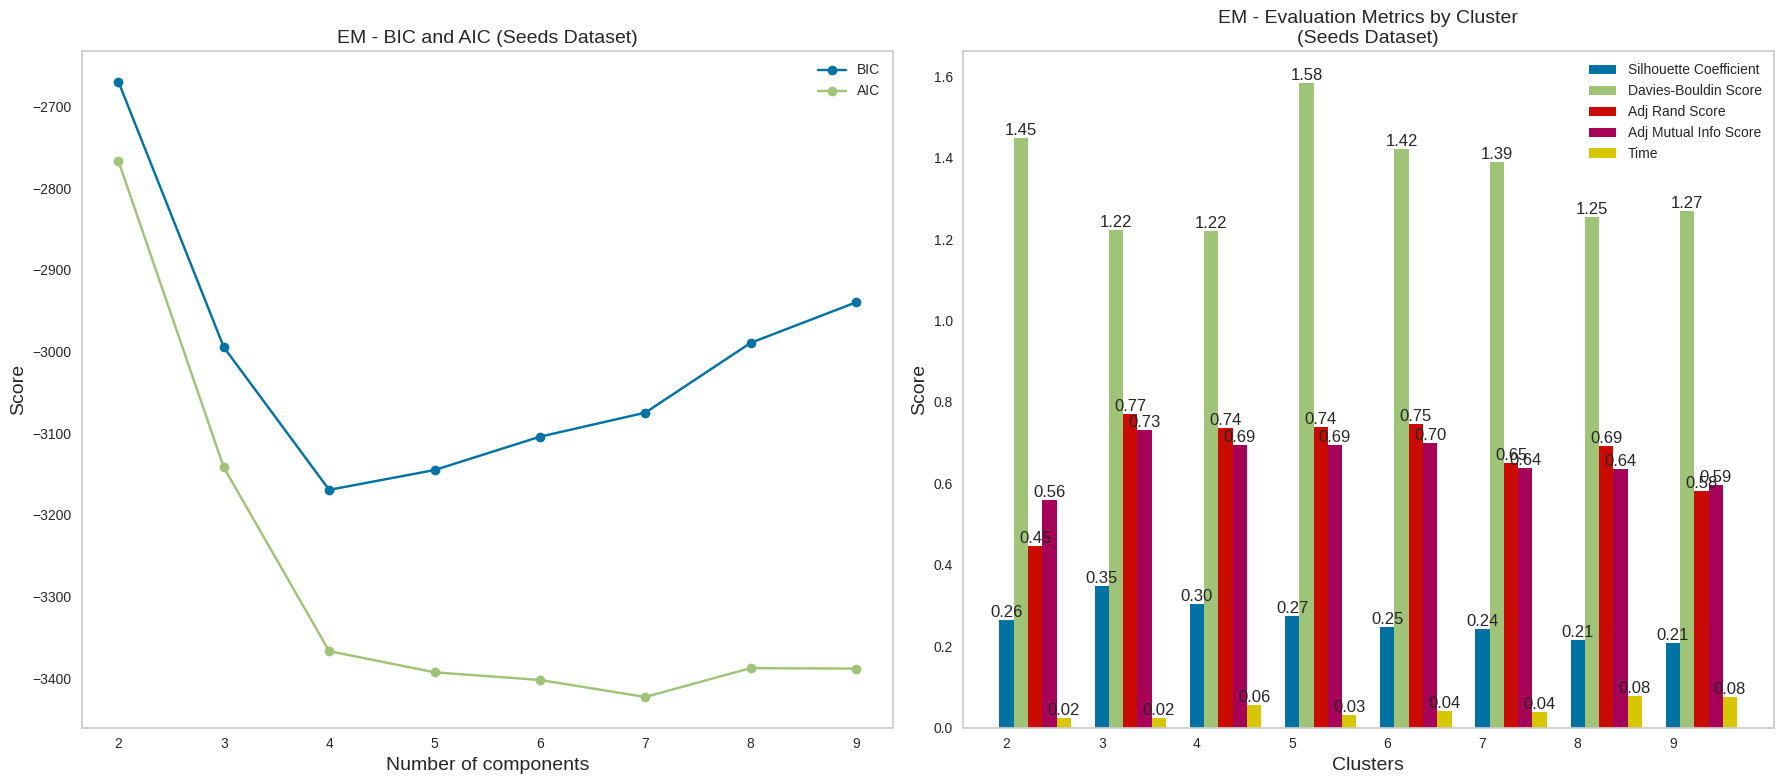

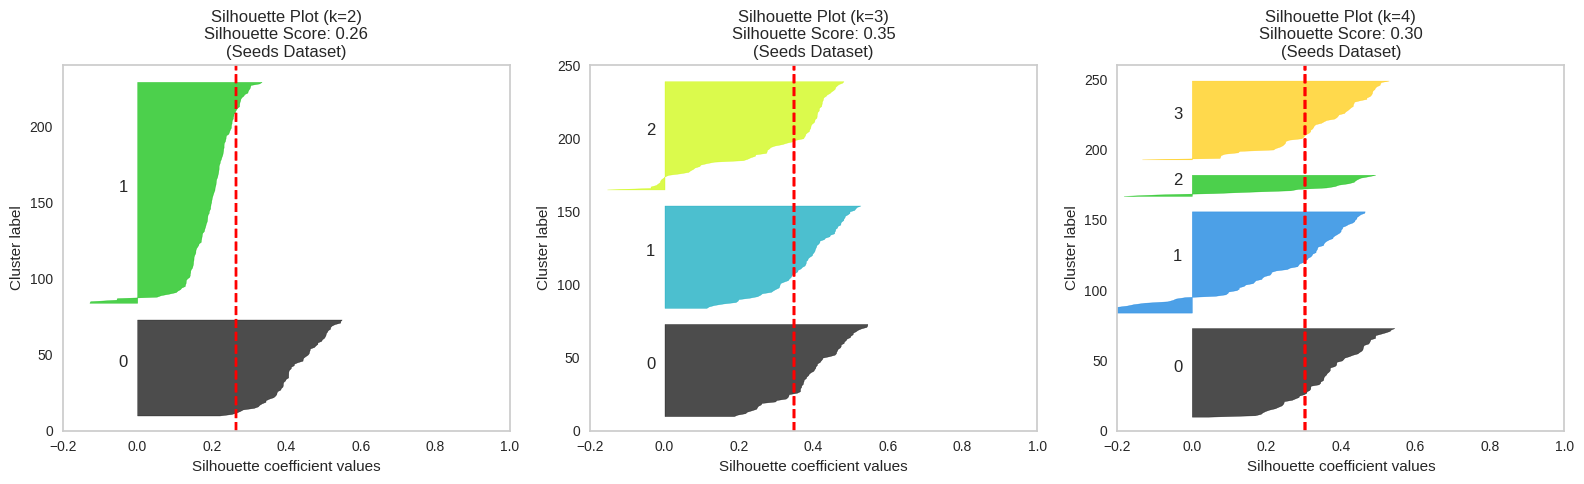

In [50]:
res_seeds_gmm_ica = runGMM(S_,y_seed, 'Seeds')
res_seeds_gmm_ica['Technique'] = "ICA"
plot_silhouette_GMM(S_, 'Seeds')

## **3-Randomized Projections (RP)**

In [51]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error

In [52]:
def plot_RP_check_Components(X, dataset_name):
  recons_err = []
  fit_time = []
  # max components = no features
  comp = range(1, X.shape[1])

  for i in comp:
    grp = GaussianRandomProjection(n_components = i, random_state=42)
    grp.fit(X)
    # Calculate recons err
    trans = grp.transform(X)
    pinv = np.linalg.pinv(np.transpose(grp.components_))
    X_recons = np.dot(trans, pinv)
    X_recons = pd.DataFrame(data=X_recons, columns=X.columns)
    rmse = np.sqrt(mean_squared_error(X, X_recons))
    recons_err.append(rmse)
  # print(recons_err)
  plt.figure(figsize=(6,5))
  # Plot ICA
  plt.plot(comp,recons_err, marker='o')
  plt.title(f'Randomized Projections - {dataset_name} Dataset')
  plt.xlabel('Number of components')
  plt.ylabel('Reconstruction error (RMSE)')
  #plt.legend(loc='best')
  plt.grid()
  plt.show()

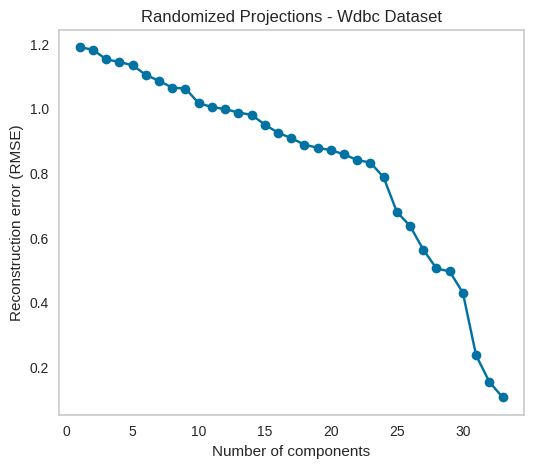

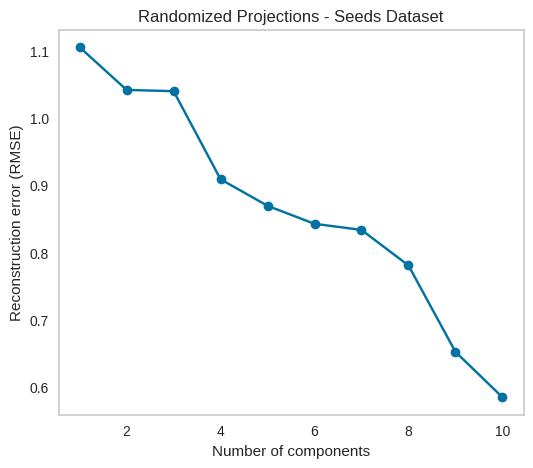

In [53]:
plot_RP_check_Components(df_wdbc_std, 'Wdbc')
plot_RP_check_Components(df_seed_std, 'Seeds')

* **For the Wisconsin dataset**, where you analyzed the reconstruction error (RMSE), the optimal number of components appears to be around 10. This is the point at which the reconstruction error starts to level off, indicating that further components do not significantly contribute to improving the reconstruction. Choosing 10 components is a reasonable choice for this dataset.

* **For the Seeds datase**t, the analysis of the reconstruction error suggests that the optimal number of components is around 3. At this point, the reconstruction error starts to level off, indicating that you can achieve dimensionality reduction with minimal loss of information by retaining 3 components.

In [54]:
rp = GaussianRandomProjection(n_components=10, random_state=42)
W_RP = rp.fit_transform(df_wdbc_std)

rp1 = GaussianRandomProjection(n_components=3,random_state=42)
S_RP = rp1.fit_transform(df_seed_std)

### **RP With KMeans**

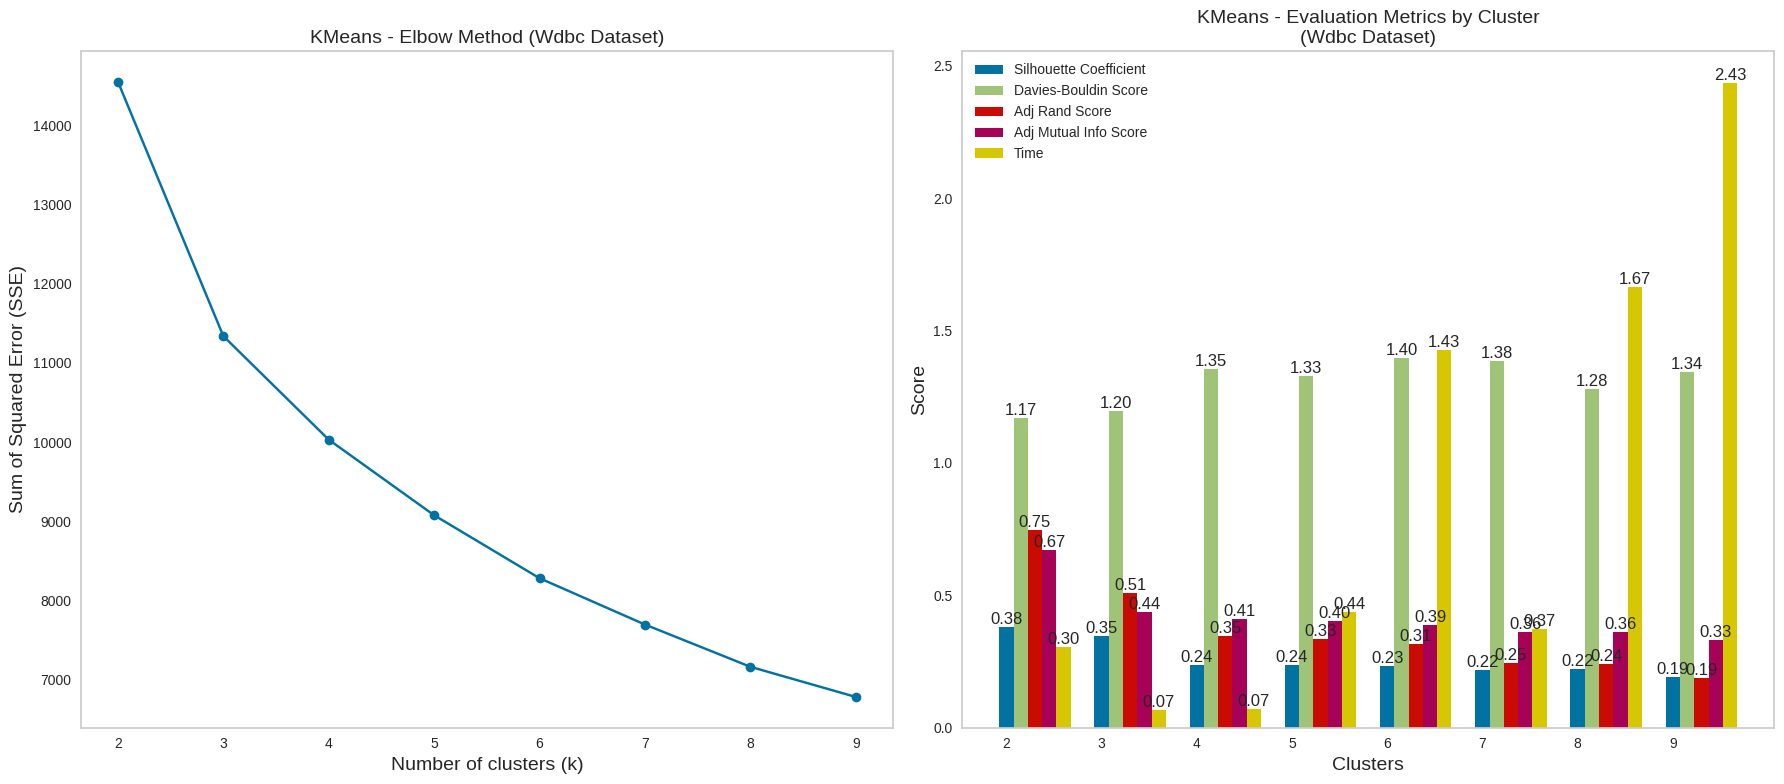

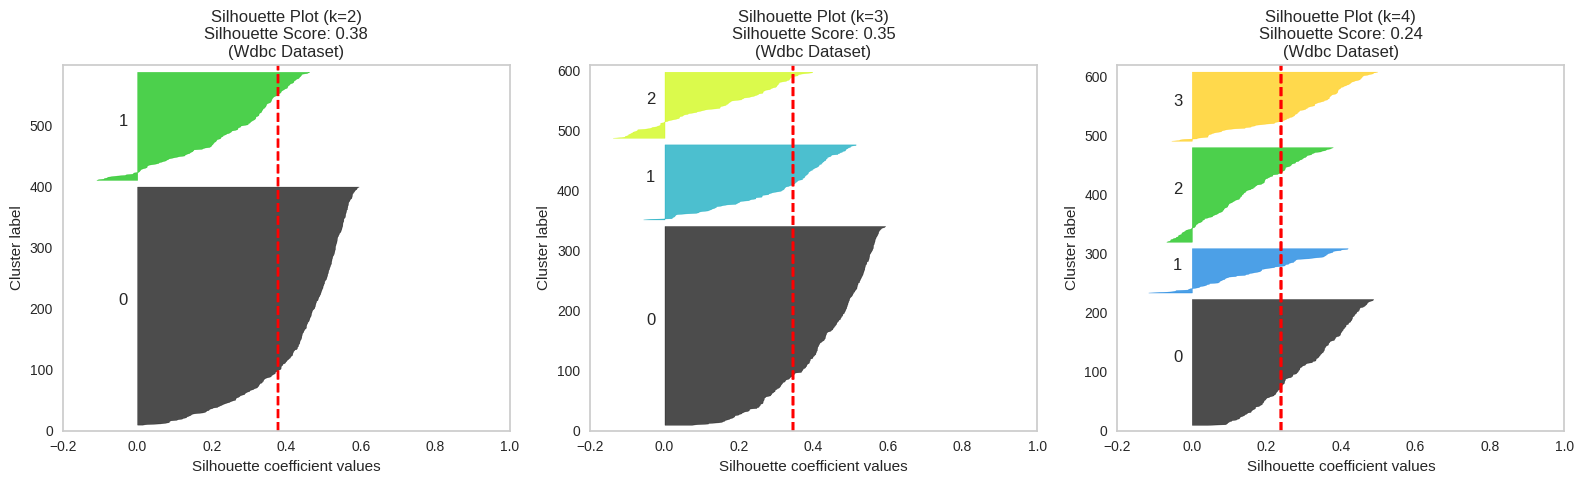

In [55]:
res_wdbc_kmeans_rp = runKMeans(W_RP,y_wdbc, 'Wdbc')
res_wdbc_kmeans_rp['Technique'] = 'RP'
plot_silhouette(W_RP, 'Wdbc')

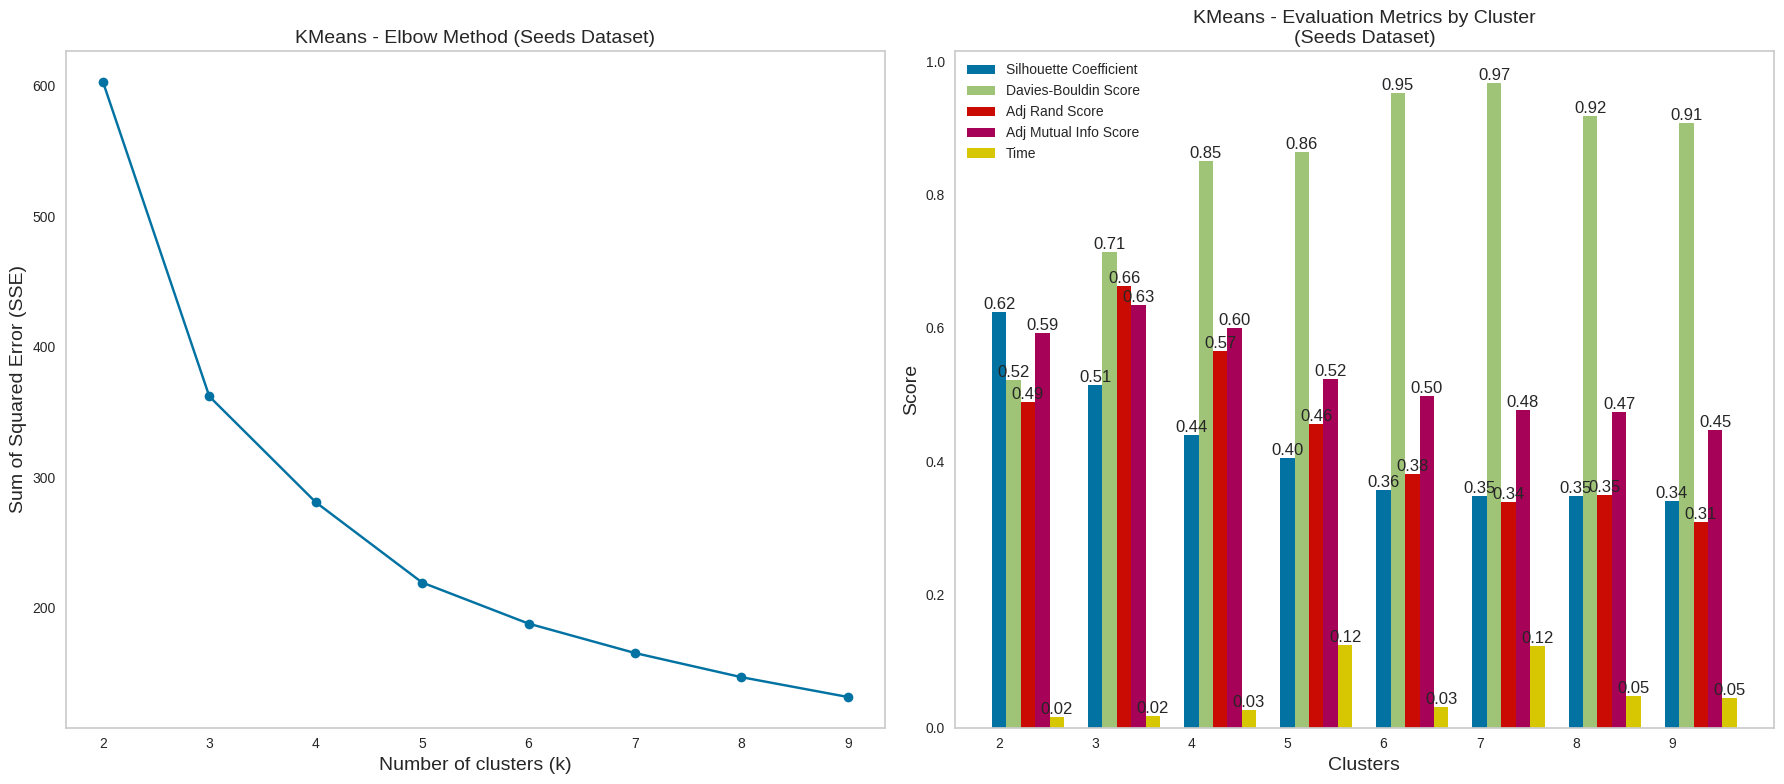

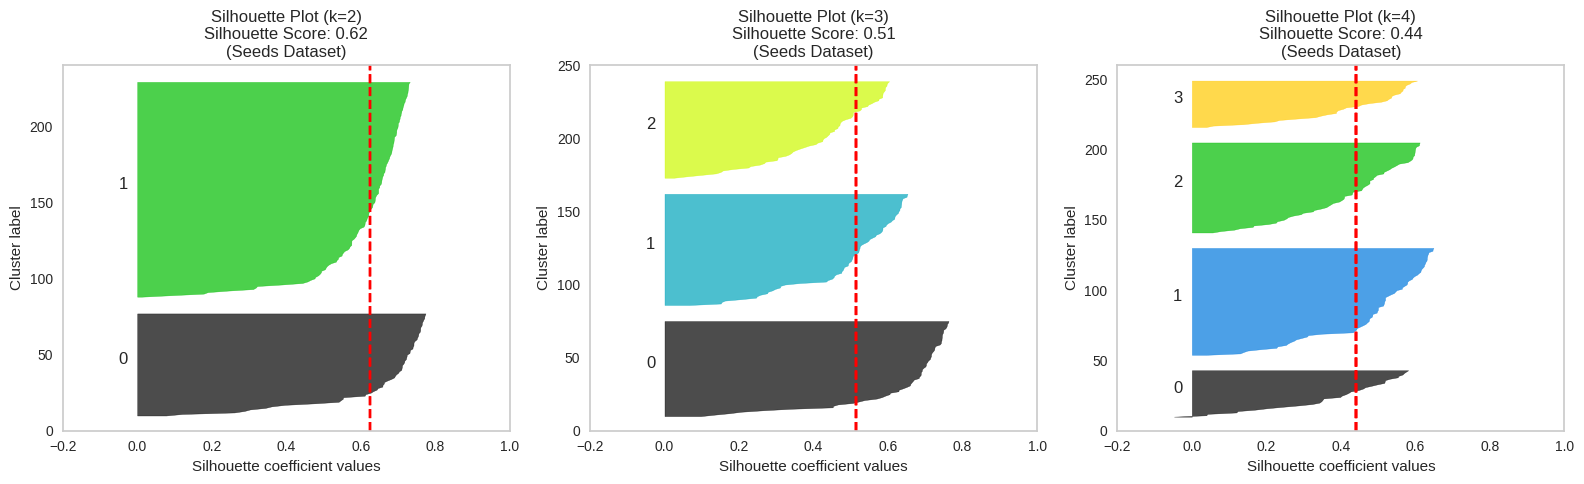

In [56]:
res_seeds_kmeans_rp = runKMeans(S_RP,y_seed, 'Seeds')
res_seeds_kmeans_rp['Technique'] = 'RP'
plot_silhouette(S_RP, 'Seeds')

### **RP With EM**

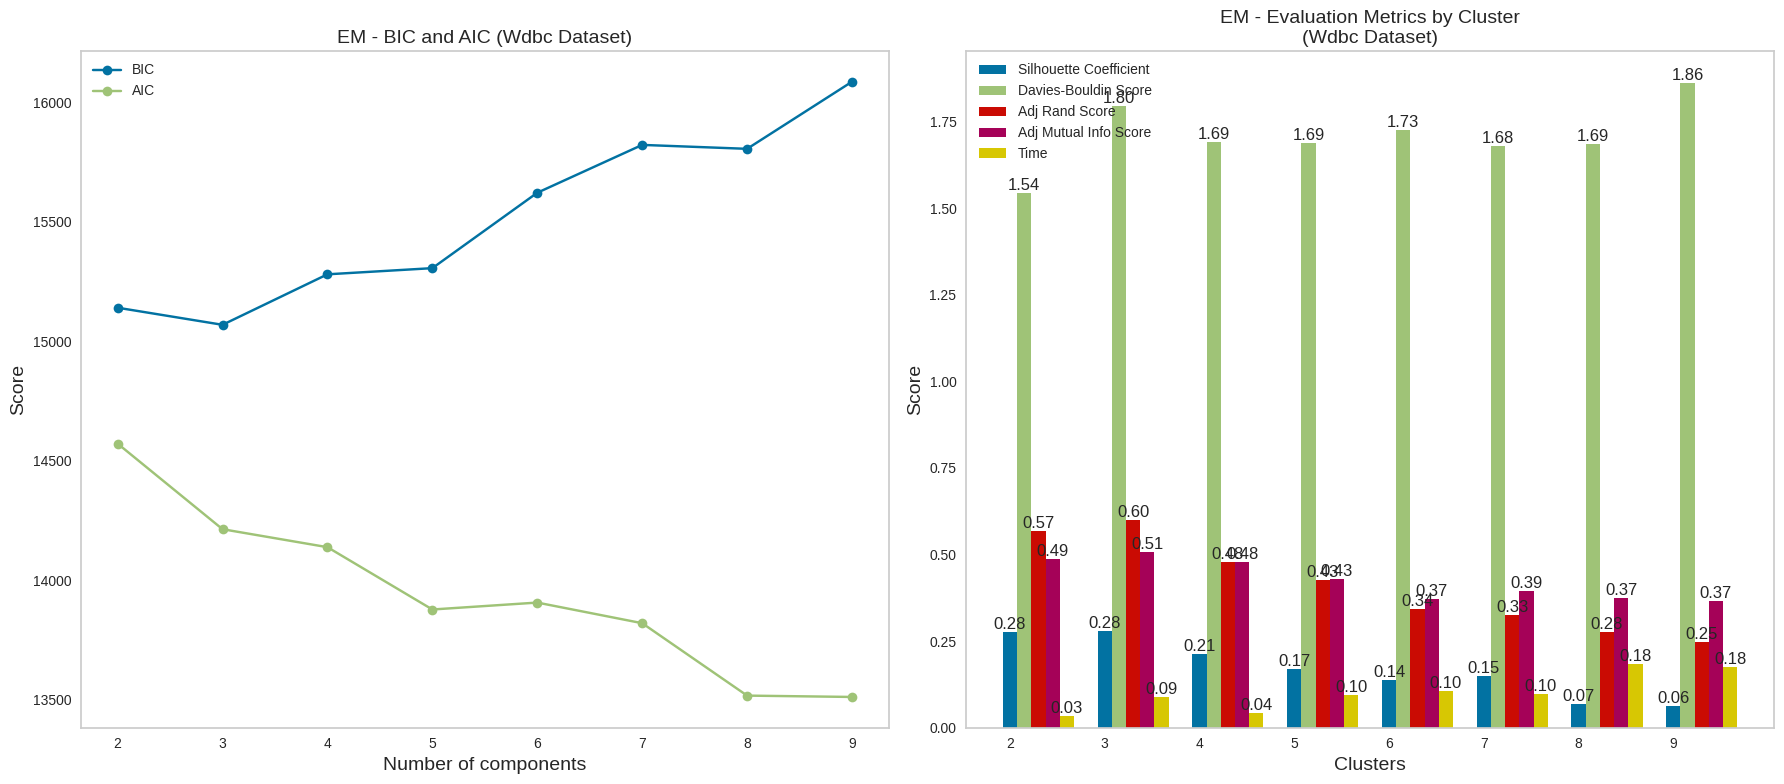

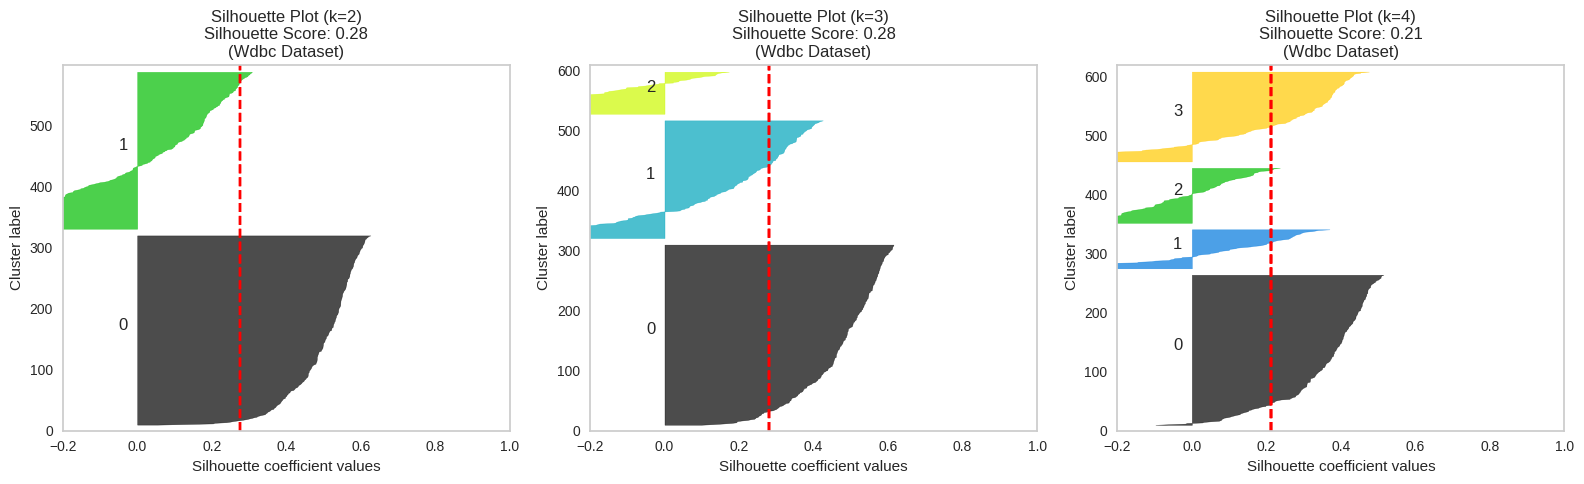

In [57]:
res_wdbc_gmm_rp = runGMM(W_RP,y_wdbc, 'Wdbc')
res_wdbc_gmm_rp['Technique'] = 'RP'
plot_silhouette_GMM(W_RP, 'Wdbc')

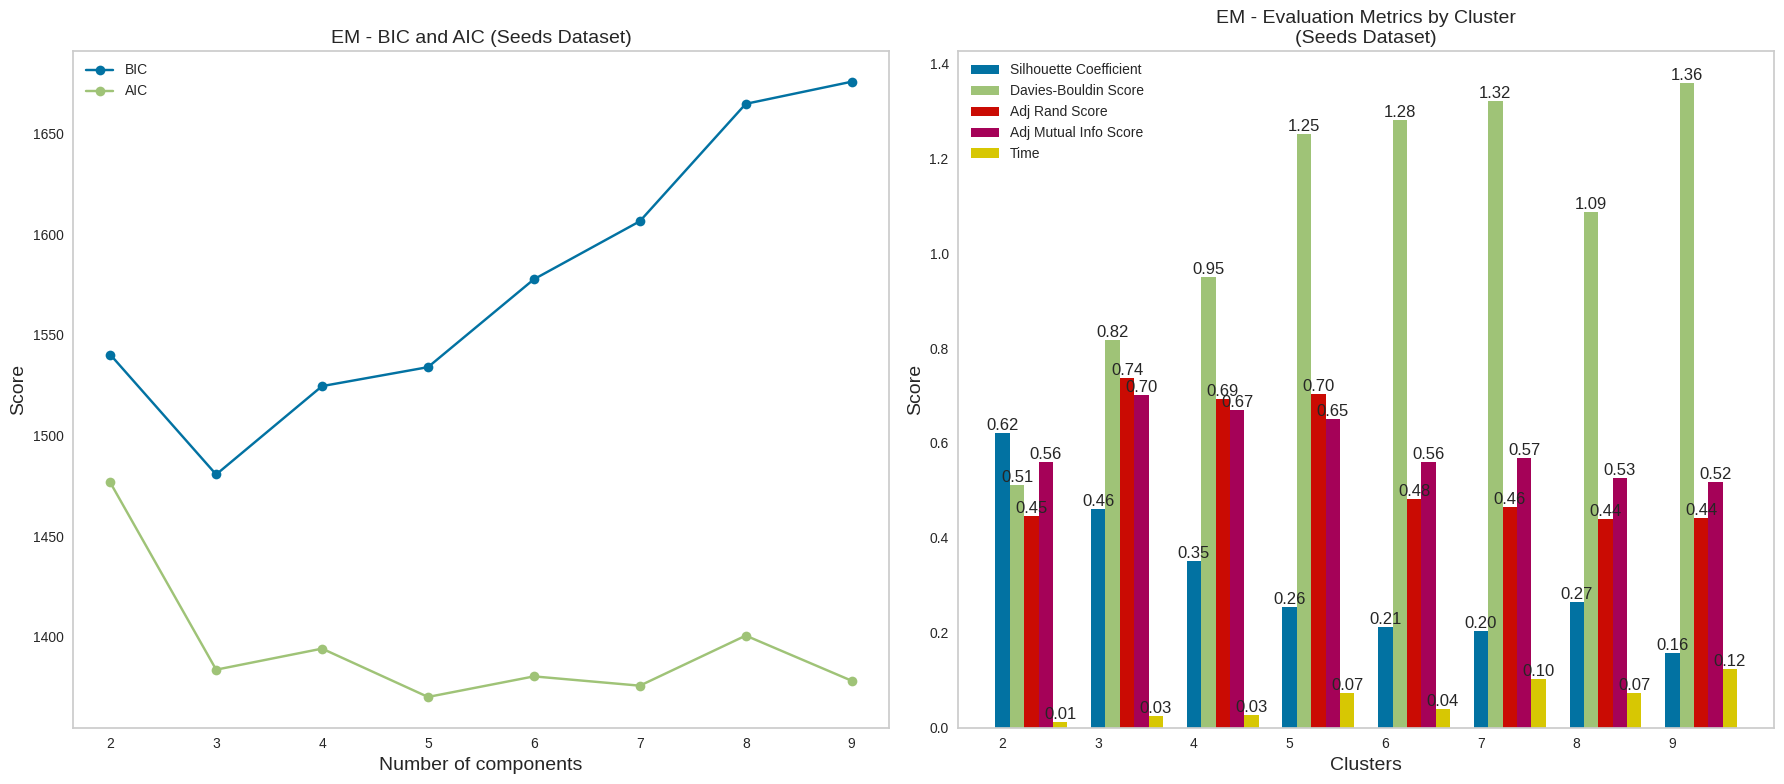

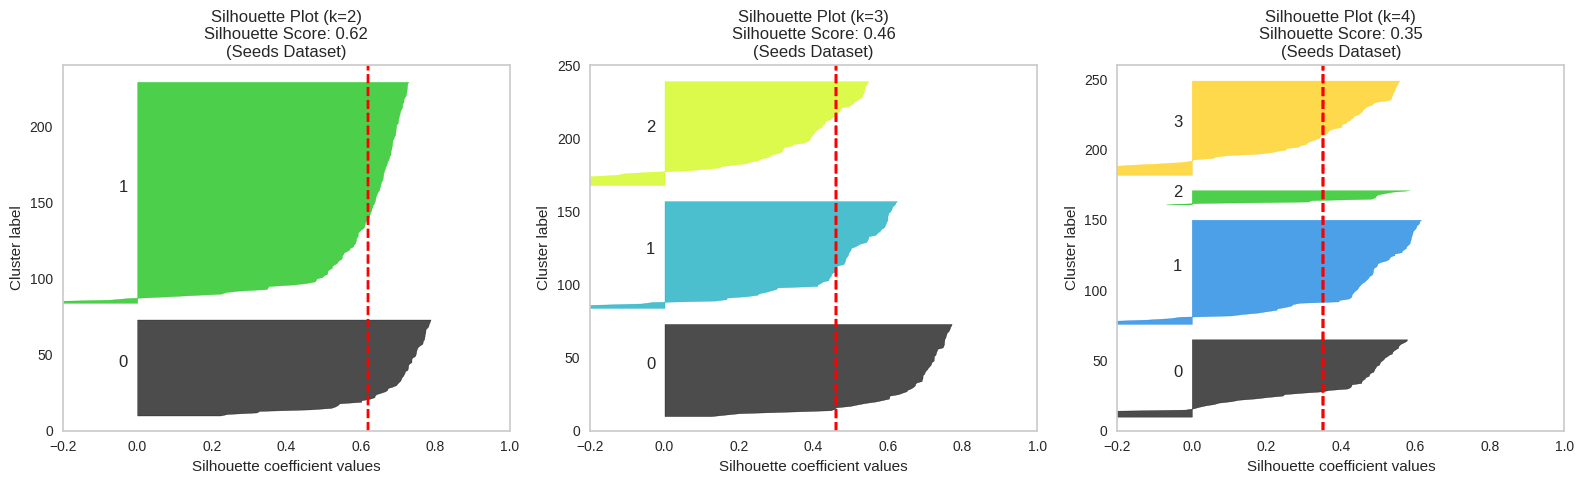

In [58]:
res_seeds_gmm_rp = runGMM(S_RP,y_seed, 'Seeds')
res_seeds_gmm_rp['Technique'] = 'RP'
plot_silhouette_GMM(S_RP, 'Seeds')

## **4-Random Forest Feature Selection (RF)**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
def plot_RF_Feature_Importance(X,y, dataset_name):
  # Create a Random Forest classifier
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

  # Fit the classifier to your data
  rf_classifier.fit(X, y)

  # Get feature importances from the model
  feature_importances = rf_classifier.feature_importances_

  # Get feature names
  feature_names = X.columns

  # Sort features by importance
  sorted_indices = np.argsort(feature_importances)

  # Plot the feature importance
  plt.figure(figsize=(7, 6))
  plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
  plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
  plt.xlabel("Feature Importance")
  plt.title(f"Random Forest Feature Importance ({dataset_name}) Dataset")
  plt.grid(False)
  plt.show()
  return np.array(feature_names)[sorted_indices][::-1]


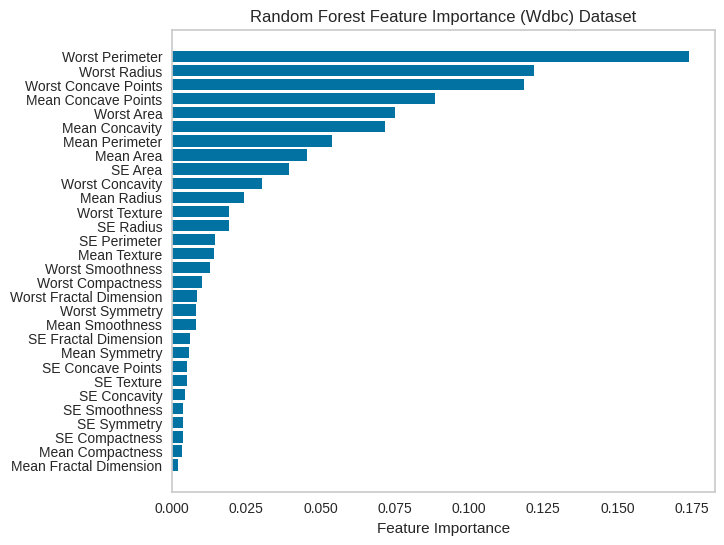

In [61]:
top_features_wdbc = plot_RF_Feature_Importance(df_wdbc_std_org,y_wdbc, 'Wdbc')

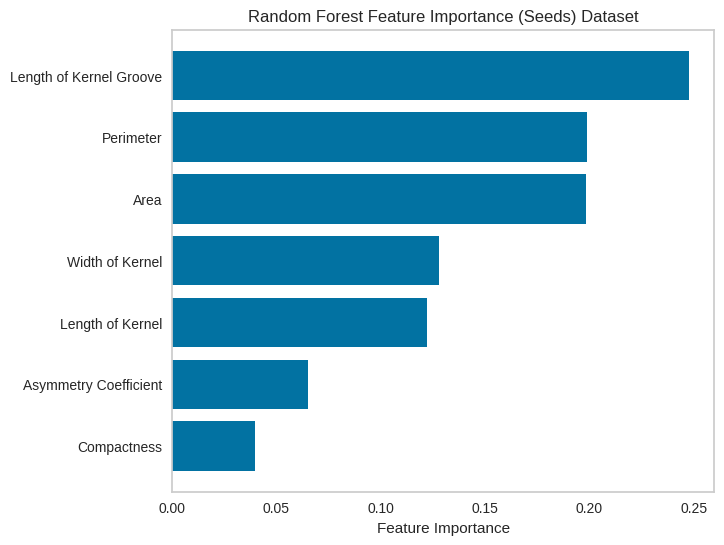

In [62]:
top_features_seed = plot_RF_Feature_Importance(df_seed_std_org,y_seed, 'Seeds')

Certainly, we can use feature selection through a Random Forest classifier to identify the most important features for each dataset. Based on the feature importance scores, we can select a subset of the most relevant features.

* **For the Wisconsin dataset**, we select the first 5 features with the highest feature importance. These features are 'Worst Perimeter', 'Worst Radius', 'Worst Concave Points', 'Mean Concave Points', and 'Worst Area':

* **For the Seeds dataset**, we select the first 3 features with the highest feature importance. These features are 'Length of Kernel Groove', 'Perimeter', and 'Area':


In [63]:
selected_features_wisconsin = ['Worst Perimeter', 'Worst Radius', 'Worst Concave Points', 'Mean Concave Points', 'Worst Area']
selected_features_seeds = ['Length of Kernel Groove', 'Perimeter', 'Area']

In [64]:
df_wdbc_std_x = df_wdbc_std_org[selected_features_wisconsin]
df_seed_std_x = df_seed_std_org[selected_features_seeds]

### **RF With KMeans**

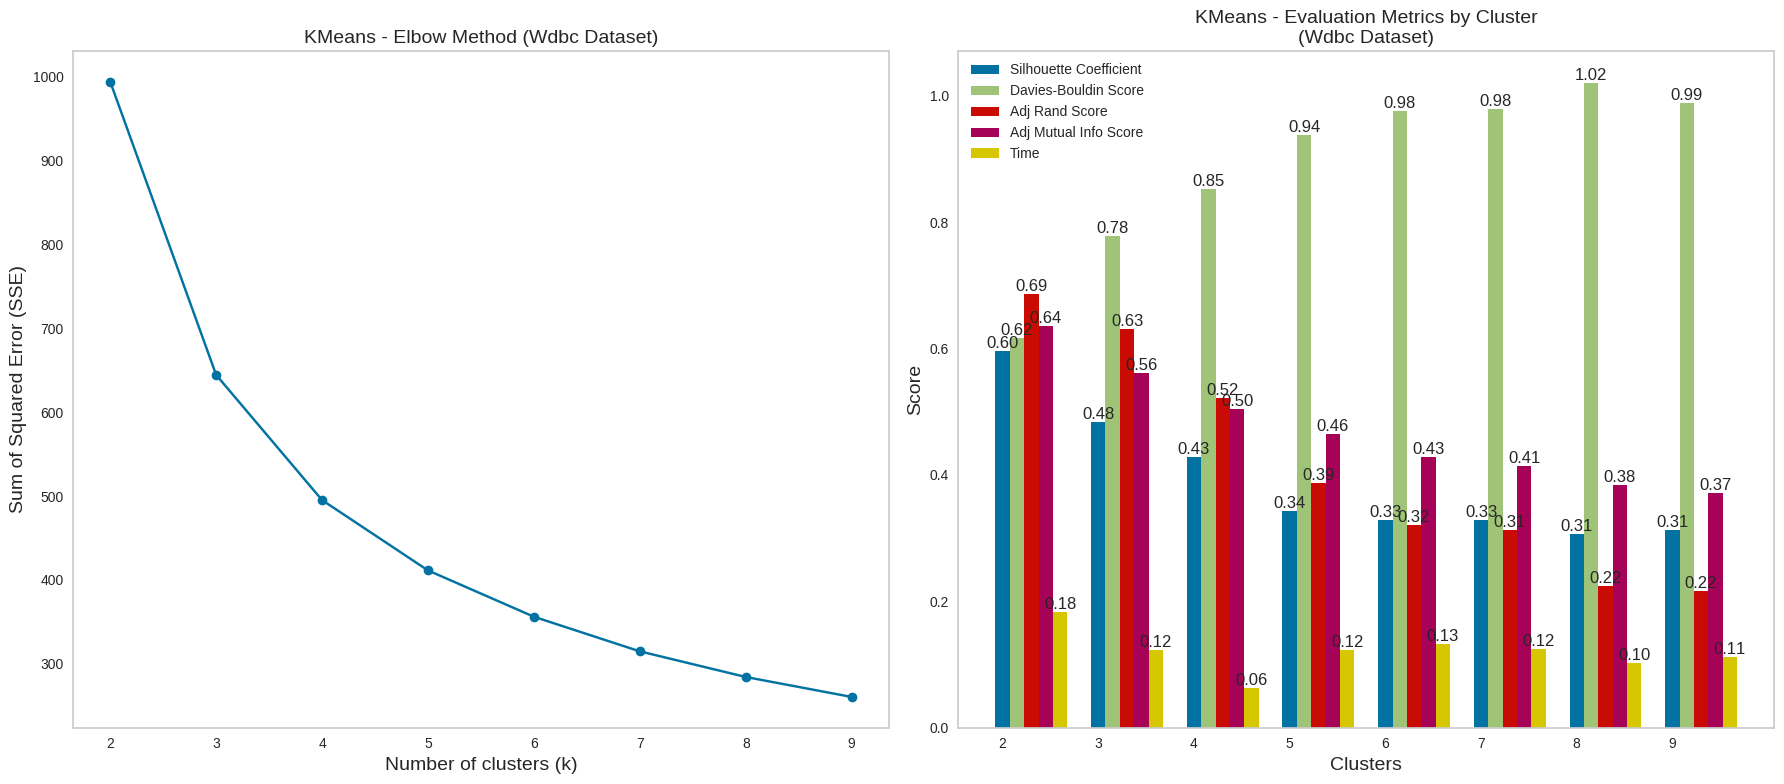

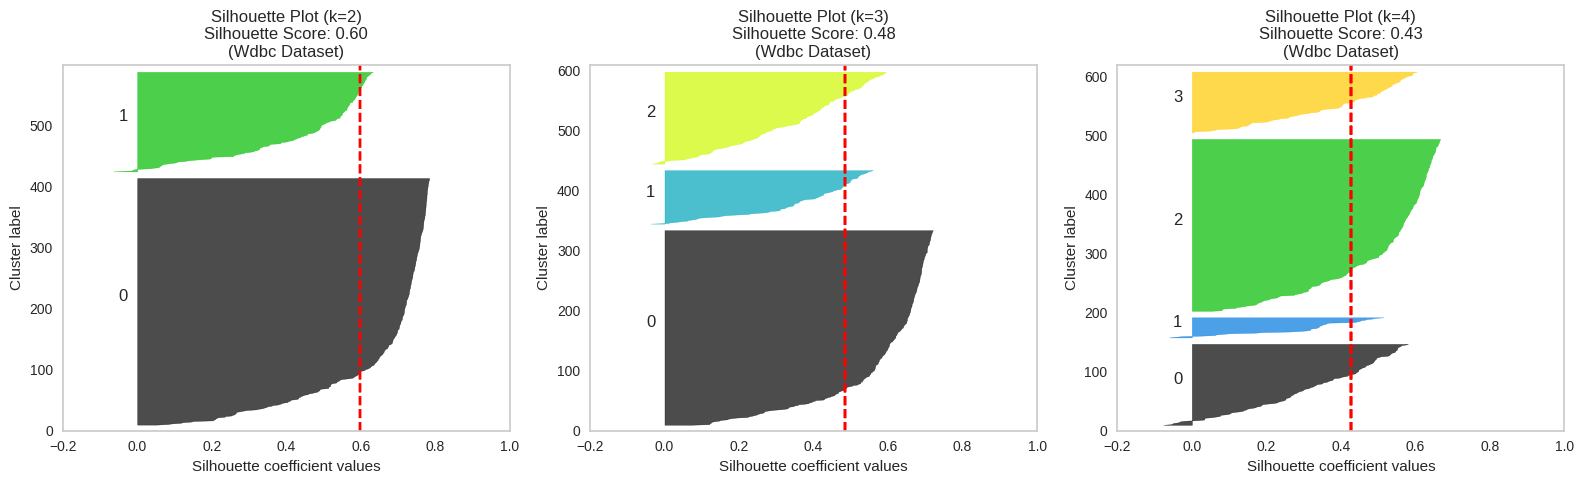

In [65]:
res_wdbc_kmeans_rf = runKMeans(df_wdbc_std_x,y_wdbc, 'Wdbc')
res_wdbc_kmeans_rf['Technique'] = 'RF'
plot_silhouette(df_wdbc_std_x, 'Wdbc')

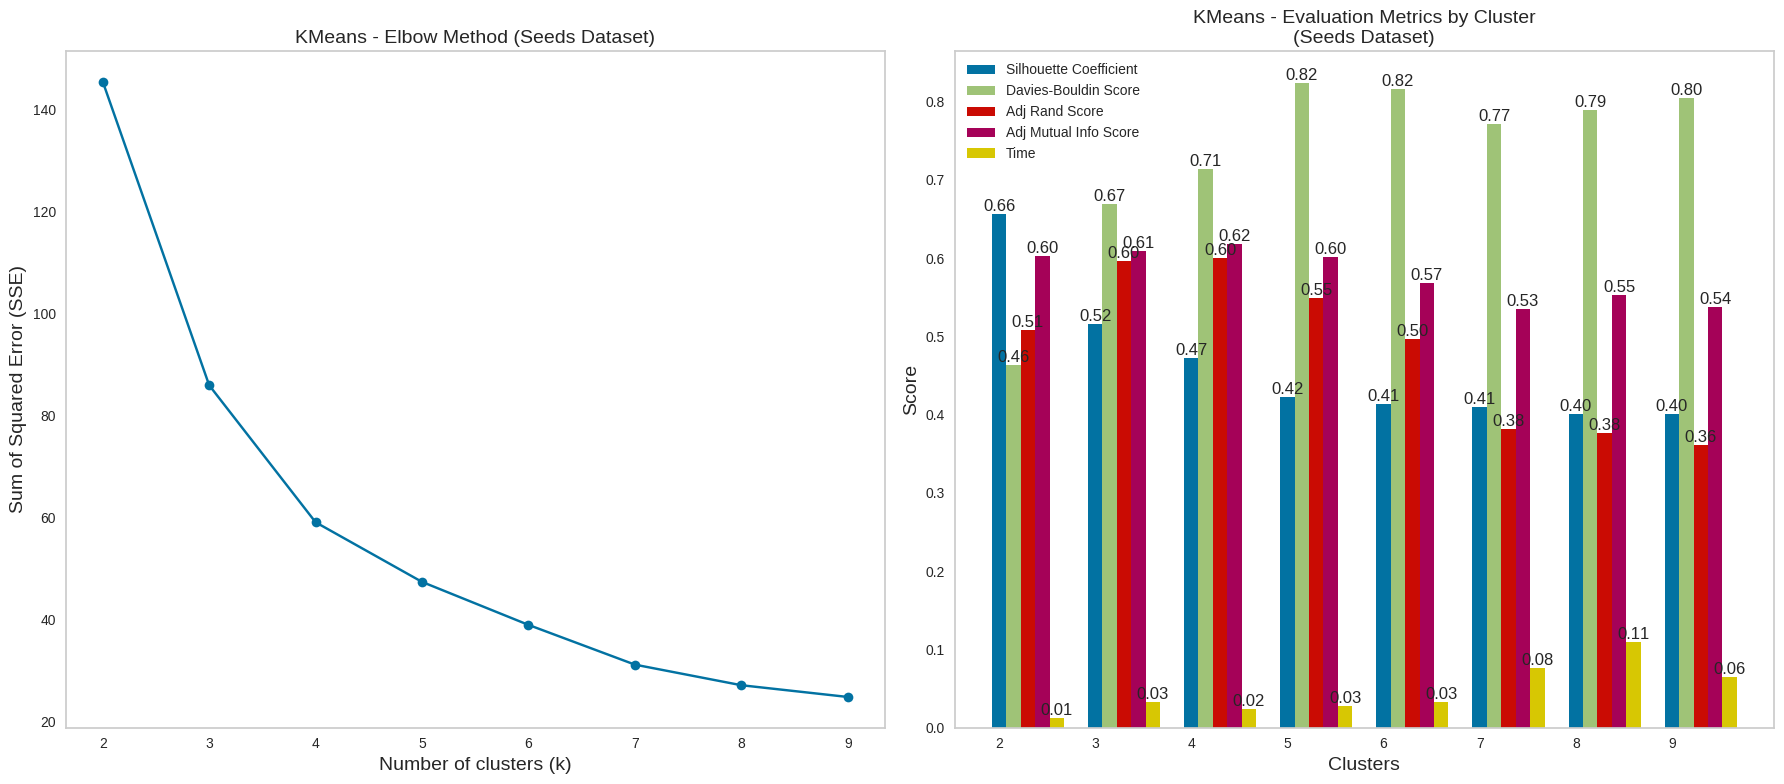

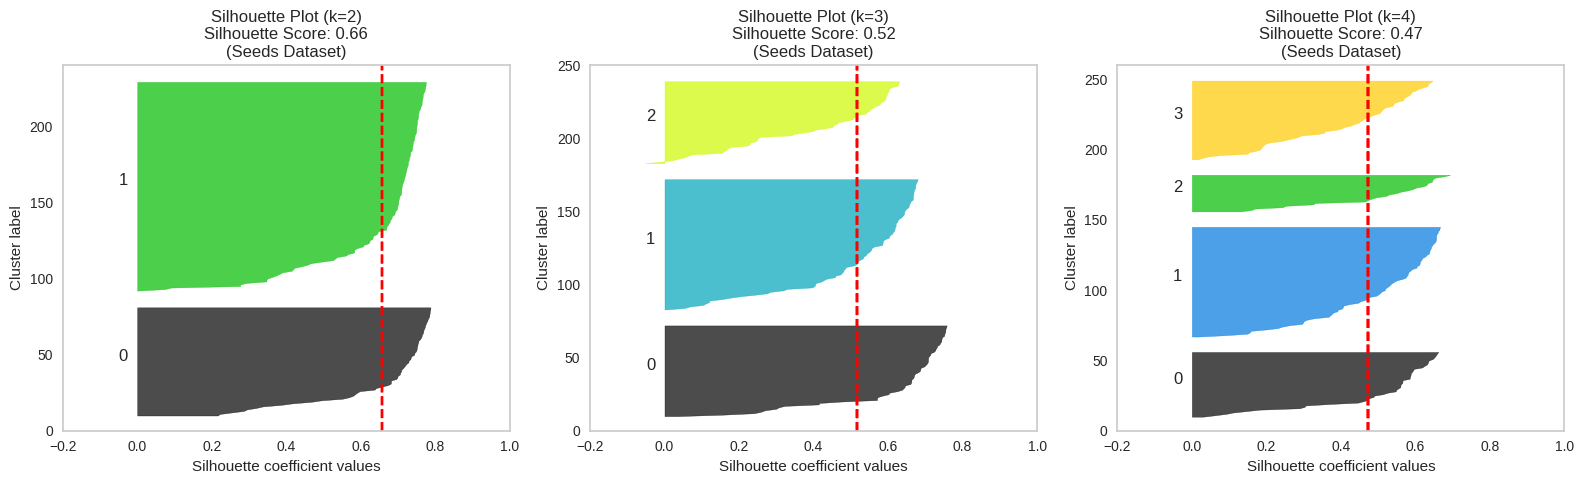

In [66]:
res_seeds_kmeans_rf = runKMeans(df_seed_std_x,y_seed, 'Seeds')
res_seeds_kmeans_rf['Technique'] = 'RF'

plot_silhouette(df_seed_std_x, 'Seeds')

### **RF With EM**

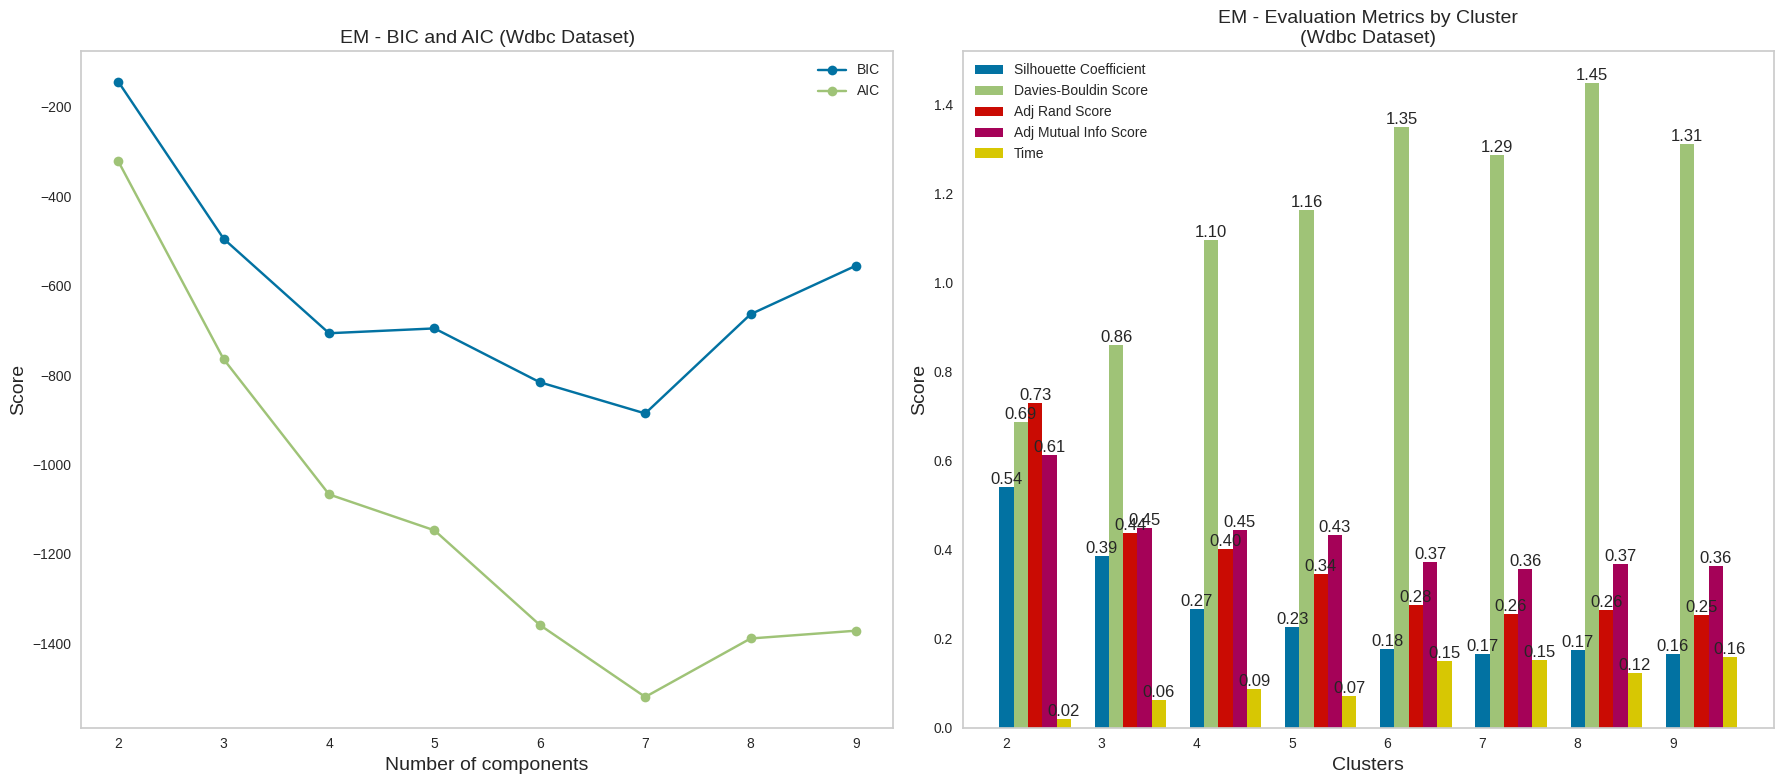

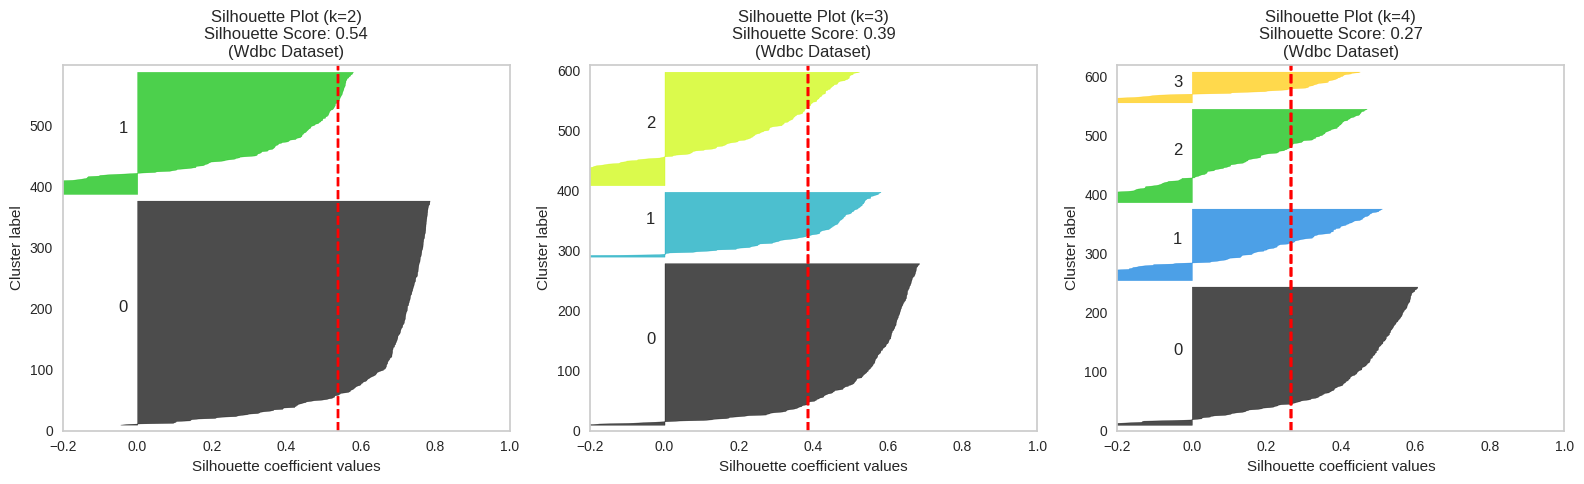

In [67]:
res_wdbc_gmm_rf = runGMM(df_wdbc_std_x,y_wdbc, 'Wdbc')
res_wdbc_gmm_rf['Technique'] = 'RF'
plot_silhouette_GMM(df_wdbc_std_x, 'Wdbc')

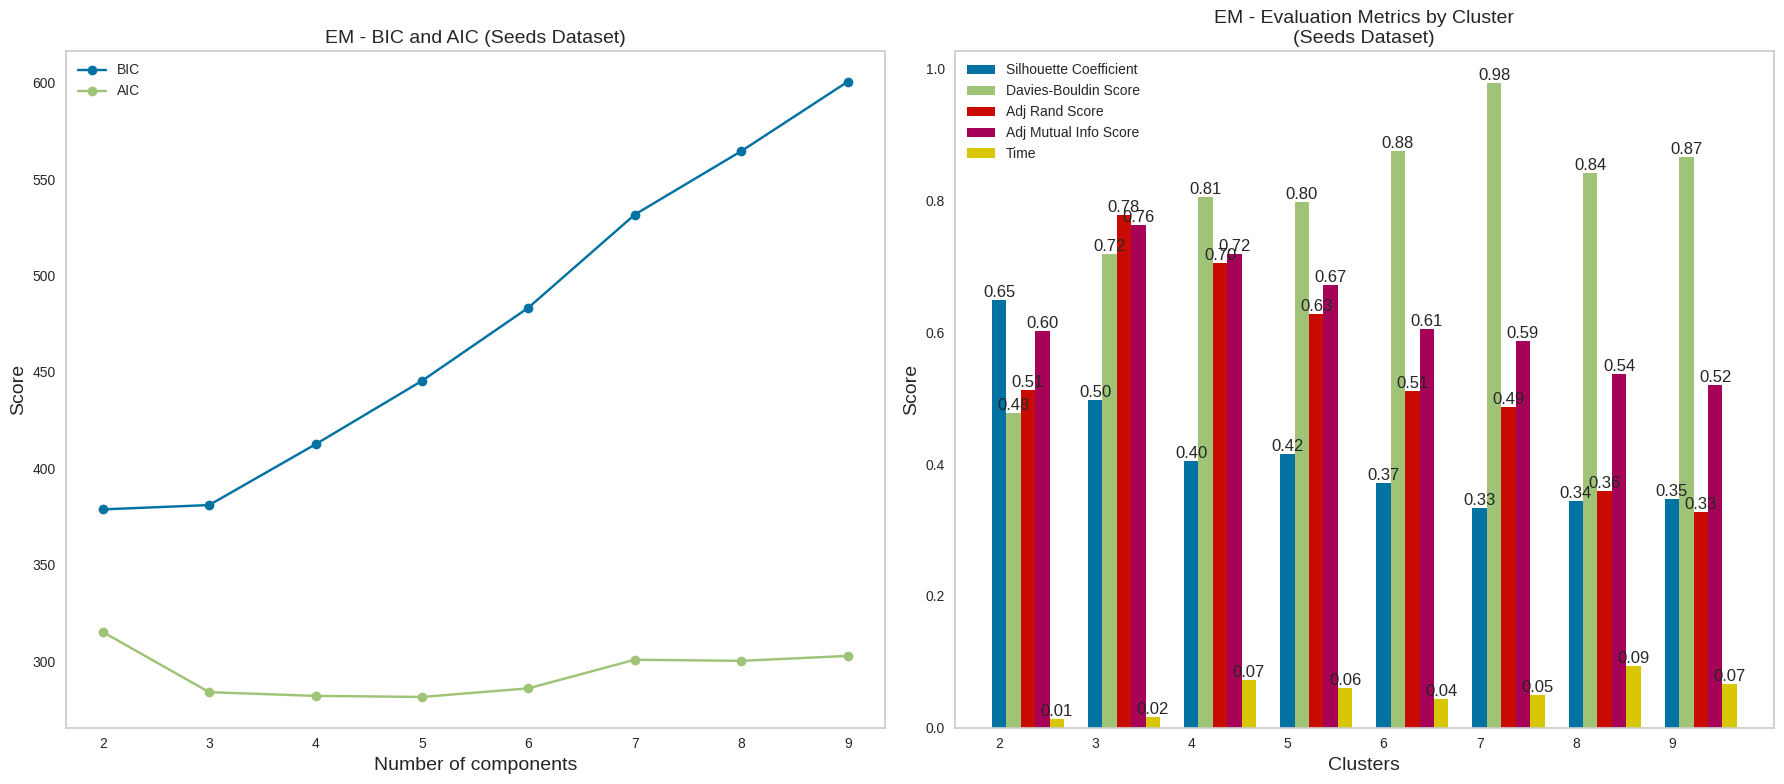

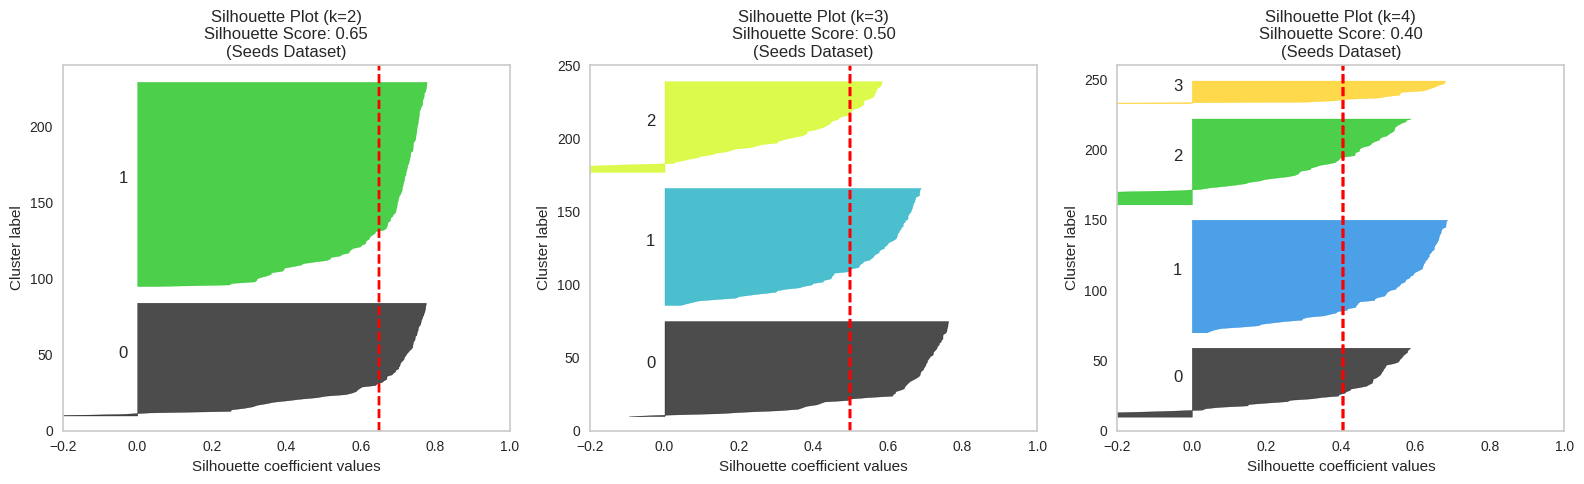

In [68]:
res_seeds_gmm_rf = runGMM(df_seed_std_x,y_seed, 'Seeds')
res_seeds_gmm_rf['Technique'] = 'RF'
plot_silhouette_GMM(df_seed_std_x, 'Seeds')

## **All Reduction Technique Analysis**

In [69]:
df_wdbc_kmeans = pd.concat([res_wdbc_kmeans_org, res_wdbc_kmeans_pca, res_wdbc_kmeans_ica, res_wdbc_kmeans_rp, res_wdbc_kmeans_rf])
df_wdbc_gmm = pd.concat([res_wdbc_gmm_org, res_wdbc_gmm_pca, res_wdbc_gmm_ica, res_wdbc_gmm_rp, res_wdbc_gmm_rf])

In [70]:
def plot_evaluation_metrics_on_all_technique(df, clustering, dataset_name):
  # Create subplots for each scoring metric
  plt.figure(figsize=(15, 10))

  # Define the scoring metrics to be plotted
  scoring_metrics = ["Adjusted Rand Score","Adjusted Mutual Info Score", "Davies-Bouldin Score", "Silhouette Coefficient"]

  for i, metric in enumerate(scoring_metrics, start=1):
      plt.subplot(2, 2, i)
      for name, group in df.groupby('Technique'):
          plt.plot(group['Clusters'], group[metric], marker='o', label=name)
      plt.xlabel('Number of Clusters')
      plt.ylabel(metric)
      plt.title(f'{metric} vs. Number of Clusters')
      plt.legend(title='Technique', loc='upper right', bbox_to_anchor=(1.3, 1))
      plt.grid(False)
  # Add the subtitle
  plt.suptitle(f"Results on {clustering} ({dataset_name} Dataset)", fontsize=16, y=1.02)
  plt.tight_layout()
  plt.show()

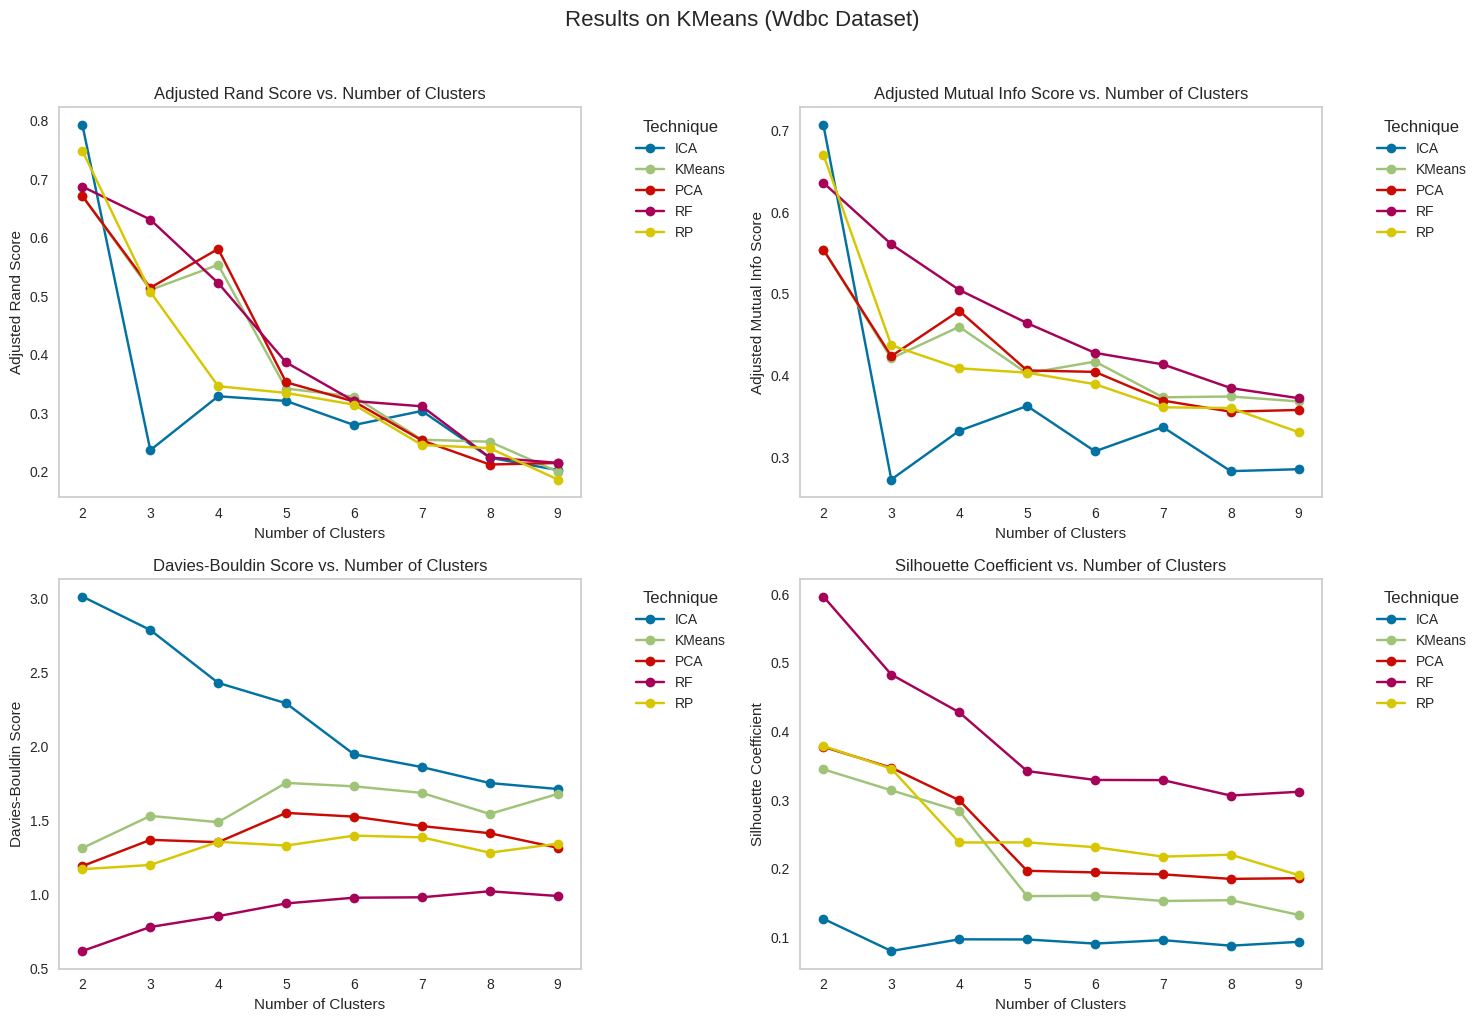

In [71]:
plot_evaluation_metrics_on_all_technique(df_wdbc_kmeans, "KMeans", "Wdbc")

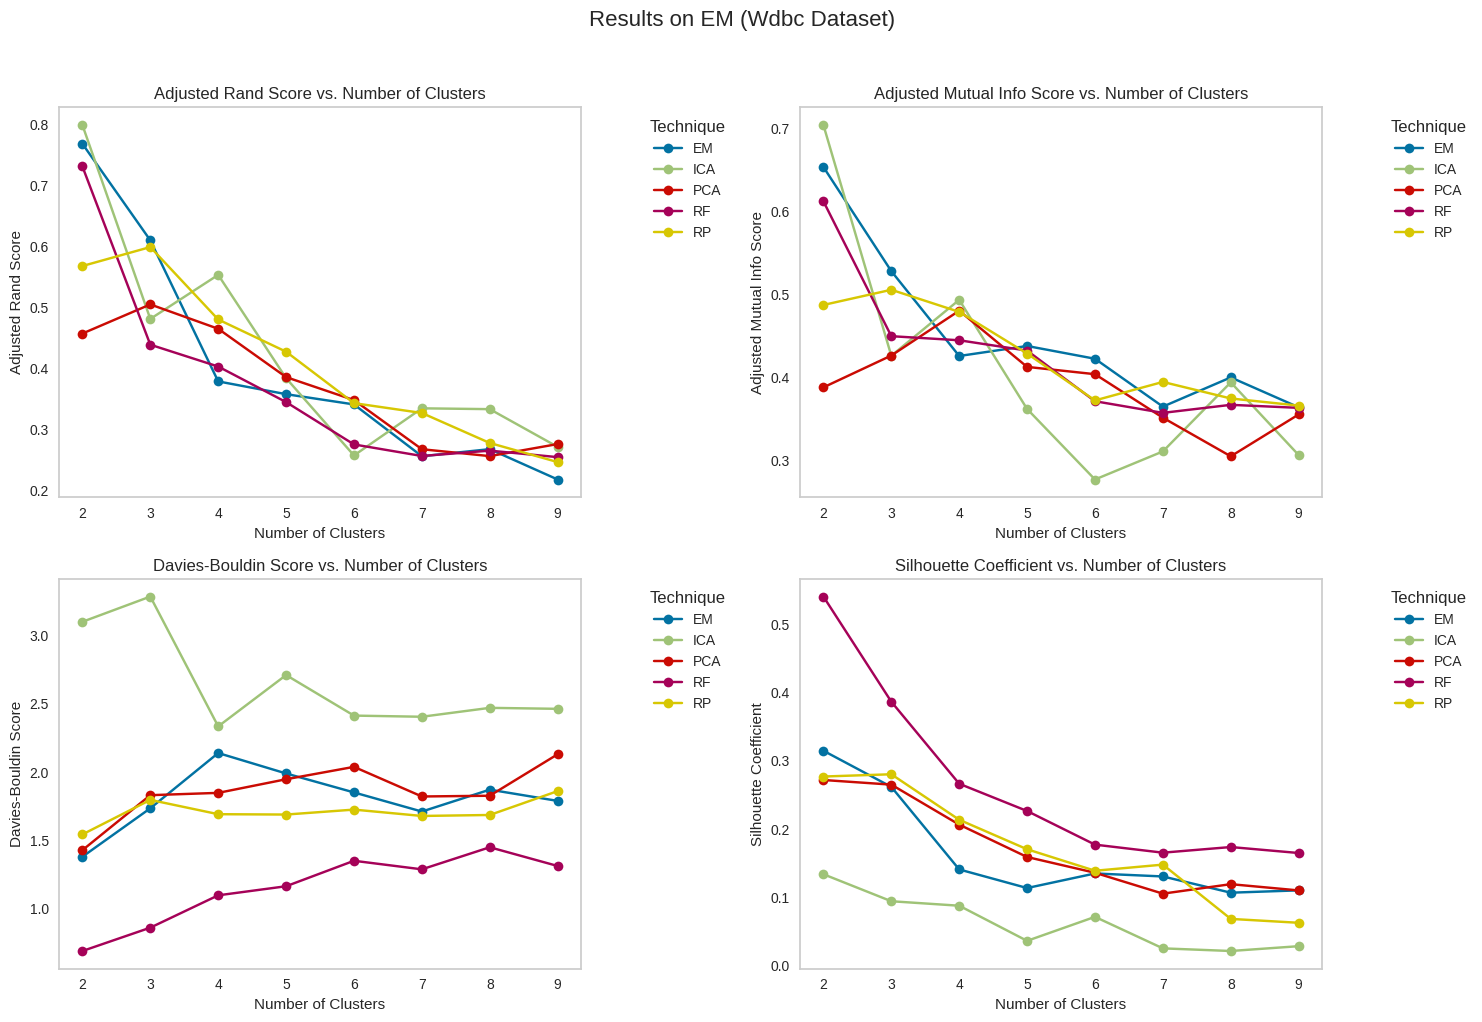

In [72]:
plot_evaluation_metrics_on_all_technique(df_wdbc_gmm, "EM", "Wdbc")

* **Based on the analysis, it appears that Independent Component Analysis (ICA) and Random Forest (RF) are two techniques that have generated results closely resembling the original KMeans labels with 2 clusters on the Wisconsin dataset. This suggests that ICA and RF have shown good performance for this specific clustering task.**

In [73]:
df_seeds_kmeans = pd.concat([res_seeds_kmeans_org, res_seeds_kmeans_pca, res_seed_kmeans_ica, res_seeds_kmeans_rp, res_seeds_kmeans_rf])
df_seeds_gmm = pd.concat([res_seeds_gmm_org, res_seeds_gmm_pca, res_seeds_gmm_ica, res_seeds_gmm_rp, res_seeds_gmm_rf])

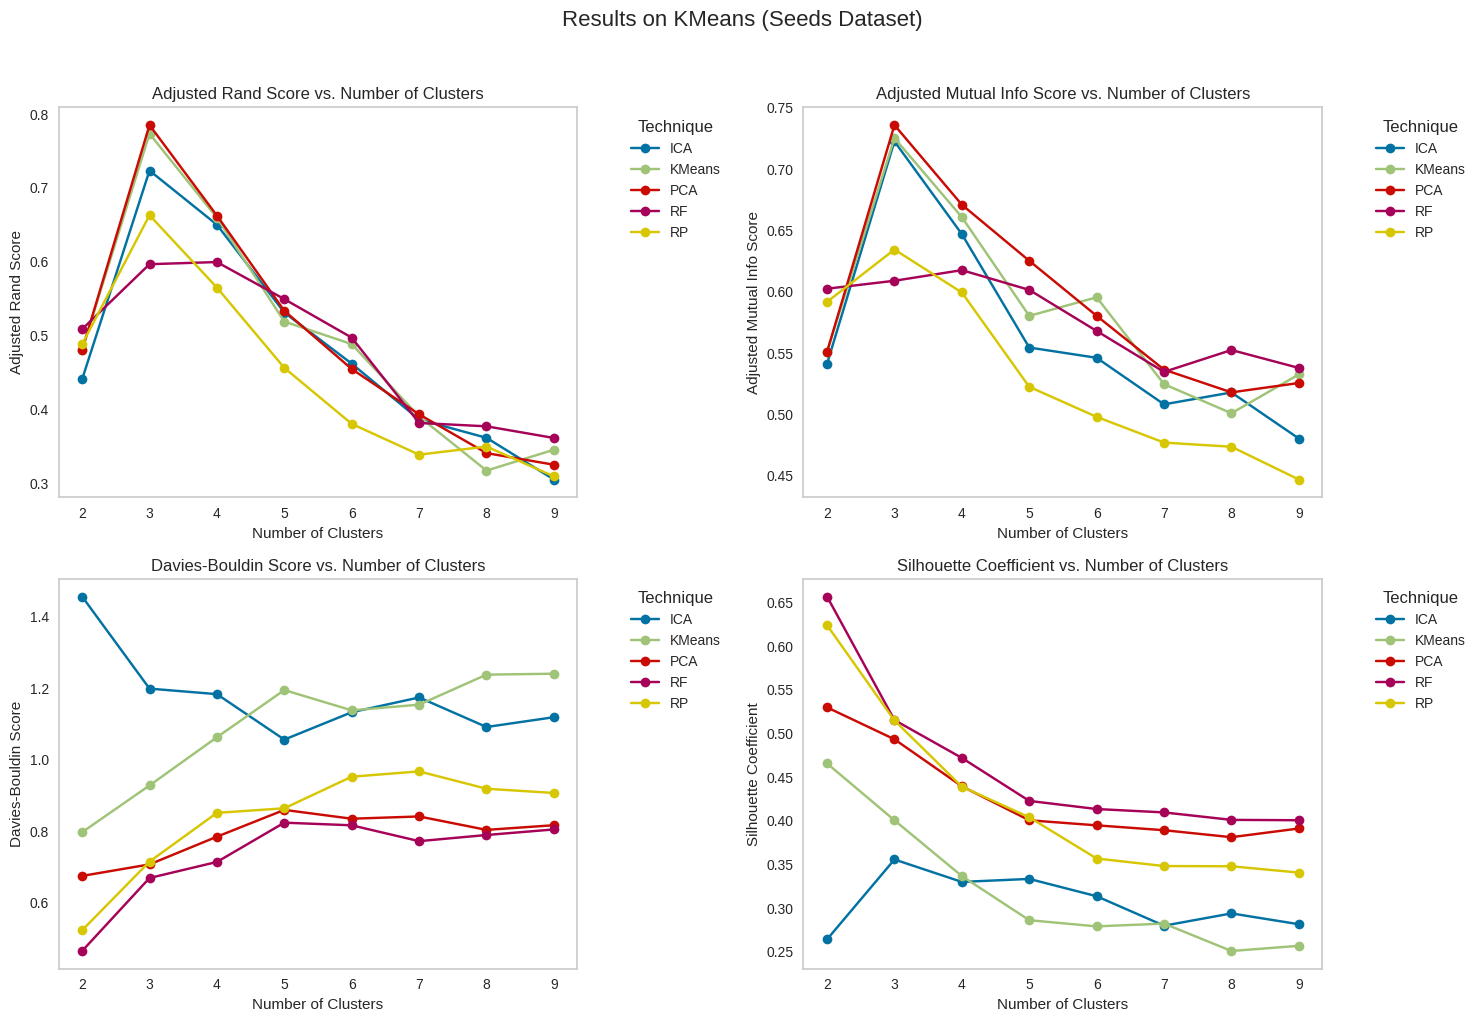

In [74]:
plot_evaluation_metrics_on_all_technique(df_seeds_kmeans, "KMeans", "Seeds")

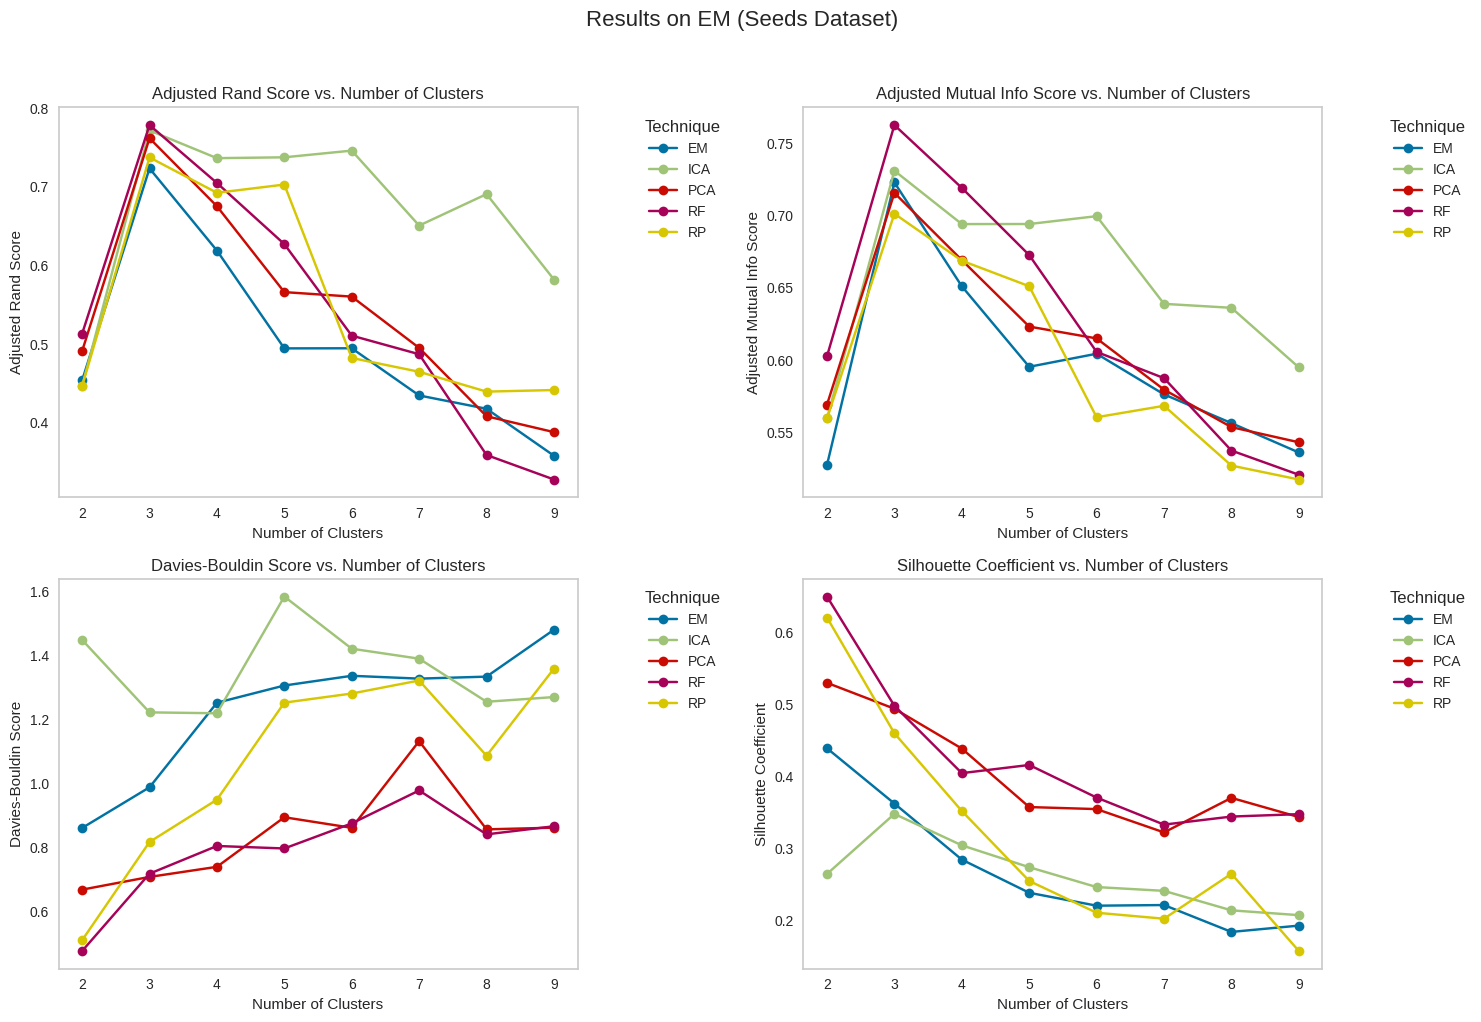

In [75]:
plot_evaluation_metrics_on_all_technique(df_seeds_gmm, "EM", "Seeds")

* **For the Seeds dataset with 3 clusters, both Independent Component Analysis (ICA) and Principal Component Analysis (PCA) have demonstrated strong performance. They appear to be the most effective techniques for clustering this dataset into three distinct groups.**

## **Neural Netwrok With Dimensionality Reduction**

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [77]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)

    # Check the shape of training and testing sets
    # print("Training shape:", X_train.shape)
    # print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [78]:
def train_NN(df,y, technique_name):
  # lets split the dataset 80% for training and 20% for testing
  X_train, X_test, y_train, y_test = splitting_dataset(df, y , test_size=0.2)
  model = MLPClassifier()
  model.fit(X_train, y_train)

  # Perform cross-validation with 5-fold cross-validation
  results = cross_validate(model, X_test, y_test, cv=5, scoring='accuracy', return_train_score=True)
  df__ = pd.DataFrame([{
      'Technique':f"{technique_name}",
      f'KFold-Train Acc':results['train_score'].mean(),
      f'KFold-Test Acc':results['test_score'].mean()
  }])
  return df__

In [79]:
df_res_PCA = train_NN(data_pca, y_wdbc, 'PCA')
df_res_ICA = train_NN(W_, y_wdbc, 'ICA')
df_res_RP = train_NN(W_RP, y_wdbc, 'RP')
df_res_RF = train_NN(df_wdbc_std_x, y_wdbc, 'RF')

In [80]:
df_RES = pd.concat([df_res_PCA, df_res_ICA, df_res_RP, df_res_RF])
df_RES

Technique  KFold-Train Acc  KFold-Test Acc
0       PCA         0.991233        0.947826
0       ICA         0.762948        0.728458
0        RP         0.991233        0.956126
0        RF         0.953918        0.947036

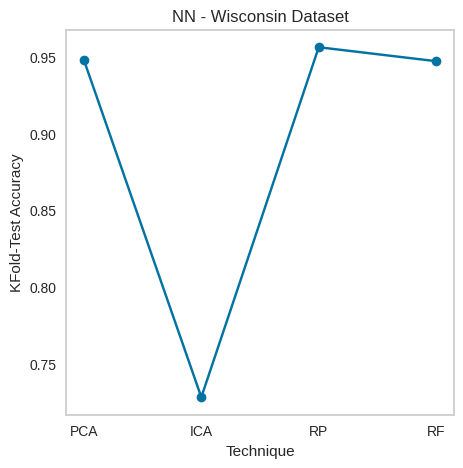

In [81]:
# Plot test accuracy for each technique as a line plot
plt.figure(figsize=(5, 5))

plt.plot(df_RES["Technique"], df_RES["KFold-Test Acc"], marker='o', linestyle='-')

plt.xlabel('Technique')
plt.ylabel('KFold-Test Accuracy')
plt.title(f'NN - Wisconsin Dataset')
plt.grid(False)

plt.show()

* **In this case, PCA and RP have the highest test accuracy, making it the best-performing technique among the others options for the given dataset and KFold cross-validation.**

## **Neural Netwrok With Dimensionality Reduction and Clustering Labels**

In [82]:
df_res_PCA1 = train_NN(data_pca, df_wdbc['KMeans_Clusters'], 'PCA')
df_res_ICA1 = train_NN(W_, df_wdbc['KMeans_Clusters'], 'ICA')
df_res_RP1 = train_NN(W_RP, df_wdbc['KMeans_Clusters'], 'RP')
df_res_RF1 = train_NN(df_wdbc_std_x, df_wdbc['KMeans_Clusters'], 'RF')

In [83]:
df_RES1 = pd.concat([df_res_PCA1, df_res_ICA1, df_res_RP1, df_res_RF1])
df_RES1['Comment'] = 'Use KMeans Labels'
df_RES1

Technique  KFold-Train Acc  KFold-Test Acc            Comment
0       PCA         0.993430        0.965217  Use KMeans Labels
0       ICA         0.758720        0.755731  Use KMeans Labels
0        RP         1.000000        0.991304  Use KMeans Labels
0        RF         0.951768        0.947431  Use KMeans Labels

In [84]:
df_res_PCA2 = train_NN(data_pca, df_wdbc['GMM_Clusters'], 'PCA')
df_res_ICA2 = train_NN(W_, df_wdbc['GMM_Clusters'], 'ICA')
df_res_RP2 = train_NN(W_RP, df_wdbc['GMM_Clusters'], 'RP')
df_res_RF2 = train_NN(df_wdbc_std_x, df_wdbc['GMM_Clusters'], 'RF')

In [85]:
df_RES2 = pd.concat([df_res_PCA2, df_res_ICA2, df_res_RP2, df_res_RF2])
df_RES2['Comment'] = 'Use EM Labels'
df_RES2

Technique  KFold-Train Acc  KFold-Test Acc        Comment
0       PCA         1.000000        0.991304  Use EM Labels
0       ICA         0.754276        0.737549  Use EM Labels
0        RP         0.989059        0.947826  Use EM Labels
0        RF         0.943024        0.939130  Use EM Labels

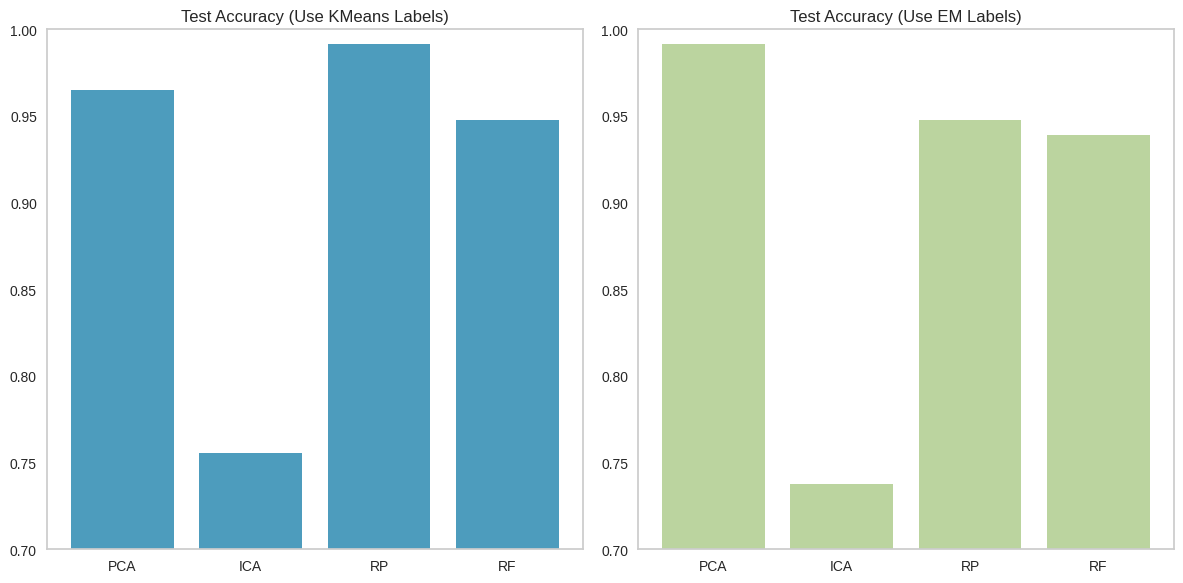

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for "Use KMeans Labels"
axes[0].bar(df_RES1["Technique"], df_RES1["KFold-Test Acc"], color='b', alpha=0.7)
axes[0].set_title('Test Accuracy (Use KMeans Labels)')
axes[0].set_ylim(0.7, 1.0)  # Adjust the y-axis limits if necessary
axes[0].grid(False)

# Plot for "Use EM Labels"
axes[1].bar(df_RES2["Technique"], df_RES2["KFold-Test Acc"], color='g', alpha=0.7)
axes[1].set_title('Test Accuracy (Use EM Labels)')
axes[1].set_ylim(0.7, 1.0)  # Adjust the y-axis limits if necessary
axes[1].grid(False)

plt.tight_layout()
plt.show()

* **Based on the test accuracy results for clustering labels, it is evident that both PCA and RP (Random Projections) perform exceptionally well, achieving the highest accuracy. These two techniques outperform ICA and RF (Random Forest) when it comes to clustering labels, indicating their effectiveness in capturing and representing the underlying structure of the data for clustering purposes. Therefore, PCA and RP can be considered the best choices among the four techniques for this specific task.**